## House Price Prediction using Advanced Regression Techniques on Ames Housing dataset

# Table of Contents
1. **Overview**
2. **Environment Setup**
3. **Import Basic Libraries**
4. **Exploratory Data Analysis**
5. **Feature Engineering**
7. **Modelling**
8. **Conclusion**

## 1. Overview
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

**Goal:** Our aim is to predict the house price based on various factors such as number of bedrooms, basements, finishing quality and more.

## 2. Environemnt Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 3. Import Basic Libraries

In [2]:
#Let's import some of the basic libraries we'll be using.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 4. Exploratory Data Analysis
We'll try to focus on the following:

**1. Missing Data**  
**2. Numerical/Categorical Features**  
**3. Outliers present in the dataset**  
**4. Factors influencing the SalePrice(target variable)**

In [3]:
#Let's have a look at our training and test data
#Our training and test data have the same number of features except the target SalePrice is not present in the test dataset.
pd.pandas.set_option('display.max_columns',None)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5       2003  \
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0  1461          20       RH         80.0    11622   Pave   NaN      Reg  \
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr  \
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     1Story            5            6       1961  \
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN  \
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0         0.0        TA        TA     CBlock       TA       TA           No  \
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          Rec       468.0          LwQ       144.0      270.0        882.0  \
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        TA          Y      SBrkr       896         0             0  \
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0        896           0.0           0.0         1         0             2  \
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          TA             5        Typ           0         NaN  \
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [6]:
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF   
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  \
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath   
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  \
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  \
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF   
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000  \
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual   
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000  \
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  \
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF   
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000  \
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath   
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000  \
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000  \
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF   
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000  \
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [9]:
print(df_train.shape,df_test.shape)

(1460, 81) (1459, 80)


### 4.1 Missing Data

In [10]:
#Let's see the number of missing values in every feature for training dataset.
features = df_train.columns
for feature in features:
    print(feature,':',df_train[feature].isnull().mean()*100,'% missing values')

Id : 0.0 % missing values
MSSubClass : 0.0 % missing values
MSZoning : 0.0 % missing values
LotFrontage : 17.73972602739726 % missing values
LotArea : 0.0 % missing values
Street : 0.0 % missing values
Alley : 93.76712328767123 % missing values
LotShape : 0.0 % missing values
LandContour : 0.0 % missing values
Utilities : 0.0 % missing values
LotConfig : 0.0 % missing values
LandSlope : 0.0 % missing values
Neighborhood : 0.0 % missing values
Condition1 : 0.0 % missing values
Condition2 : 0.0 % missing values
BldgType : 0.0 % missing values
HouseStyle : 0.0 % missing values
OverallQual : 0.0 % missing values
OverallCond : 0.0 % missing values
YearBuilt : 0.0 % missing values
YearRemodAdd : 0.0 % missing values
RoofStyle : 0.0 % missing values
RoofMatl : 0.0 % missing values
Exterior1st : 0.0 % missing values
Exterior2nd : 0.0 % missing values
MasVnrType : 59.726027397260275 % missing values
MasVnrArea : 0.547945205479452 % missing values
ExterQual : 0.0 % missing values
ExterCond : 0.0

In [11]:
#Similarly for the test dataset.
features = df_test.columns
for feature in features:
    print(feature,':',df_test[feature].isnull().mean()*100,'% missing values')

Id : 0.0 % missing values
MSSubClass : 0.0 % missing values
MSZoning : 0.2741603838245374 % missing values
LotFrontage : 15.558601782042494 % missing values
LotArea : 0.0 % missing values
Street : 0.0 % missing values
Alley : 92.66620973269363 % missing values
LotShape : 0.0 % missing values
LandContour : 0.0 % missing values
Utilities : 0.1370801919122687 % missing values
LotConfig : 0.0 % missing values
LandSlope : 0.0 % missing values
Neighborhood : 0.0 % missing values
Condition1 : 0.0 % missing values
Condition2 : 0.0 % missing values
BldgType : 0.0 % missing values
HouseStyle : 0.0 % missing values
OverallQual : 0.0 % missing values
OverallCond : 0.0 % missing values
YearBuilt : 0.0 % missing values
YearRemodAdd : 0.0 % missing values
RoofStyle : 0.0 % missing values
RoofMatl : 0.0 % missing values
Exterior1st : 0.06854009595613435 % missing values
Exterior2nd : 0.06854009595613435 % missing values
MasVnrType : 61.27484578478409 % missing values
MasVnrArea : 1.0281014393420151 % 

**Observations: We can see there are lot of missing values in our dataset. Features such as Alley, Fence, MiscFeature, PoolQC have the maximum number of missing values.**

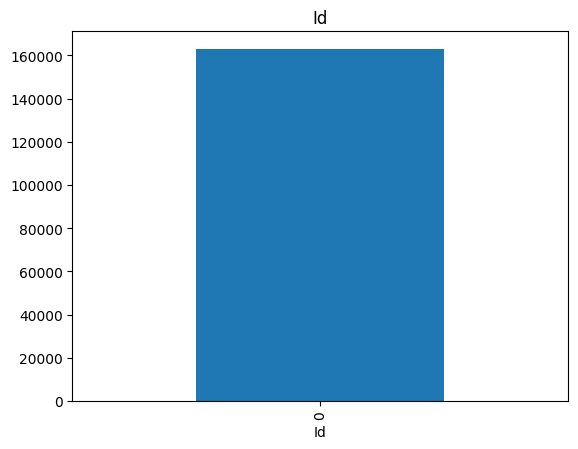

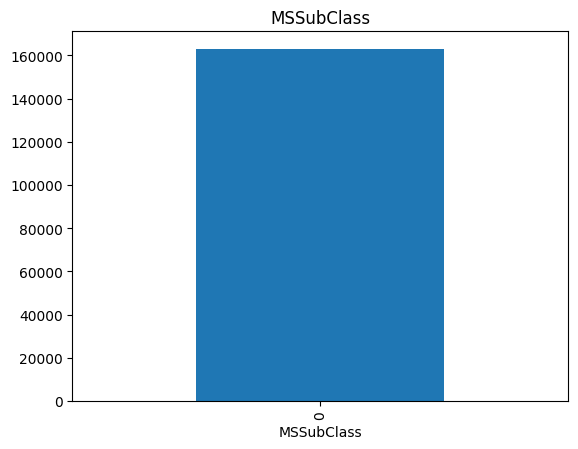

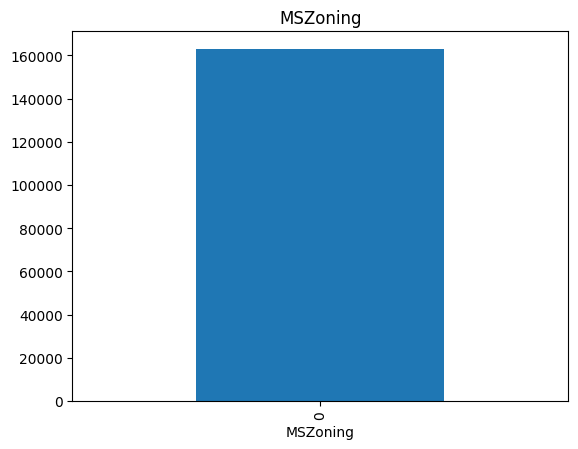

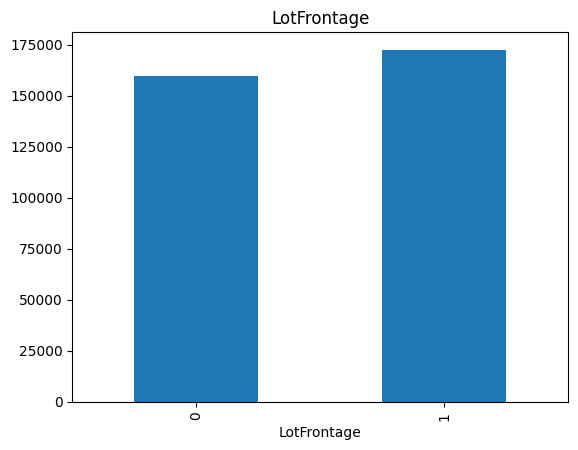

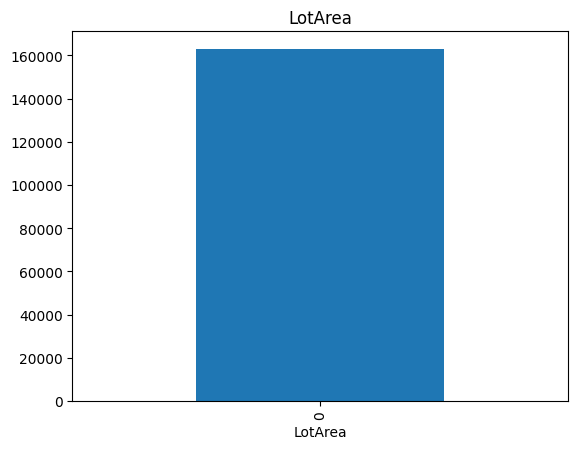

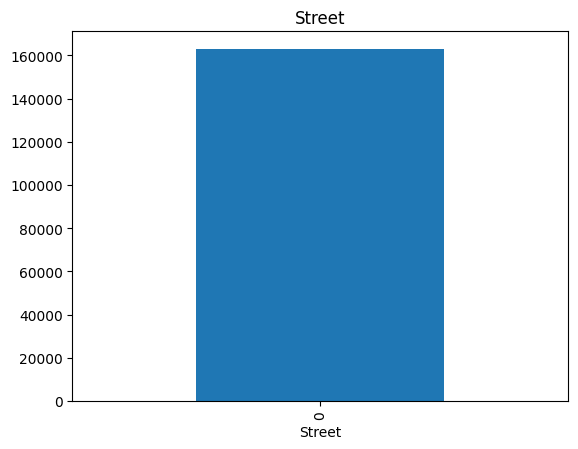

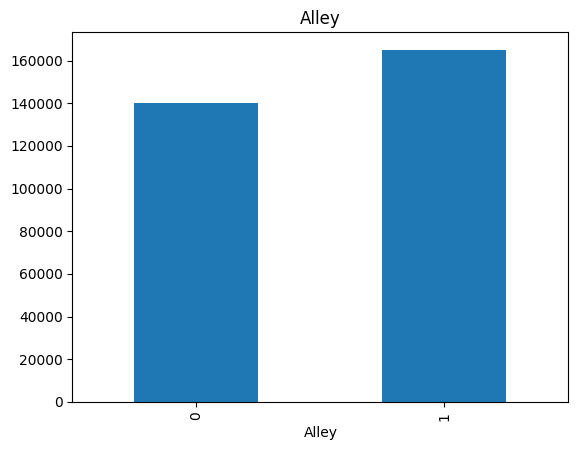

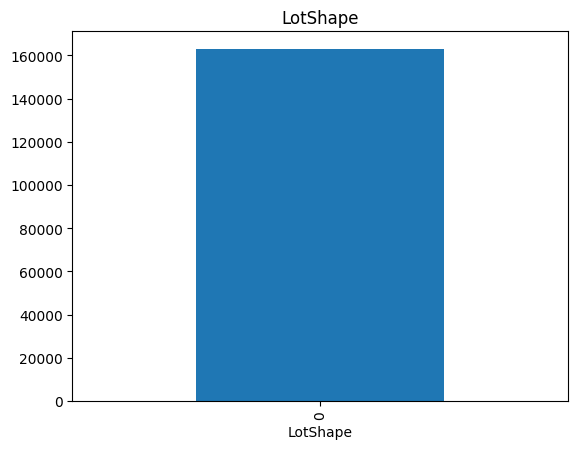

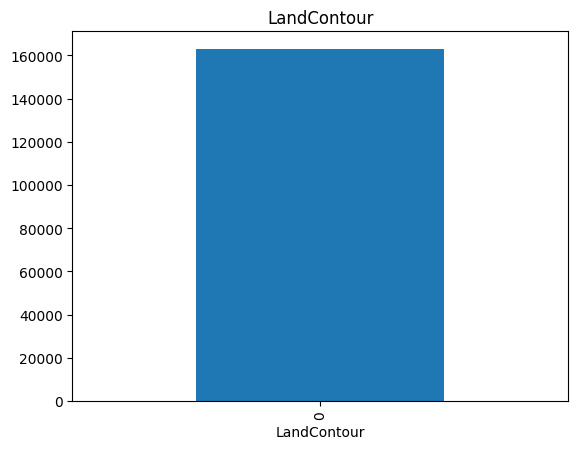

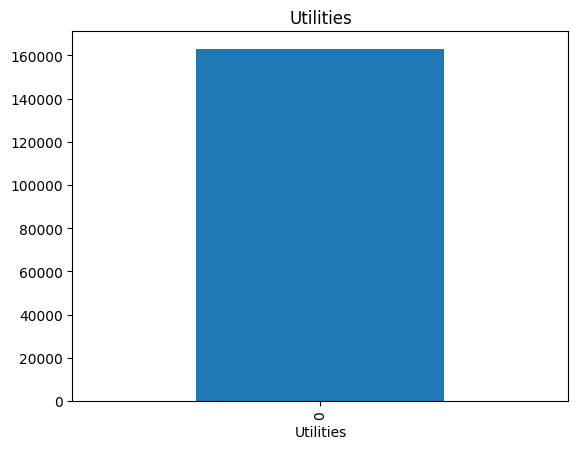

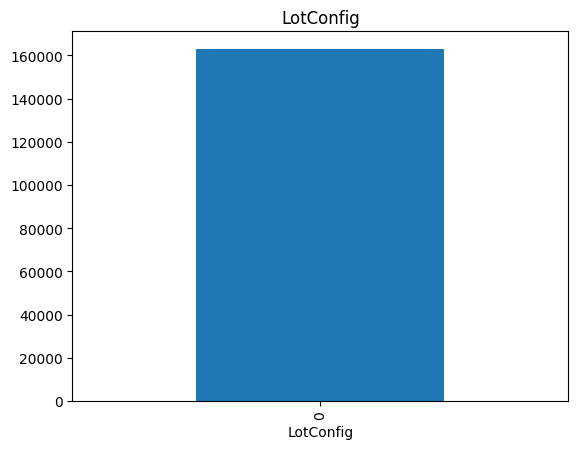

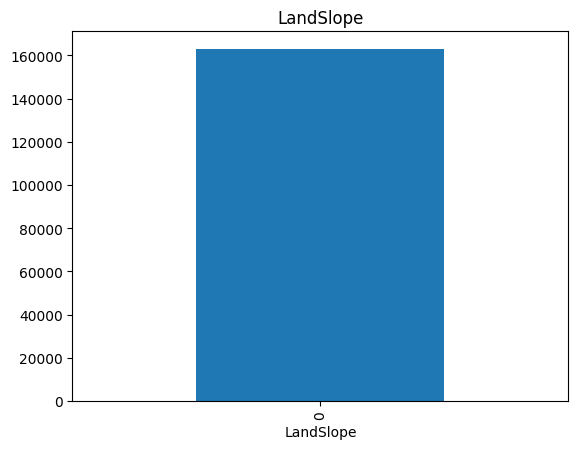

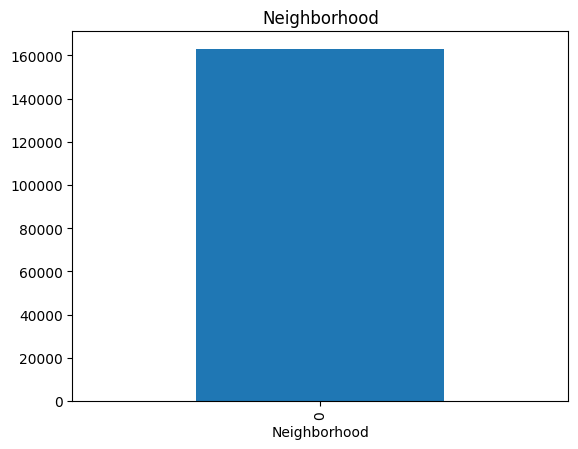

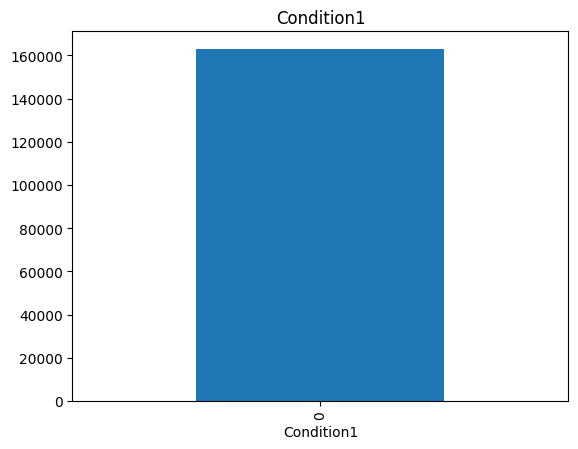

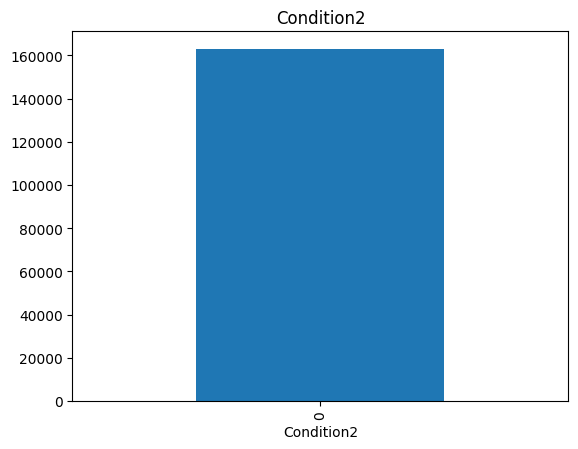

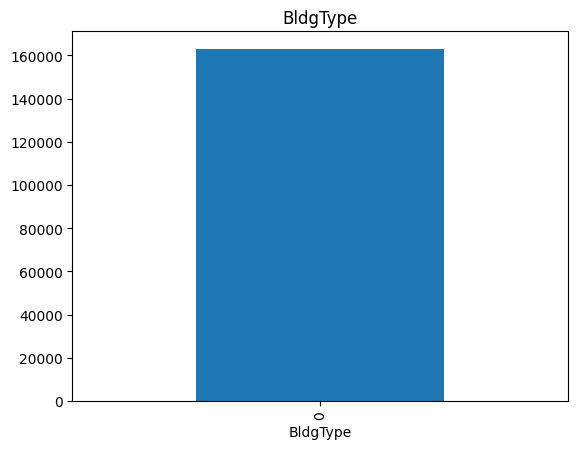

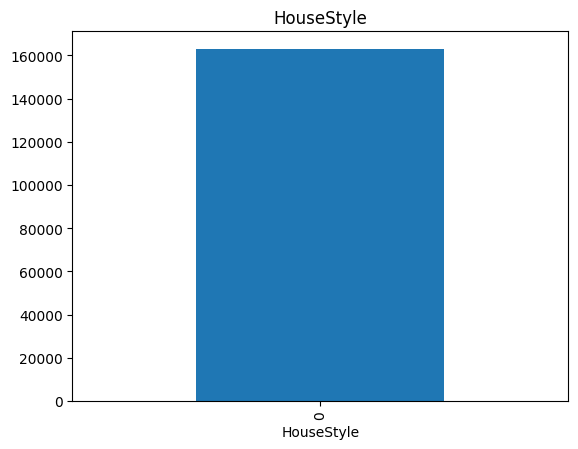

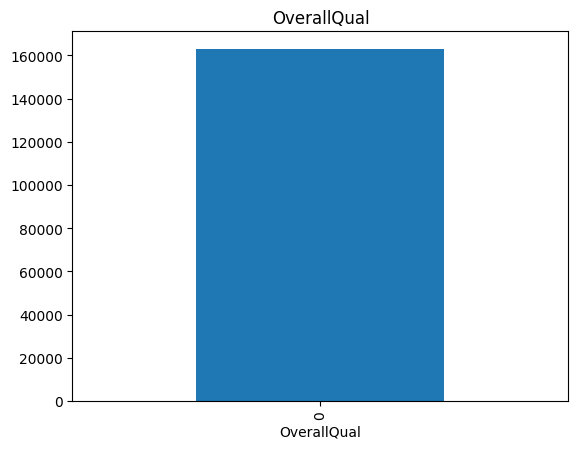

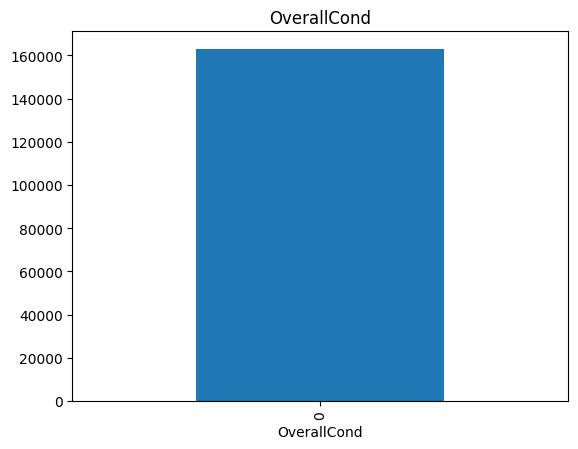

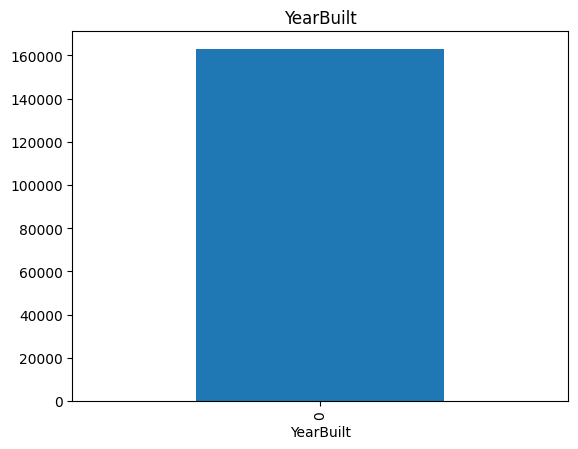

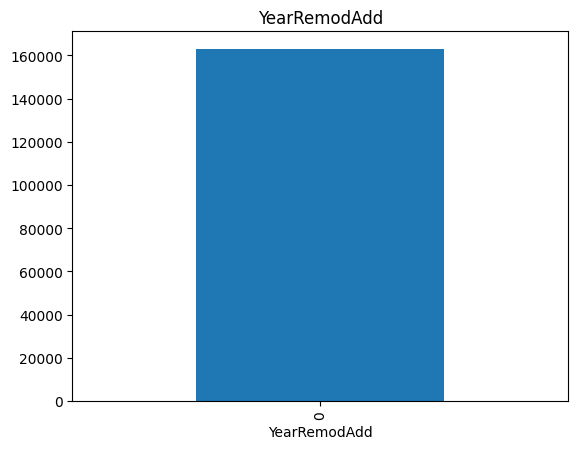

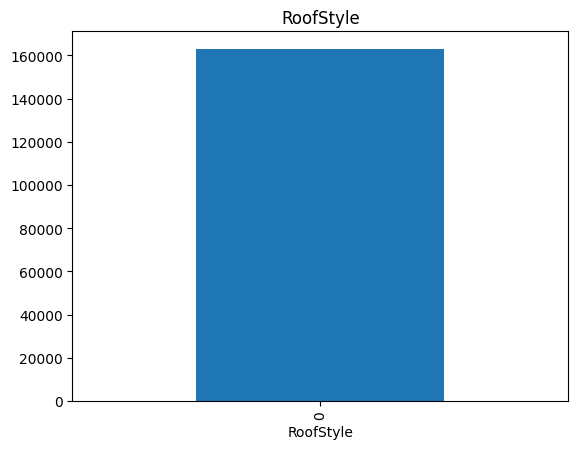

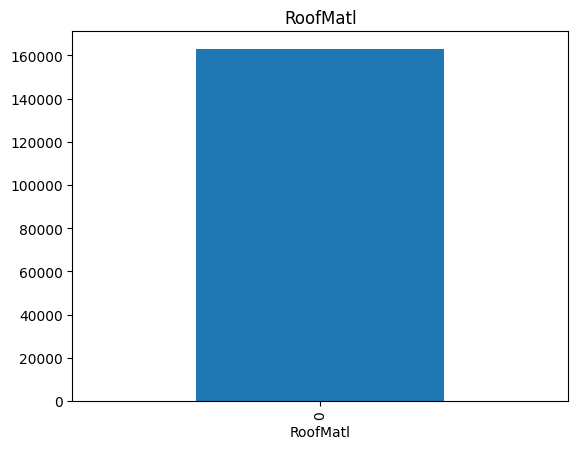

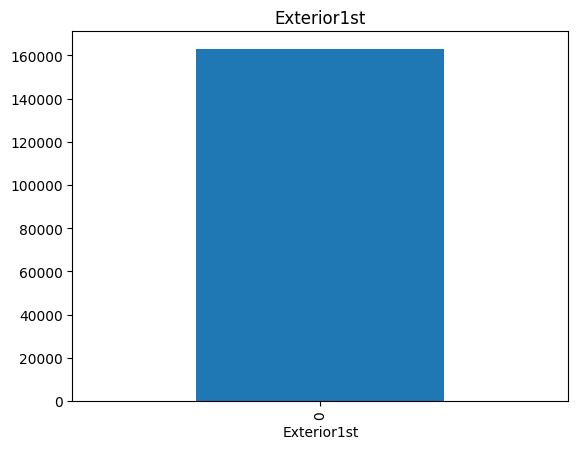

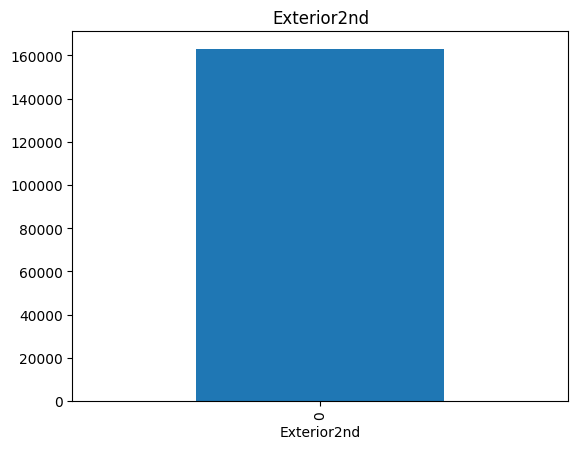

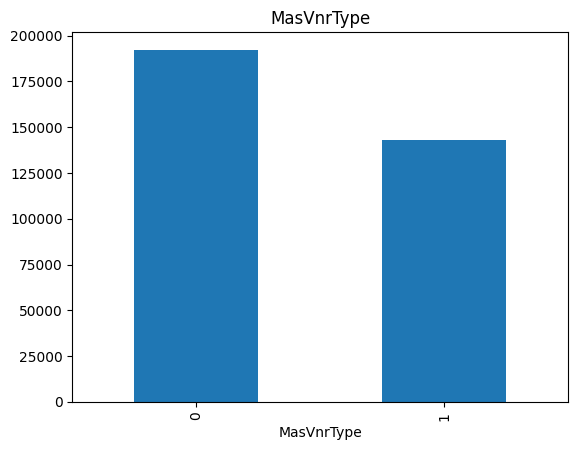

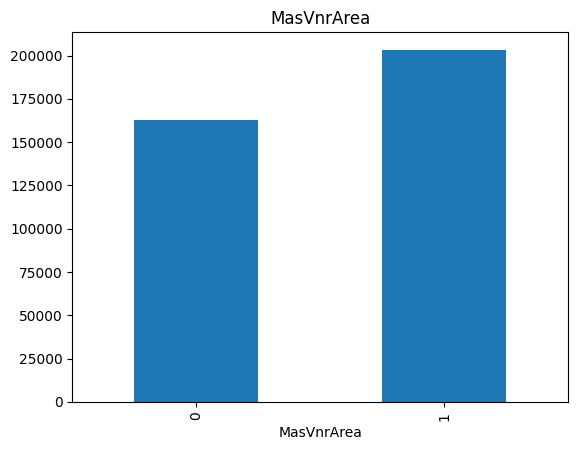

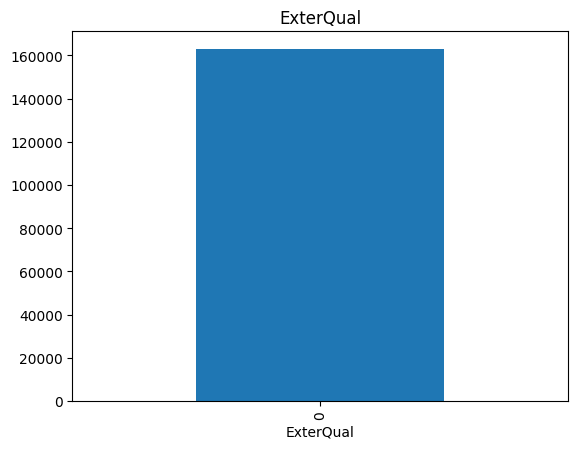

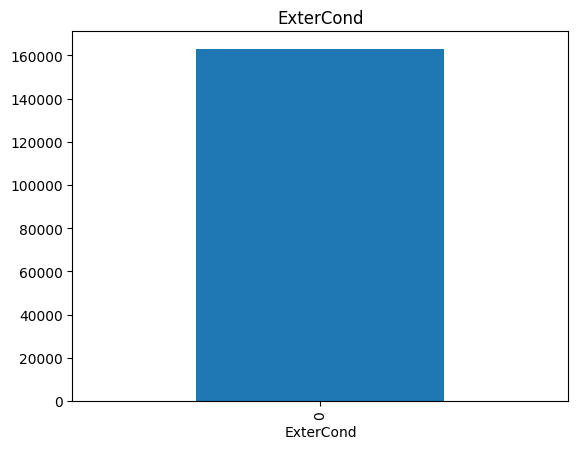

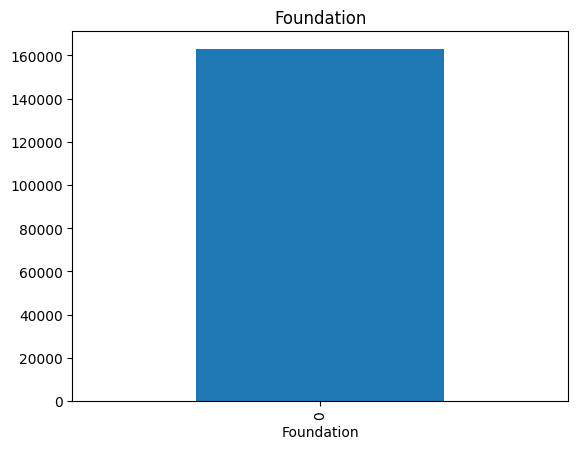

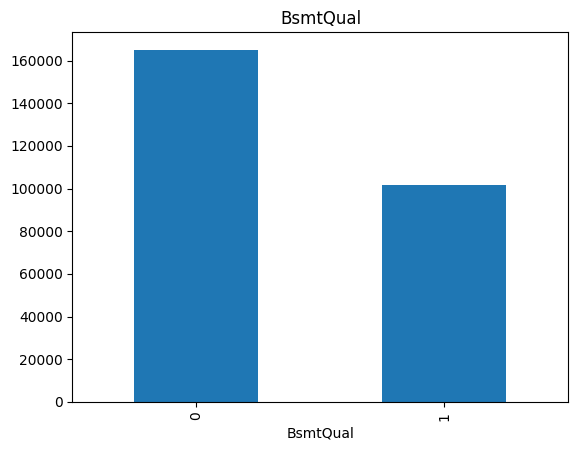

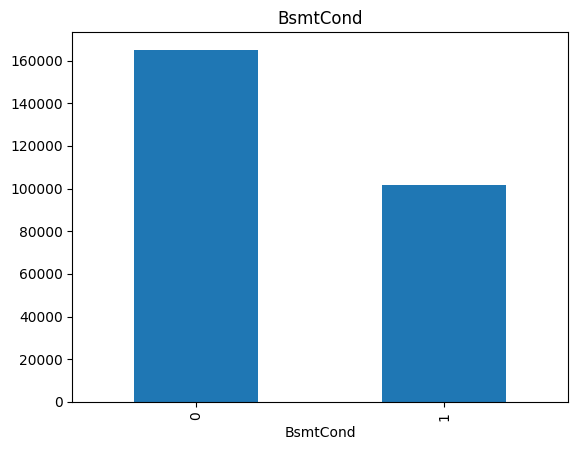

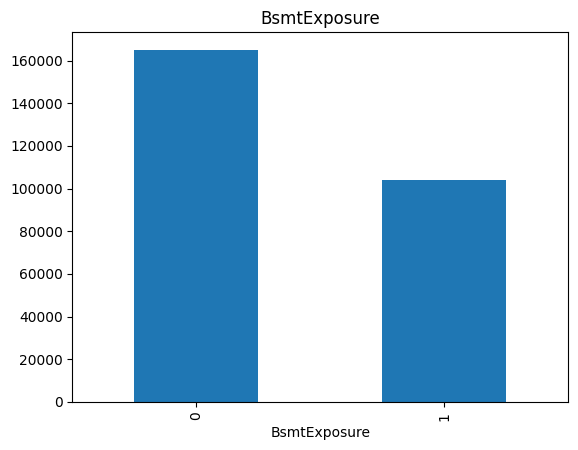

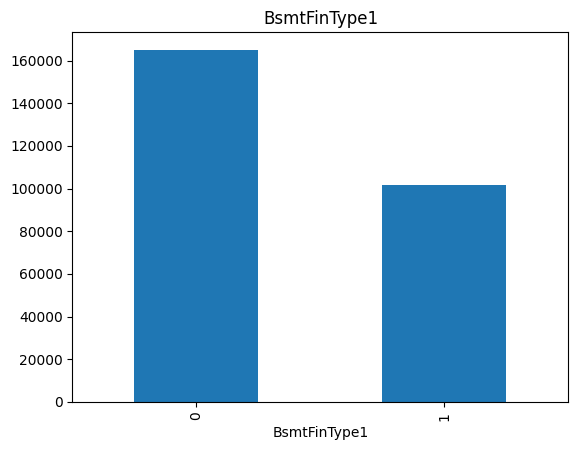

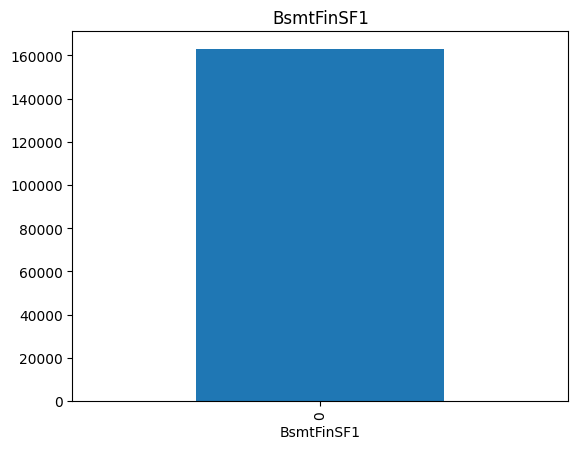

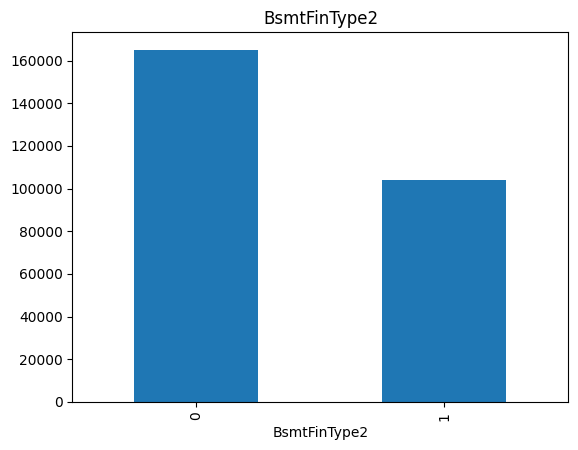

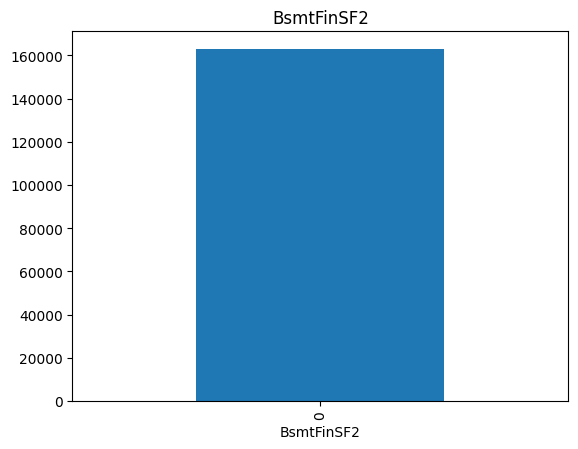

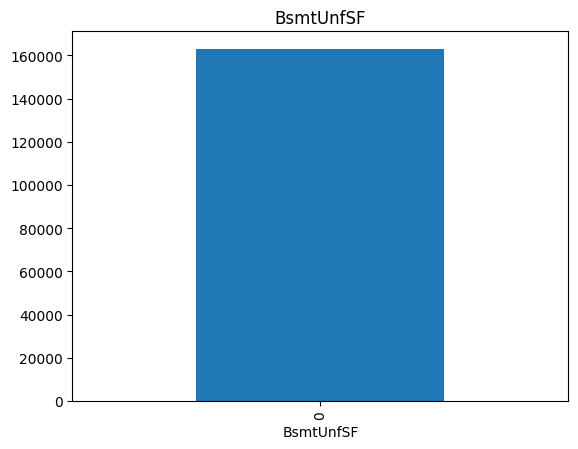

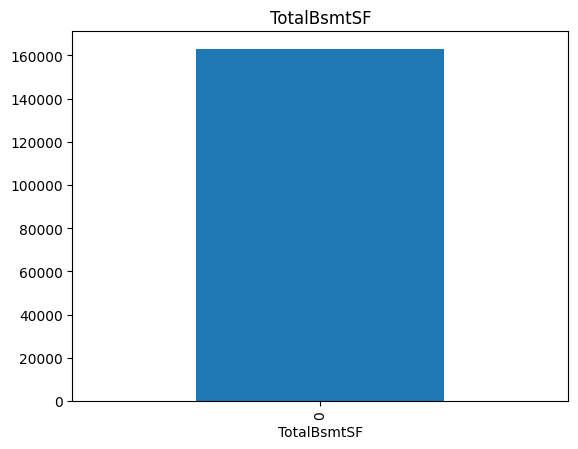

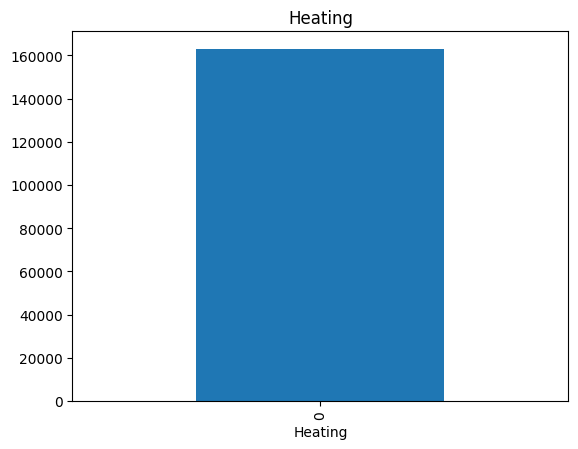

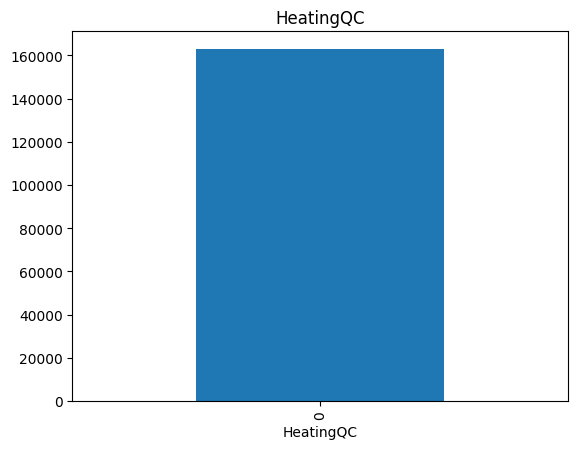

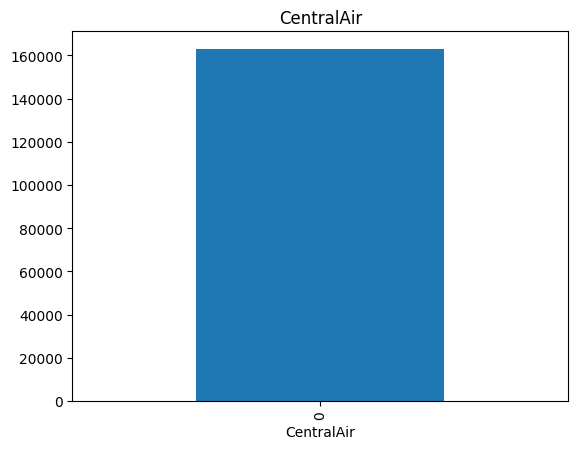

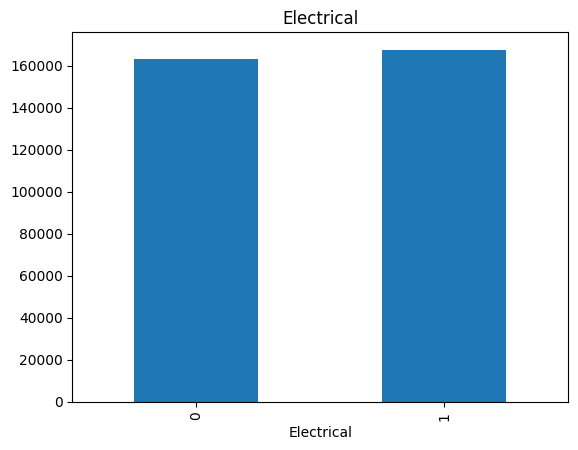

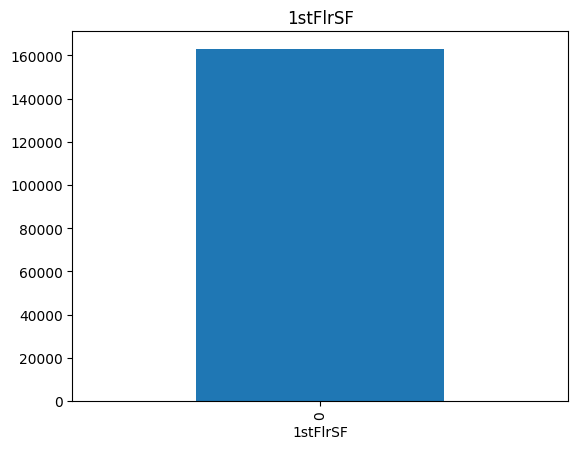

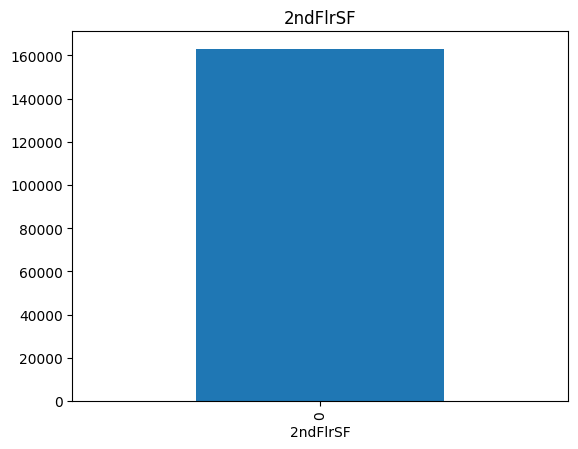

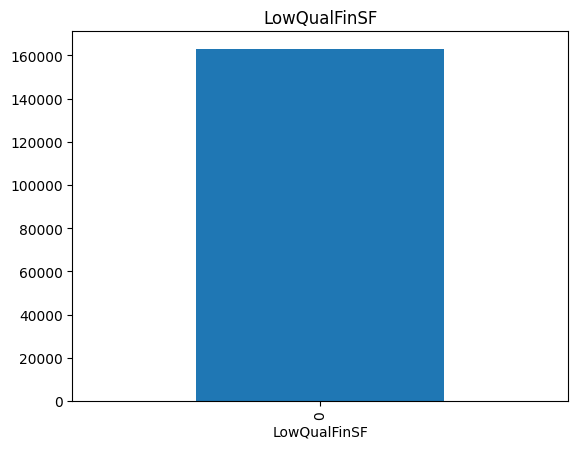

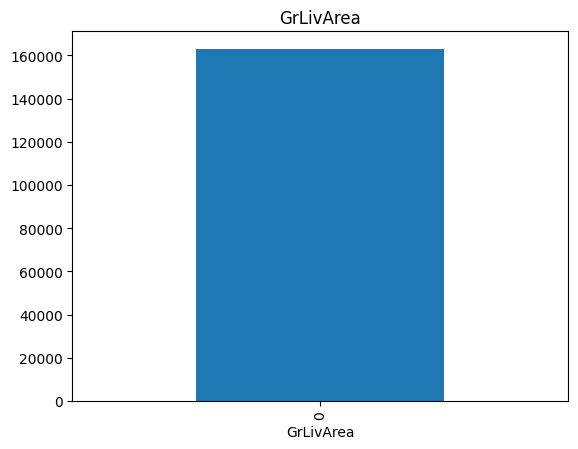

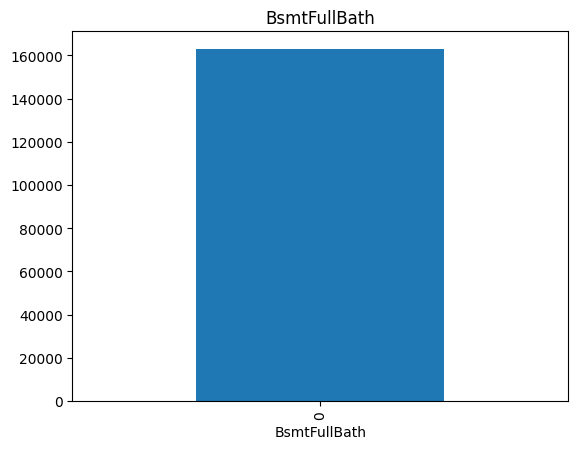

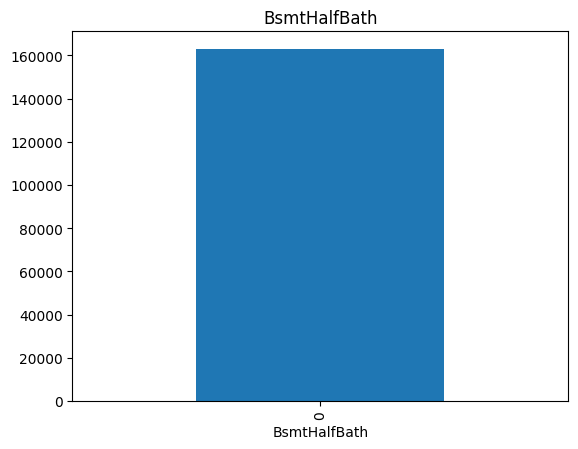

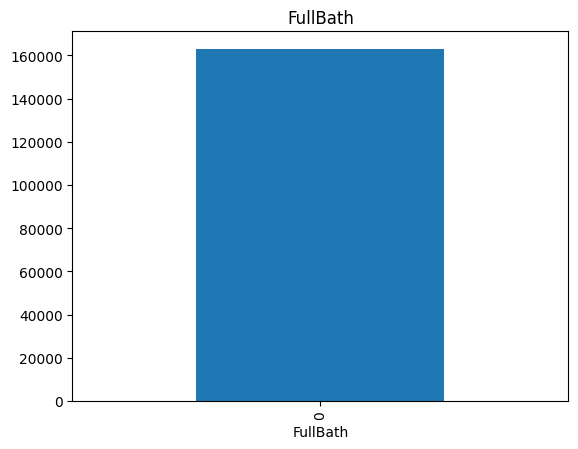

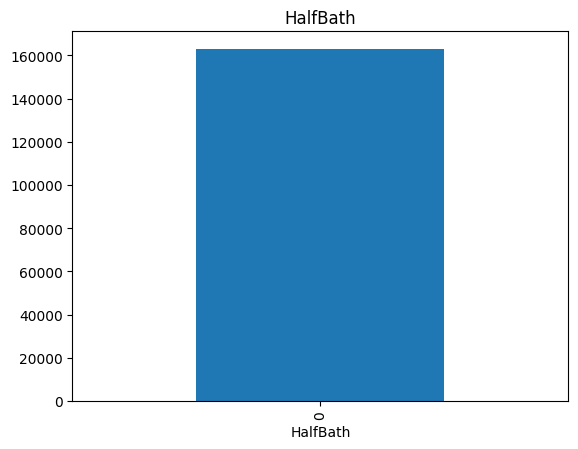

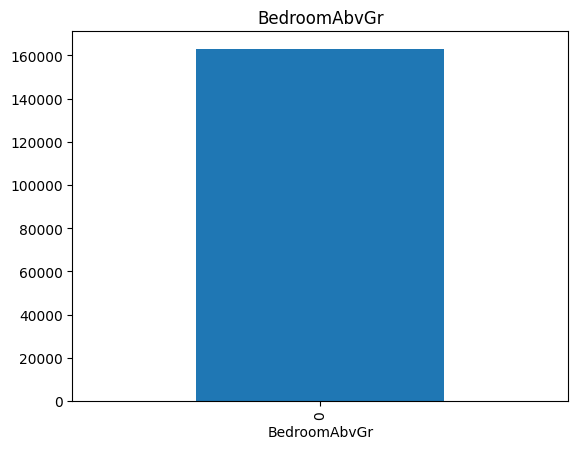

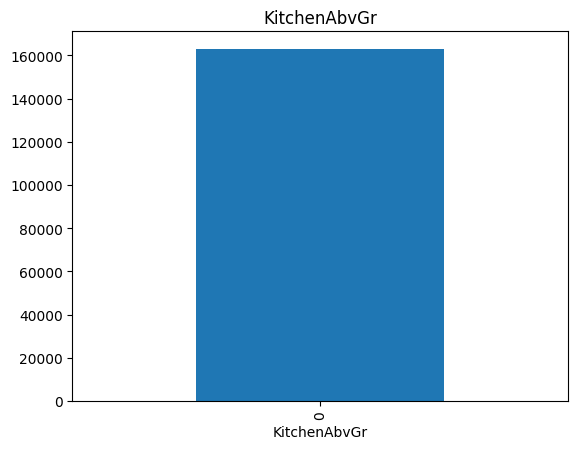

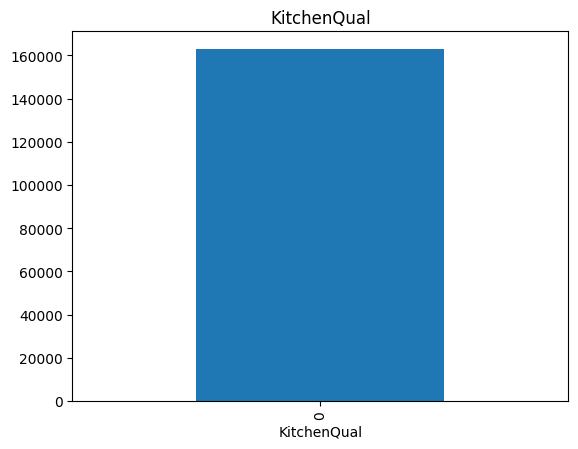

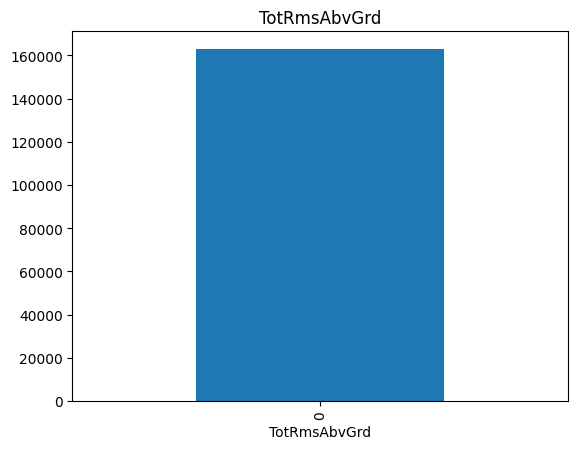

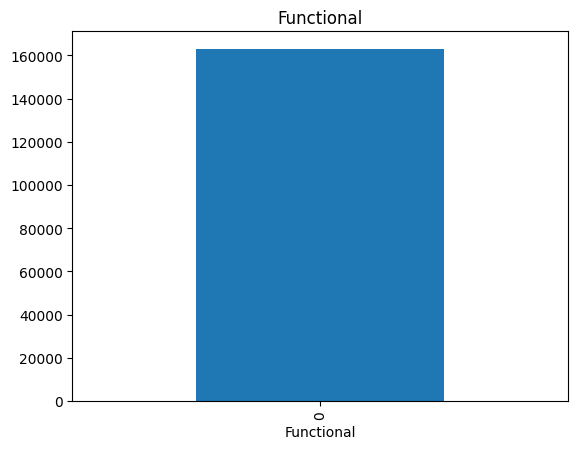

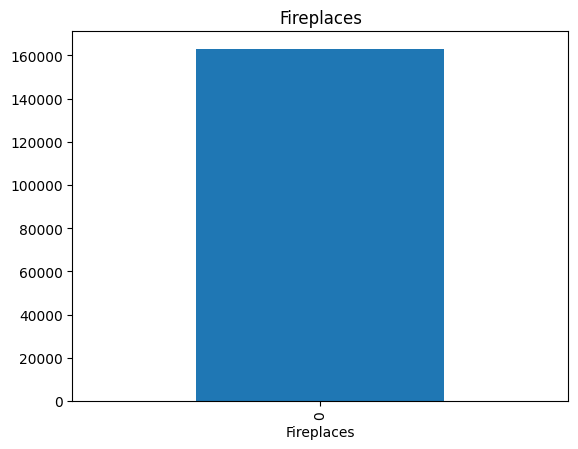

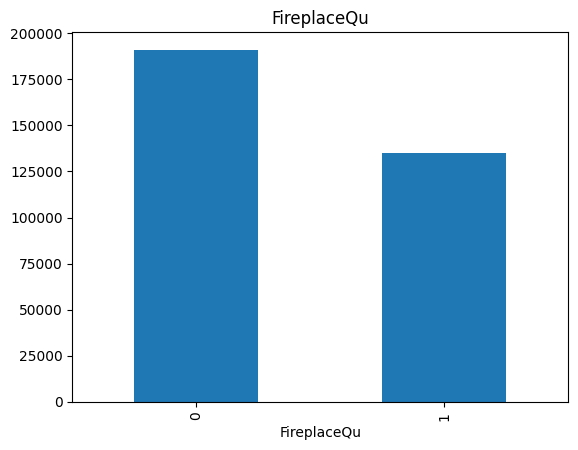

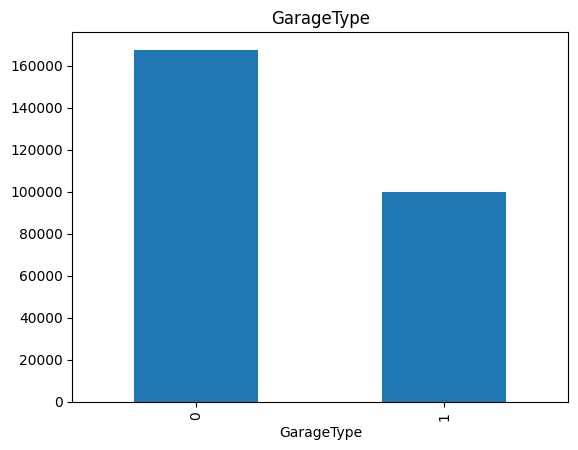

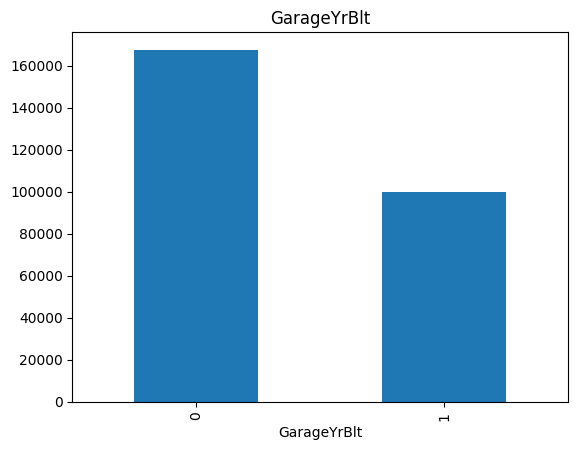

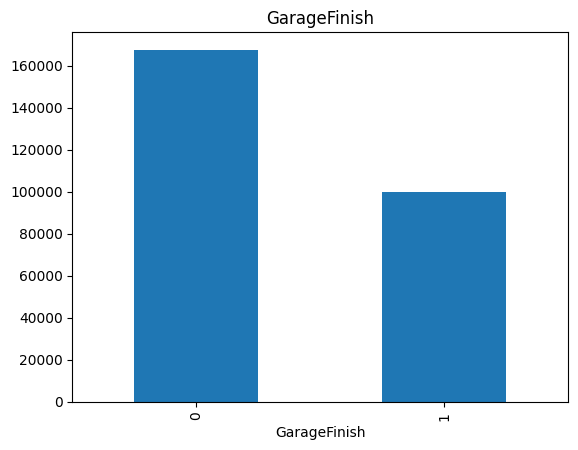

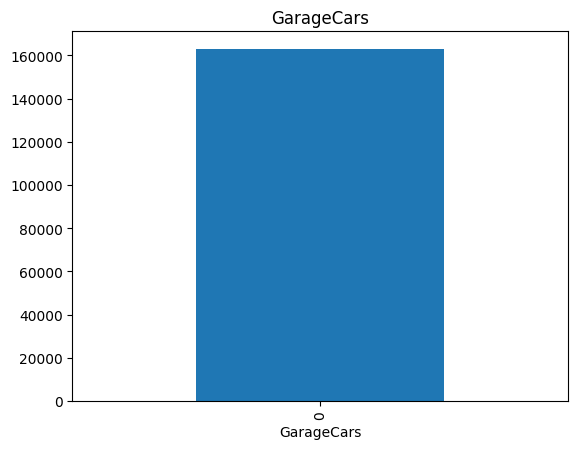

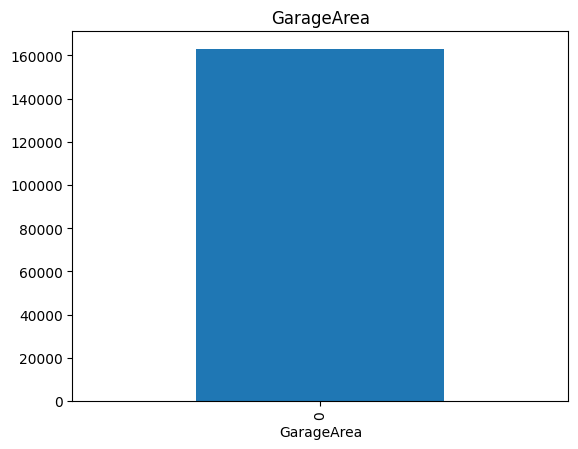

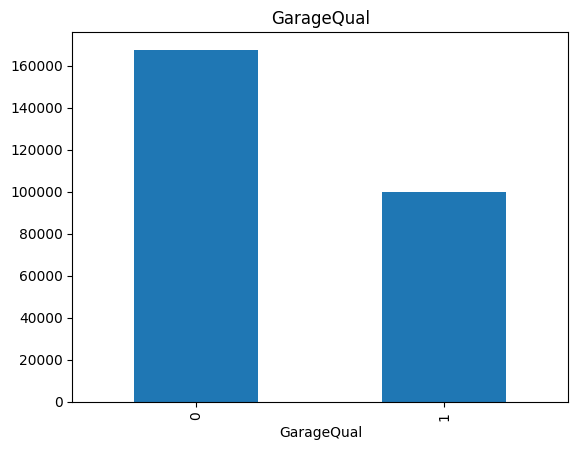

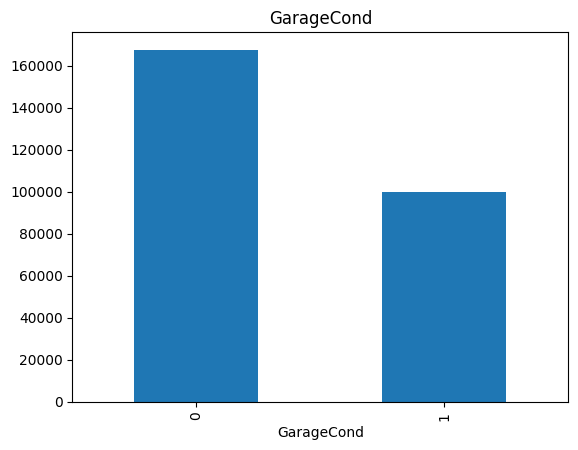

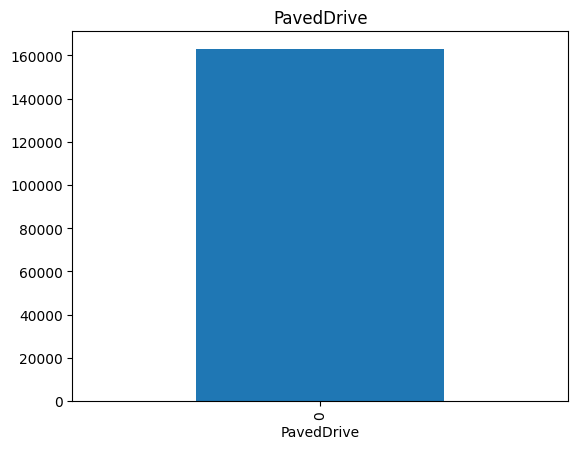

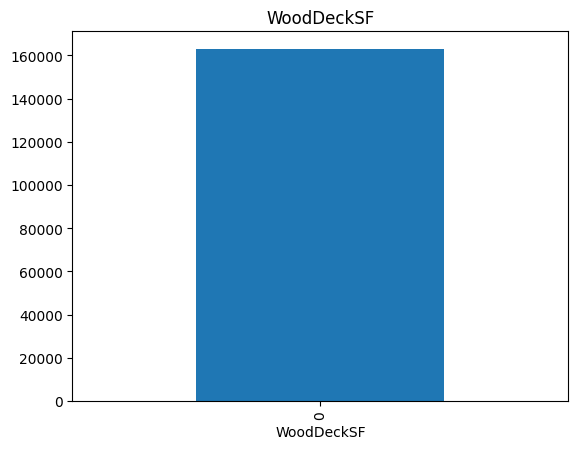

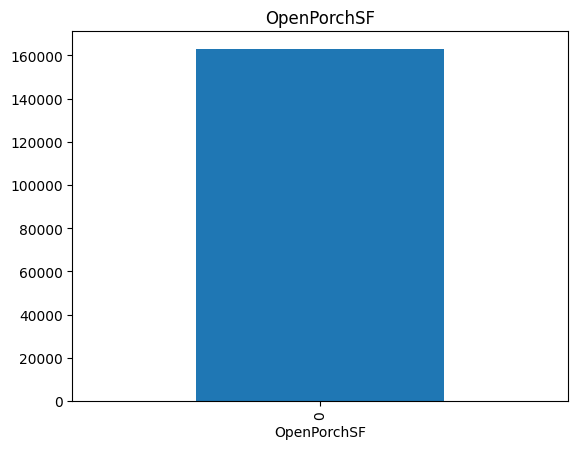

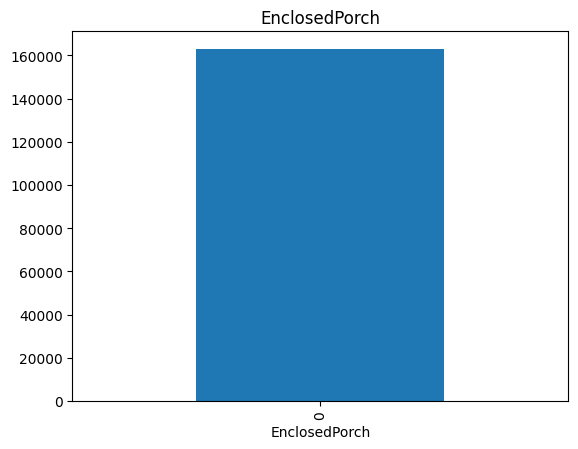

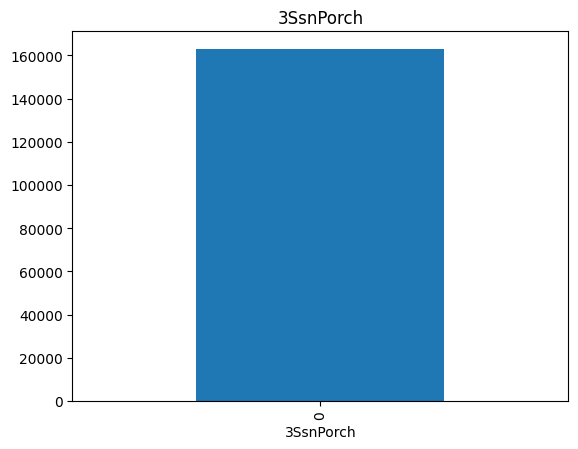

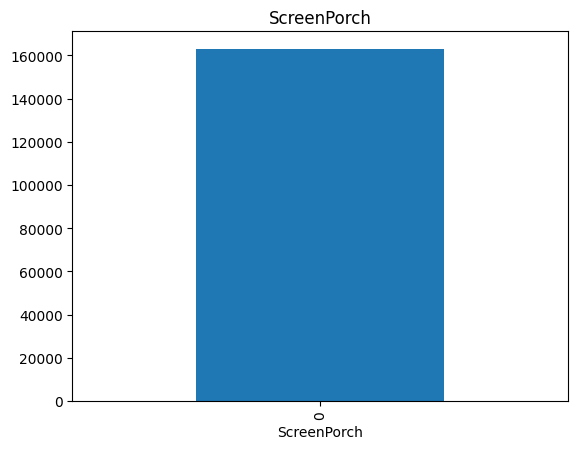

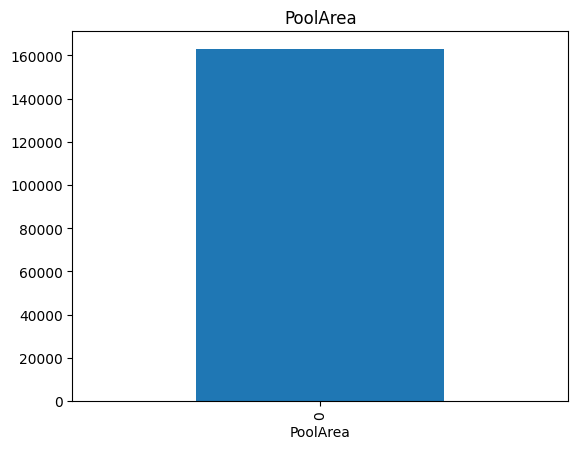

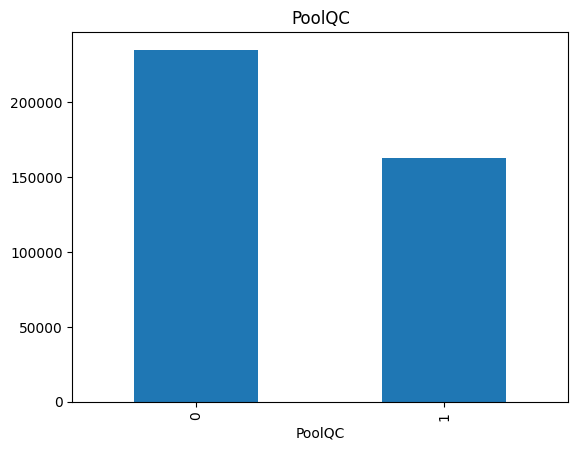

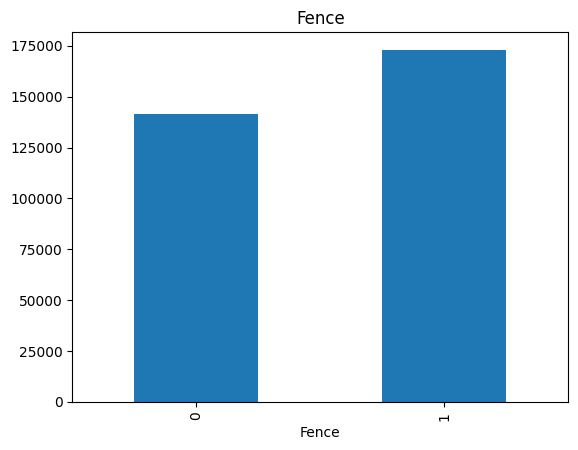

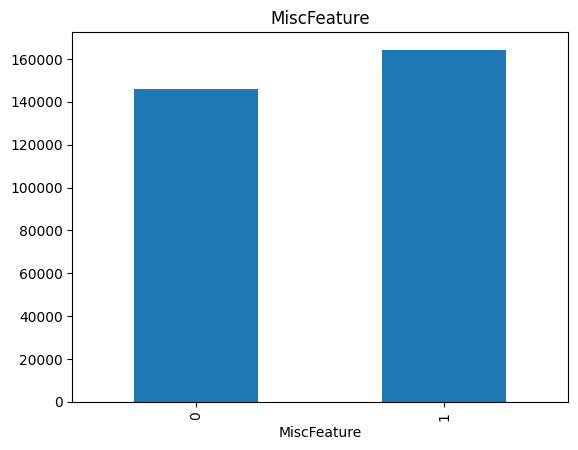

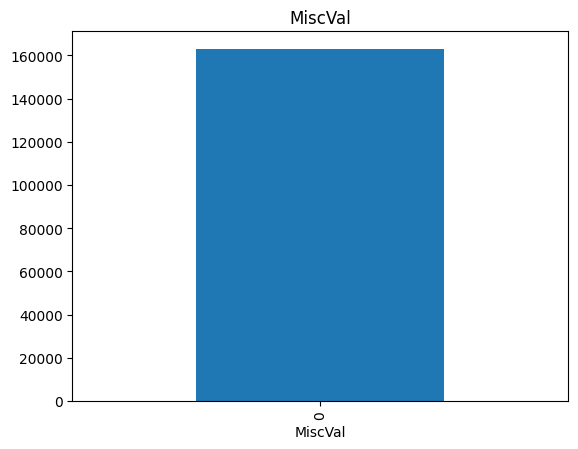

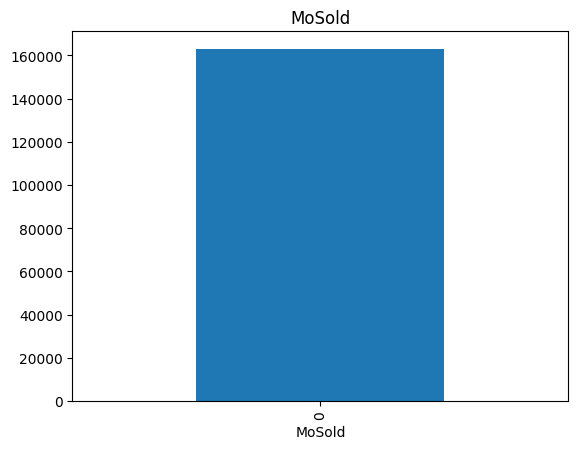

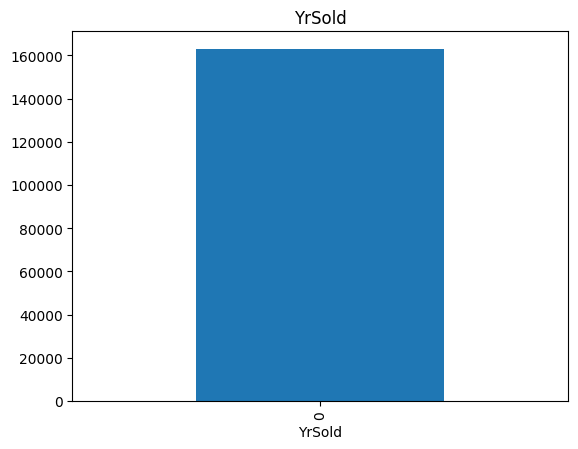

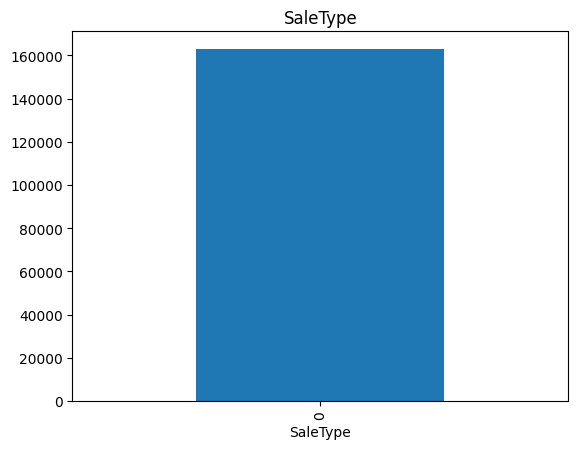

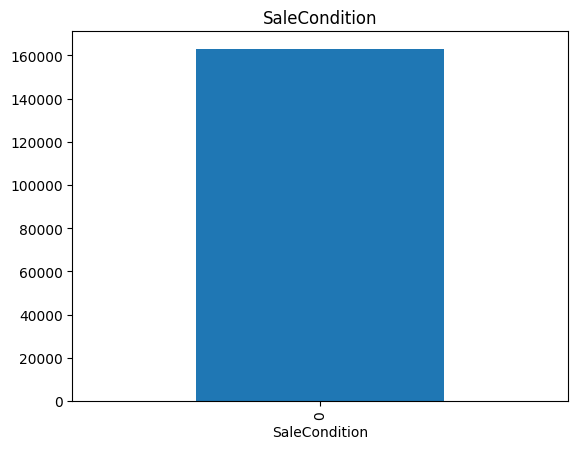

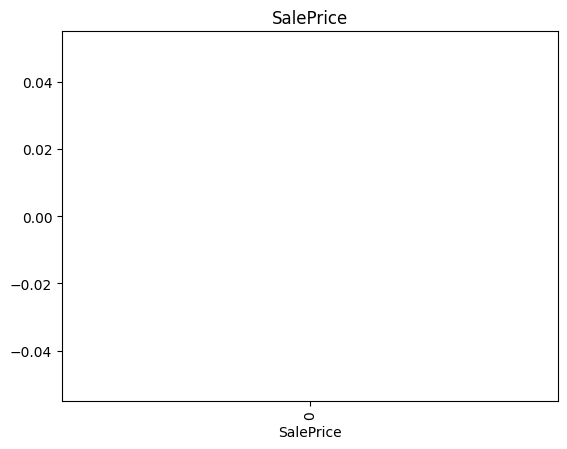

In [12]:
#Now let's see whether the missing data has some impact on the target variable.
#For this we'll convert all missing values in every feature as 1 and try to see their impact on SalePrice.
features = df_train.columns
for feature in features:
    data = df_train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

**Observations: We can see that features with nan values have some relation with the target variable, therefore we'll have to care of them with some imputation/encoding technique in the Feature Engineering stage.**

### 4.2 Numerical/Categorical Data

In [15]:
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
print('Number of numerical features:',len(numerical_features))
df_train[numerical_features].head()

Number of numerical features: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0   1          60         65.0     8450            7            5       2003  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          2003       196.0         706           0        150          856  \
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0       856       854             0       1710             1             0  \
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0         2         1             3             1             8           0  \
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0           2         548           0           61  \
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0              0          0            0         0        0       2    2008  \
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

<Axes: >

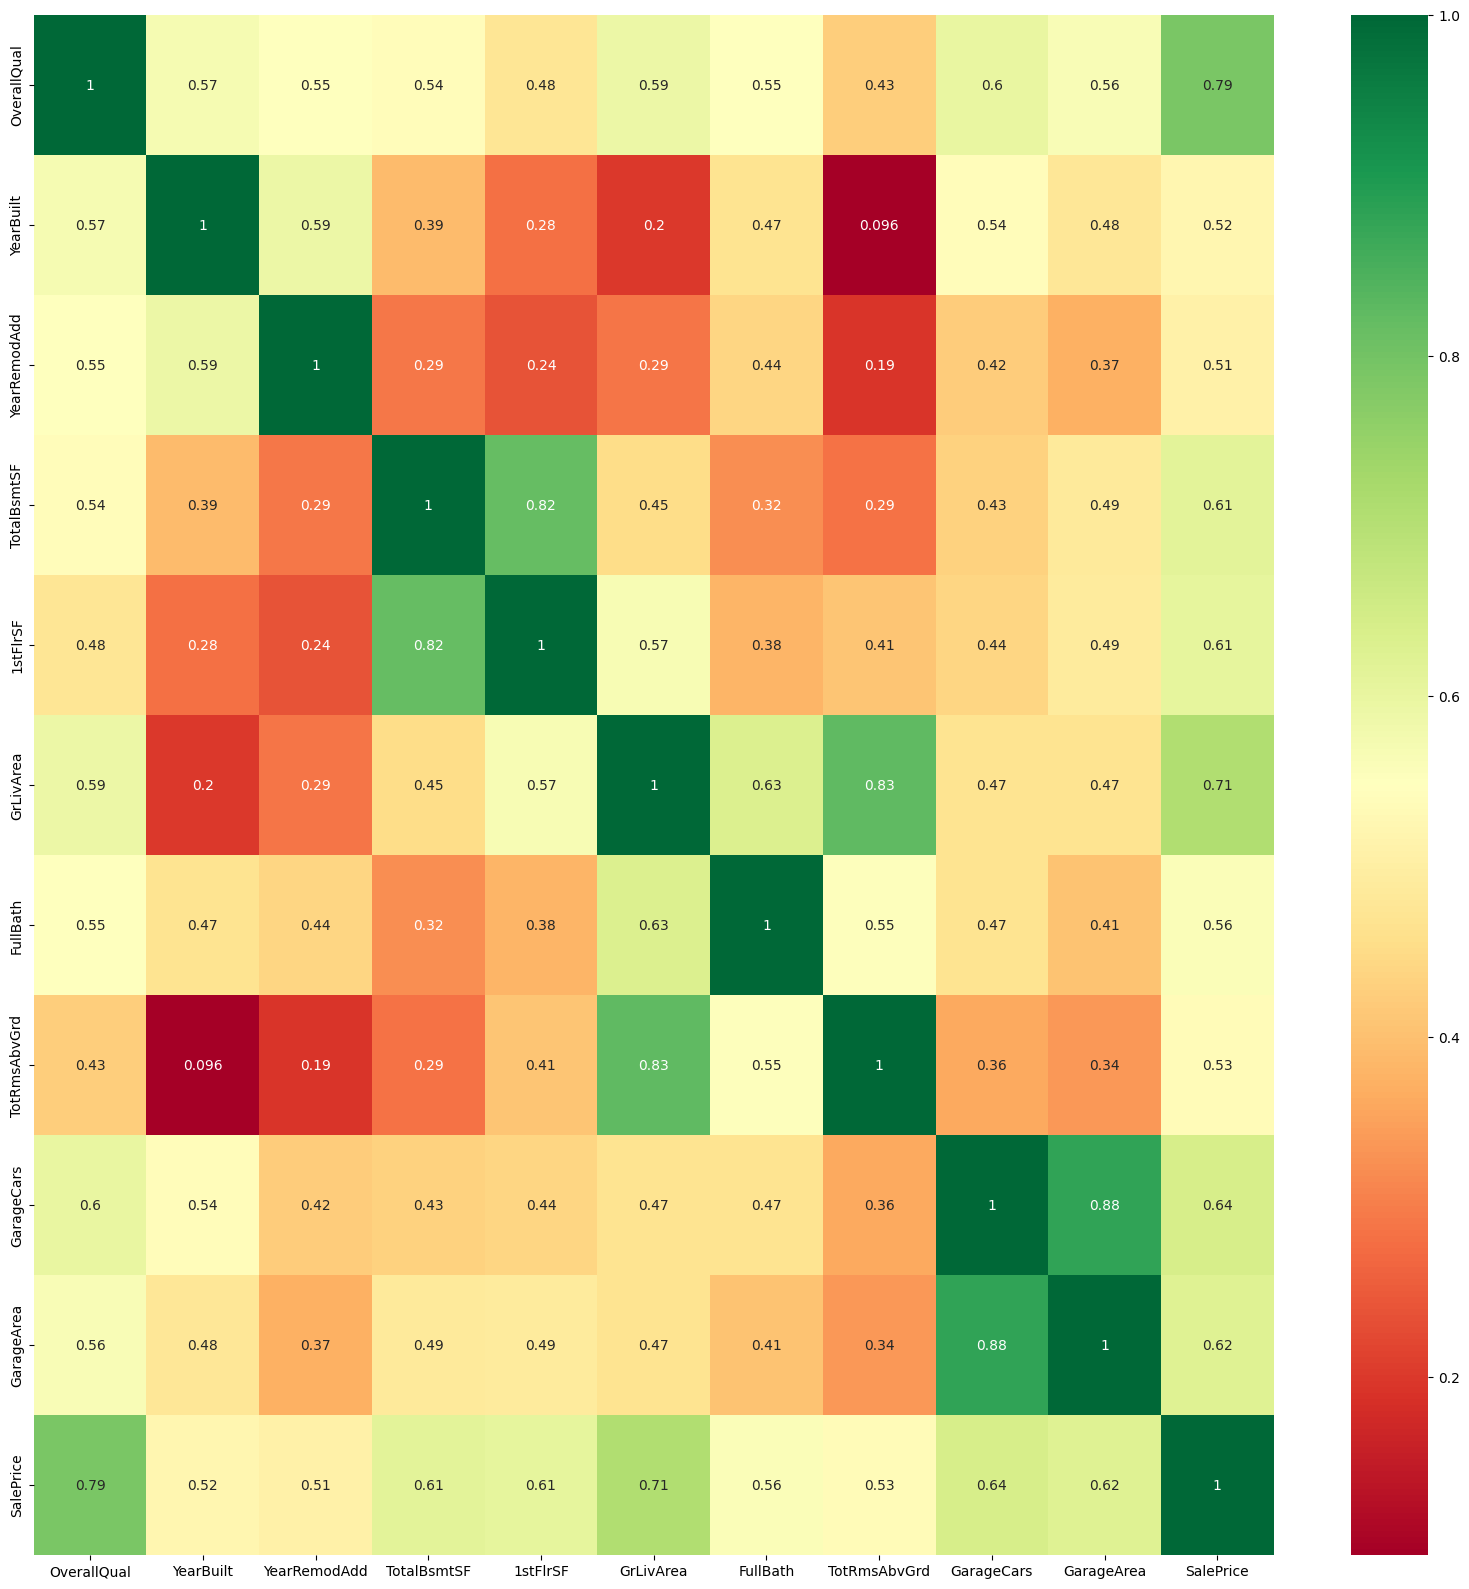

In [16]:
#Let's see how these features influence our target variable using a heatmap.
corrmatrix = df_train.corr(numeric_only=True)
top_corr_features = corrmatrix.index[abs(corrmatrix["SalePrice"])>=0.5] #We're only selecting highly correlated features.
plt.figure(figsize=(20,20))
sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#Here we have some DateTime variables such as YearBuilt, YearRemodAdd, GarageYrBlt, YrSold.
#We can convert these to gain more suitable information such as how old the house by subtracting the YrSold-YearBuilt.
year_vars = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

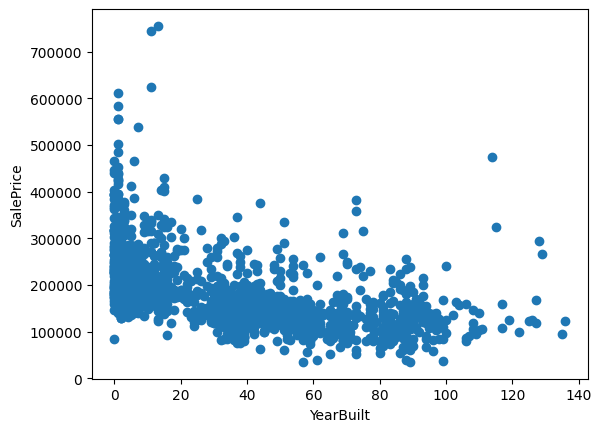

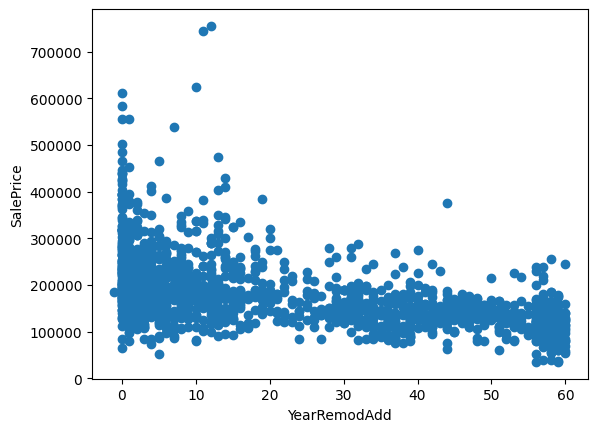

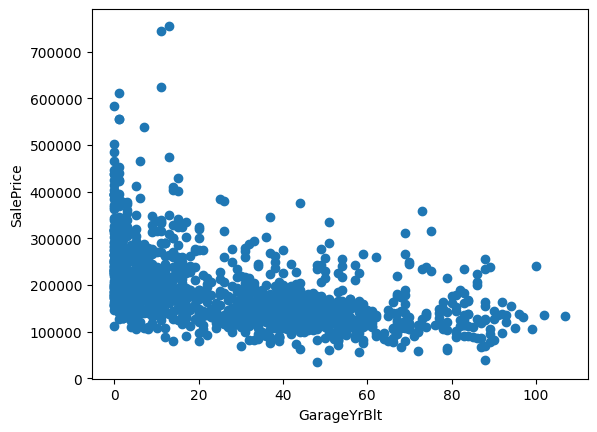

In [18]:
#Let's see the impact of these DateTime features with respect to SalePrice
for feature in year_vars:
    if feature!='YrSold':
        data = df_train.copy()
        data[feature] = data['YrSold']-data[feature] #We'll calculate the difference between the year features and the year the house was sold for.
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

**Observations: We can see from the scatter plots that the SalePrice for old houses is low compared to new houses which is not surprising. Therefore these datetieme features will play a valuable role in our model building.**

In [19]:
#Let's look at our discreet features.
discreet_features=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_vars+['Id']]
print('Number of Discreet Features:',len(discreet_features))
df_train[discreet_features].head()

Number of Discreet Features: 17


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath   
0          60            7            5             0             1  \
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   
0             0         2         1             3             1             8  \
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

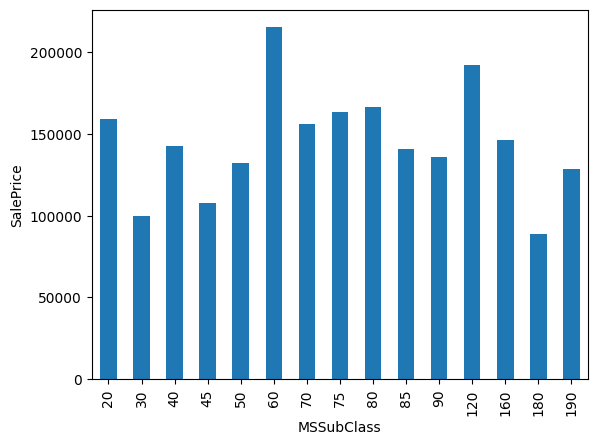

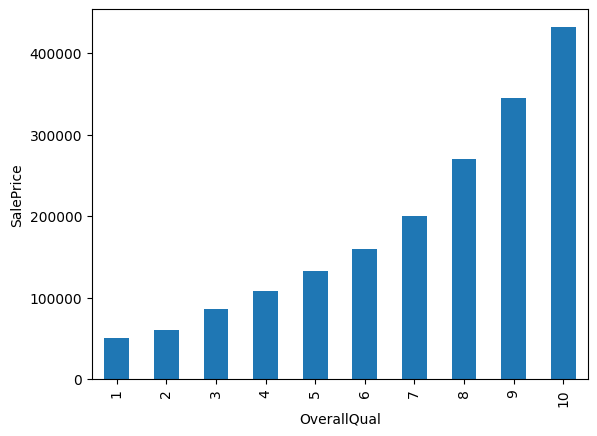

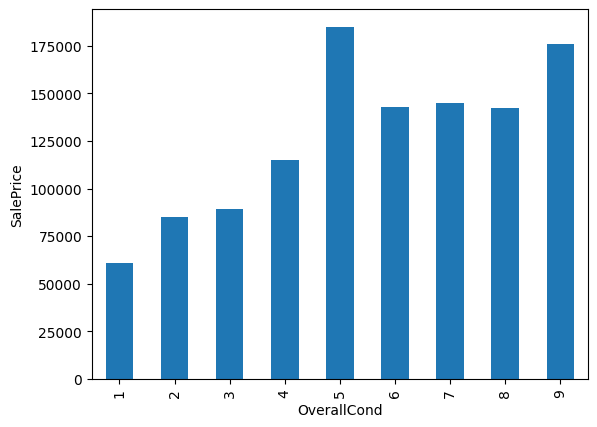

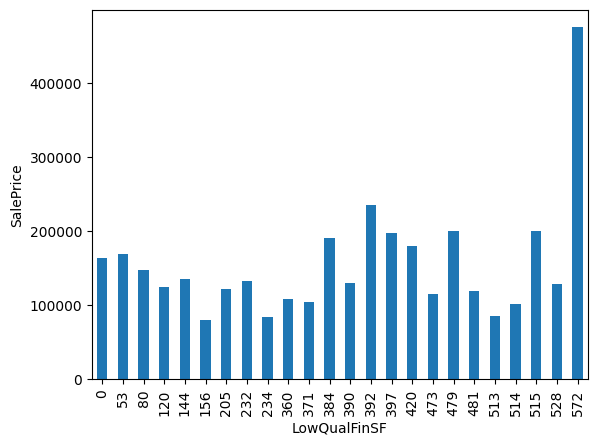

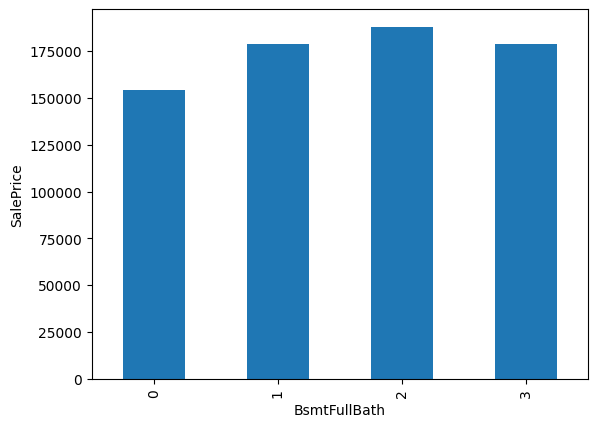

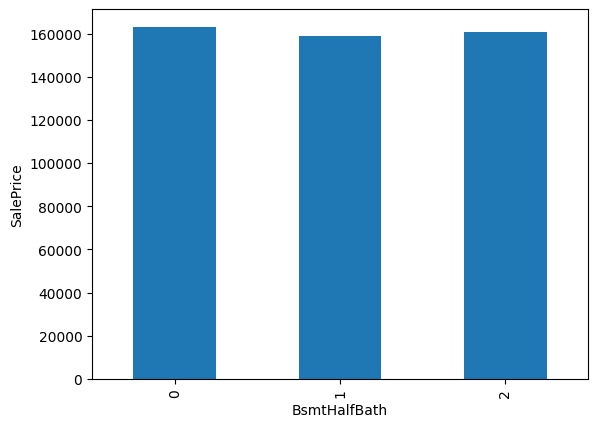

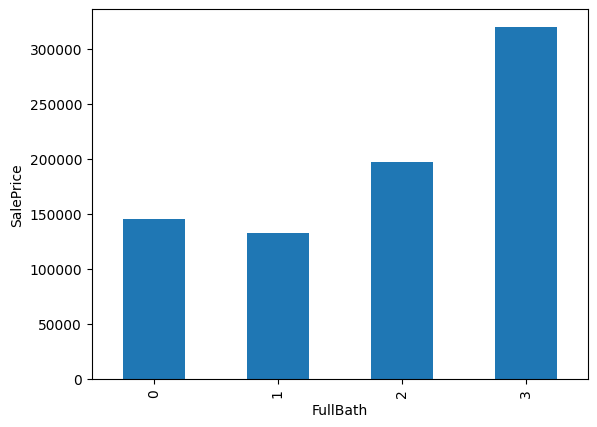

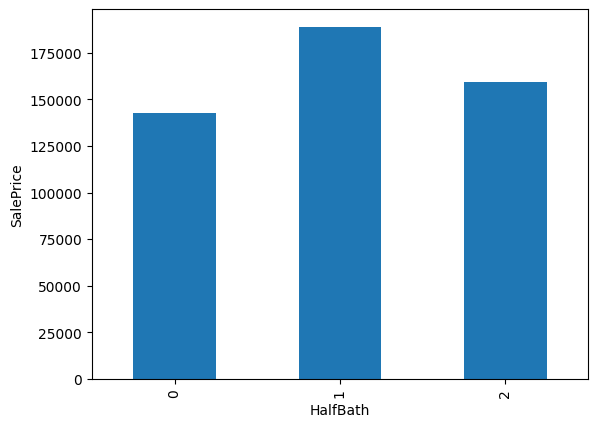

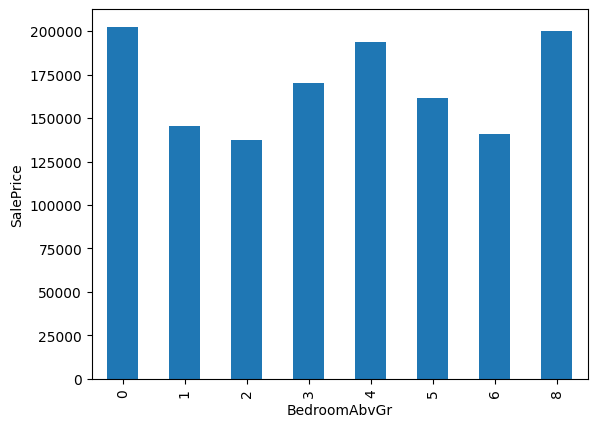

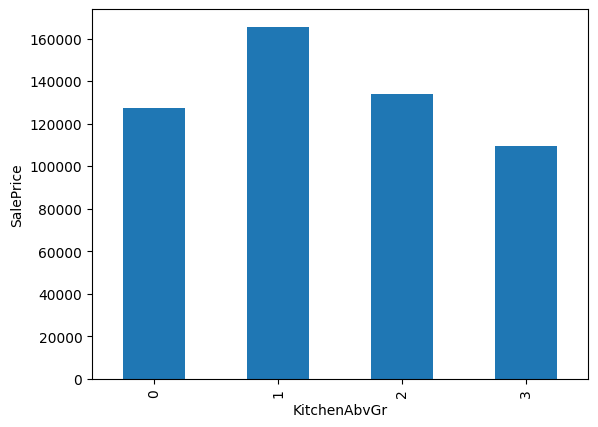

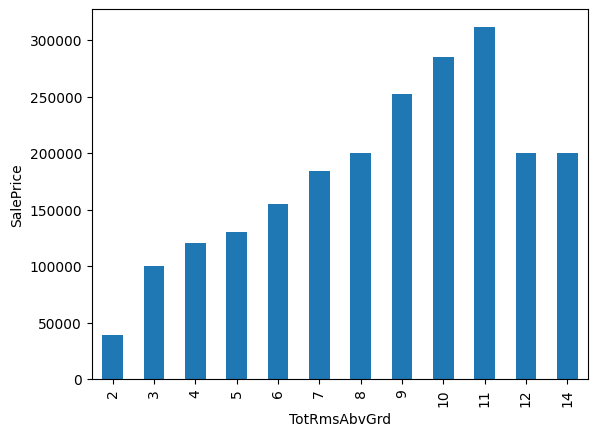

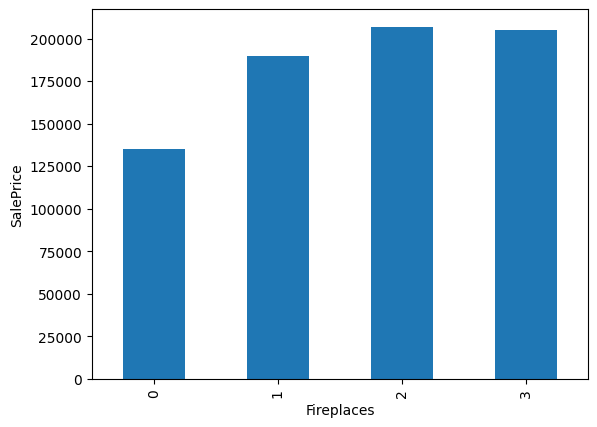

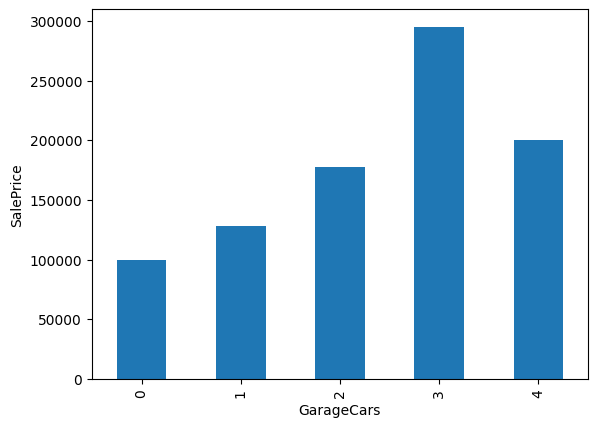

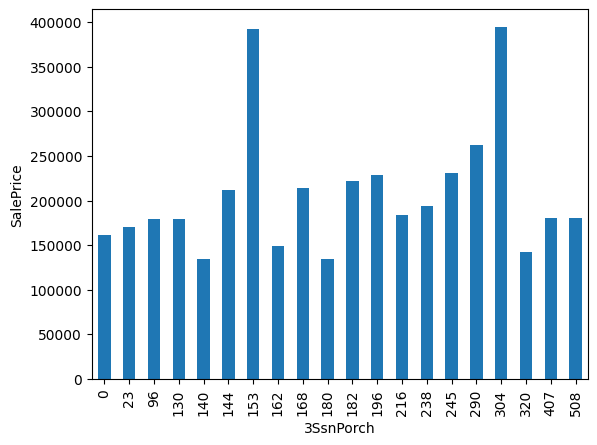

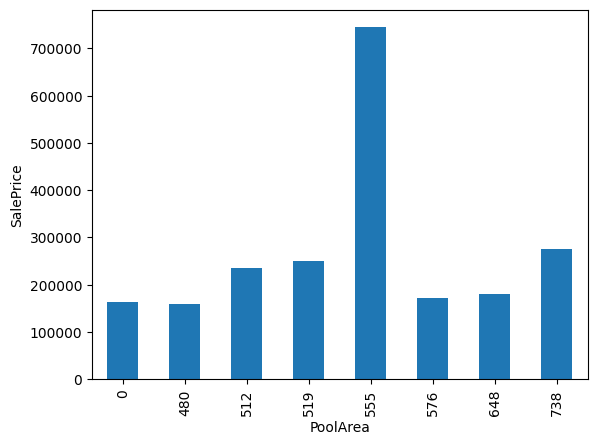

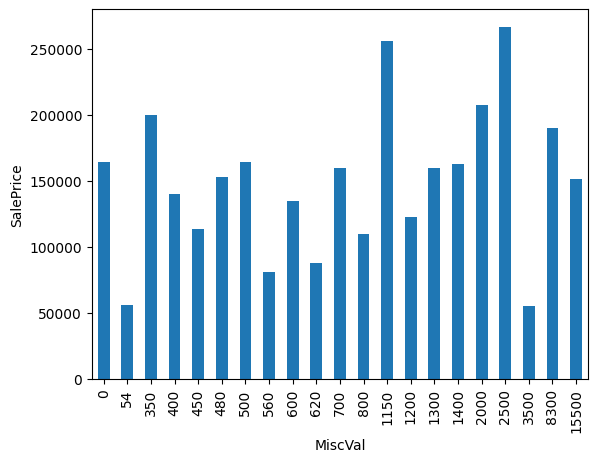

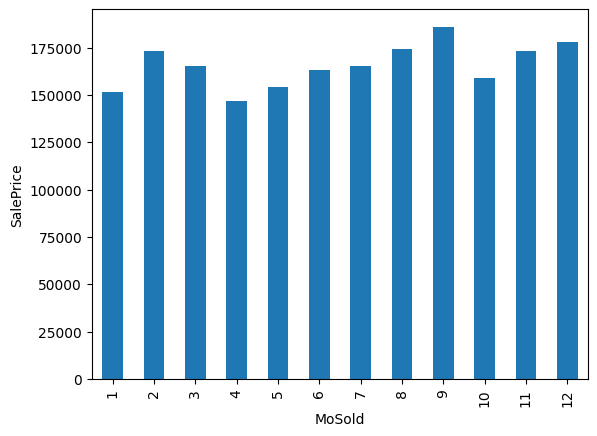

In [20]:
#Let'see how the discreet features vary with the SalePrice using barplots
for feature in discreet_features:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

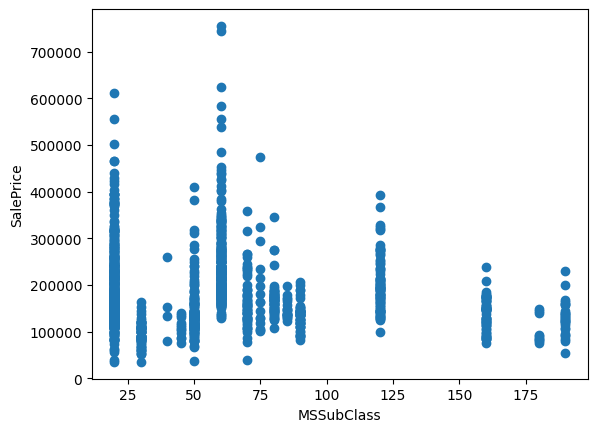

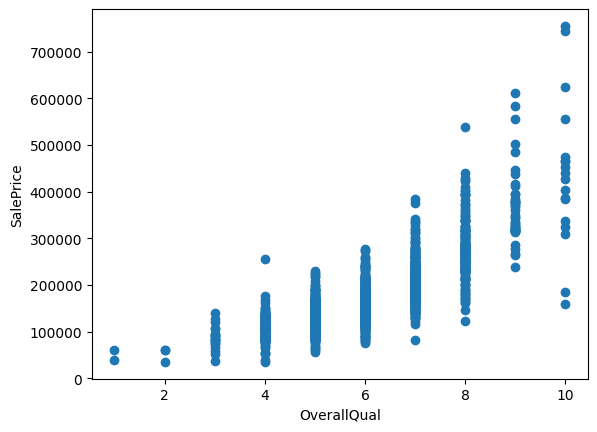

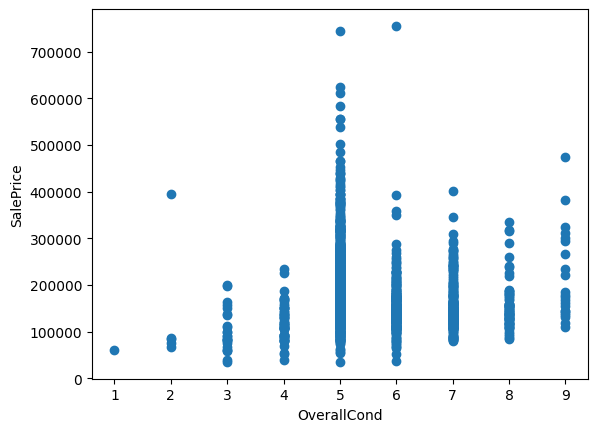

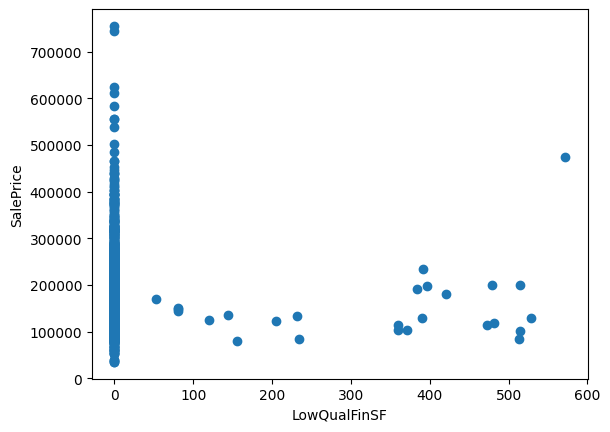

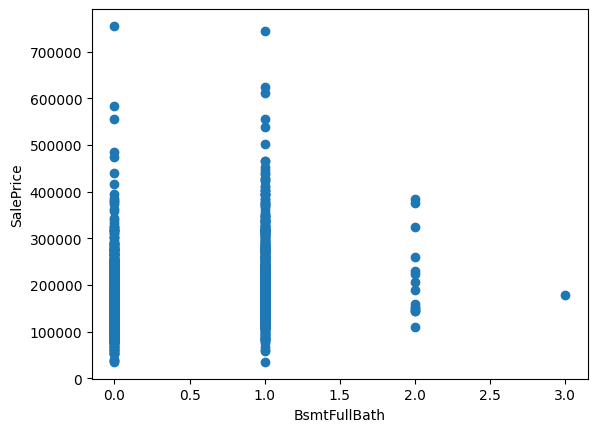

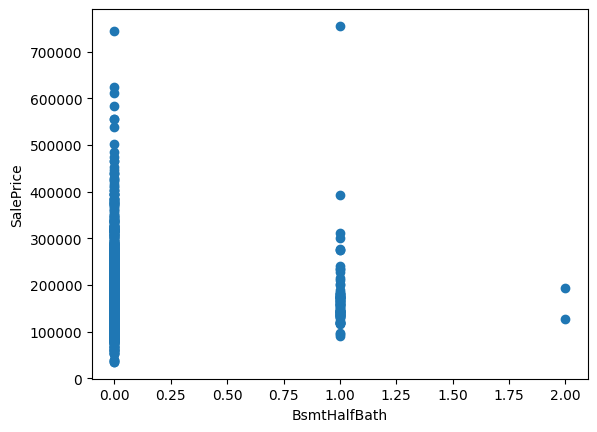

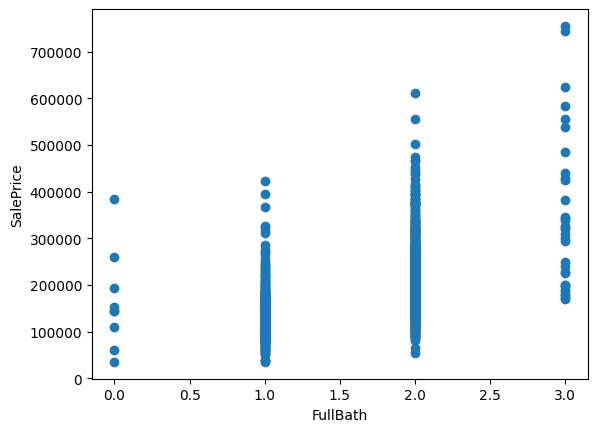

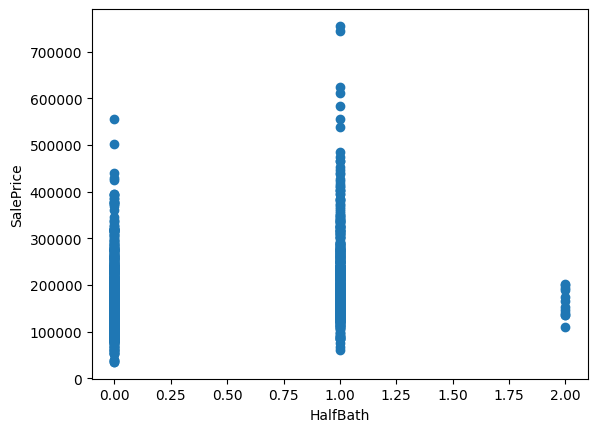

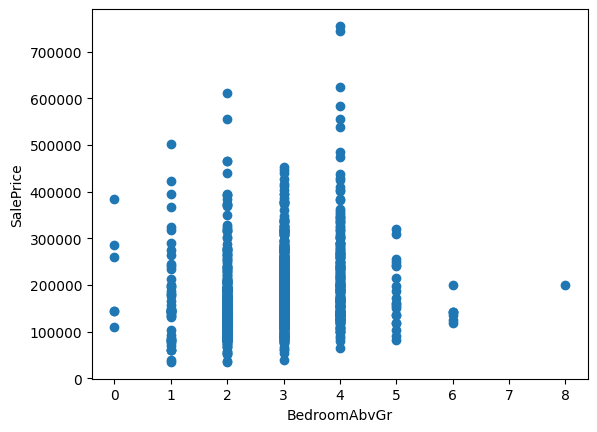

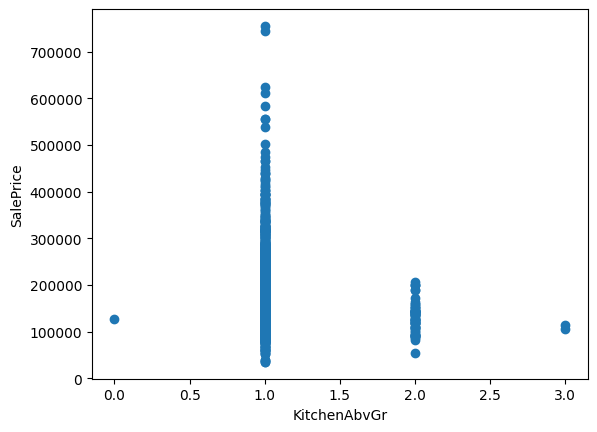

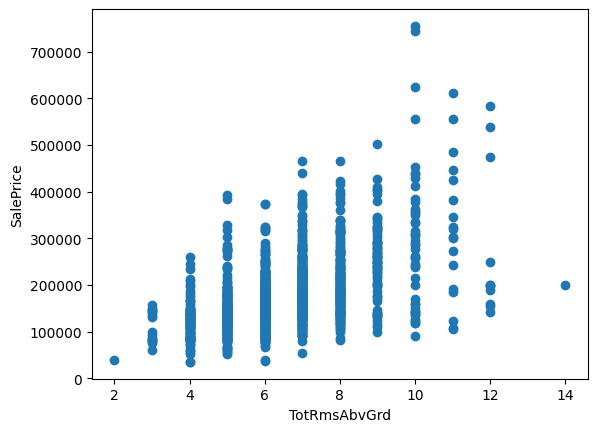

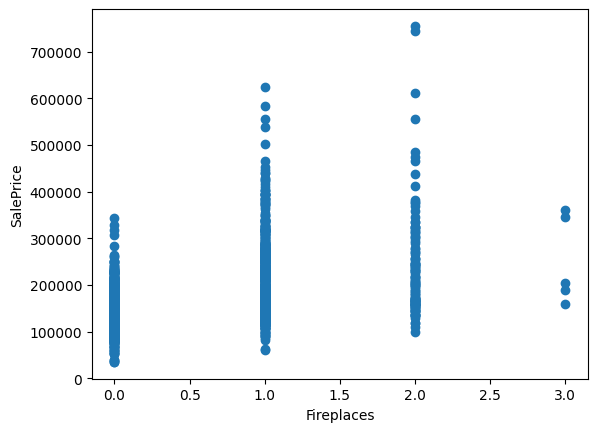

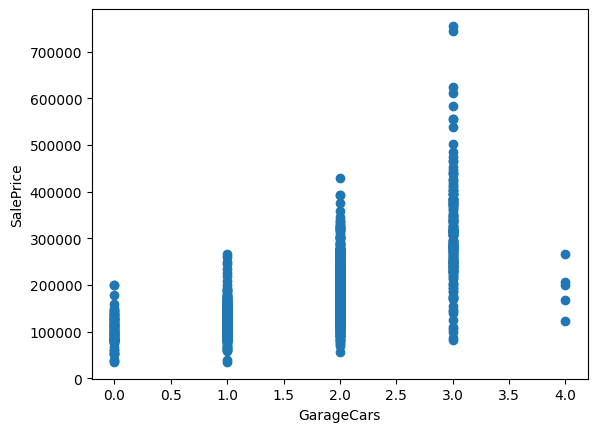

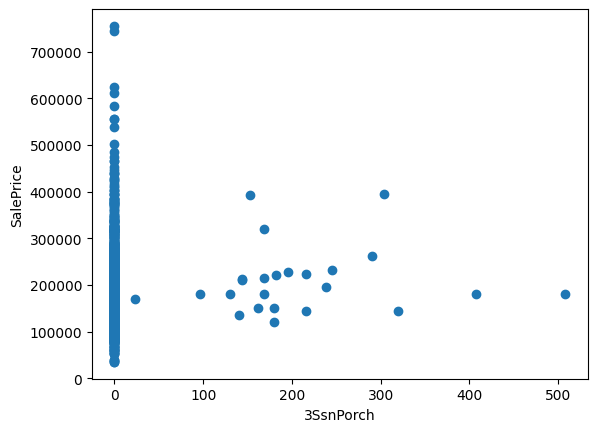

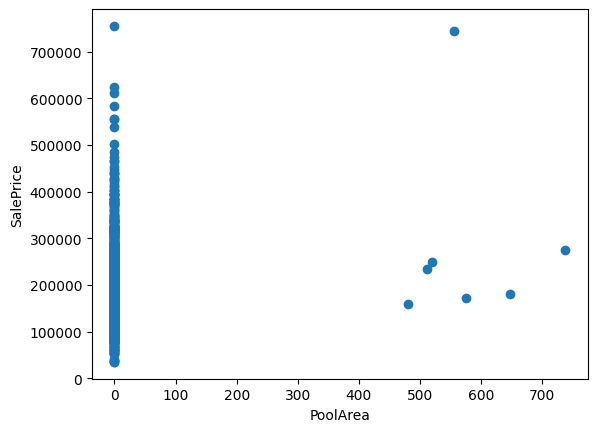

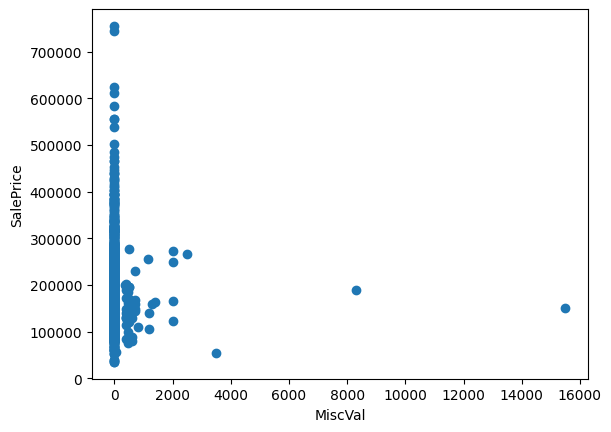

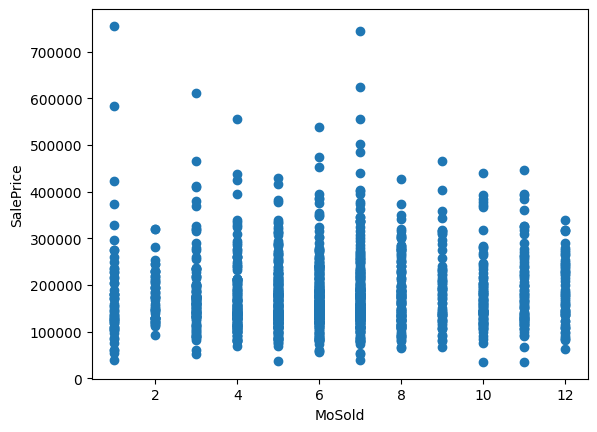

In [21]:
#Let'see how the discreet features vary with the SalePrice using scatterplots.
for feature in discreet_features:
    data = df_train.copy()
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

**Observations: We can see from the heatmap and barplots that quite a lot of features such as OverallQual,YearBuilt and others have a high correlation with SalePrice therefore we'll have to take them into consideration during feature selection stage. Some features which are highly correlated with each other will have to be dropped becuase they won't be of any value to the model.**

In [22]:
#Let's have a look at our continuous features.
continuous_features = [feature for feature in numerical_features if feature not in discreet_features+year_vars+['Id']]
print('Number of Continuous Features:',len(continuous_features))

Number of Continuous Features: 16


In [23]:
df_train[continuous_features].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
0         65.0     8450       196.0         706           0        150  \
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF   
0          856       856       854       1710         548           0  \
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

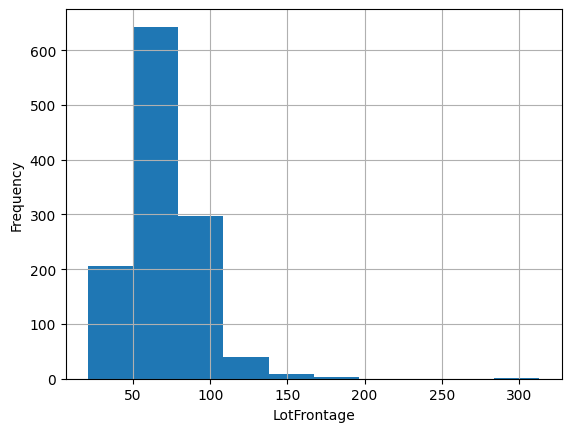

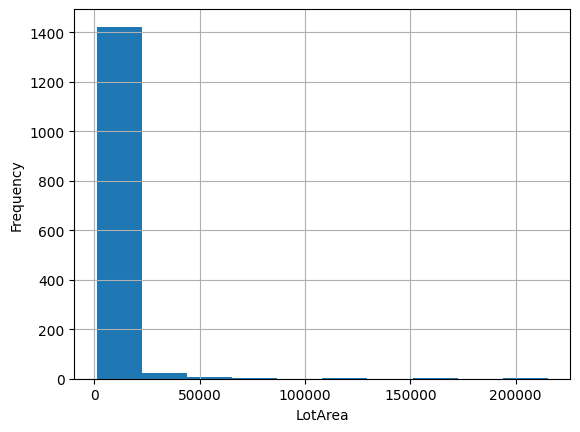

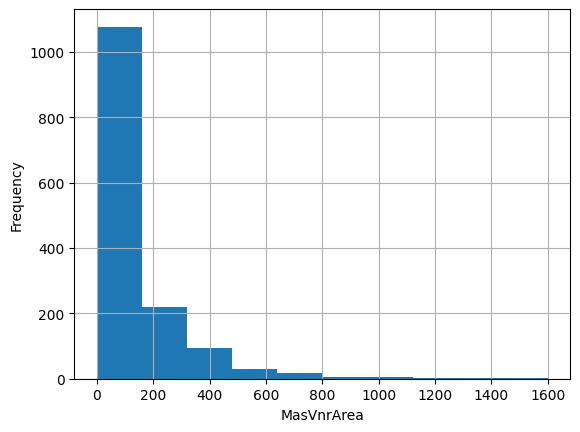

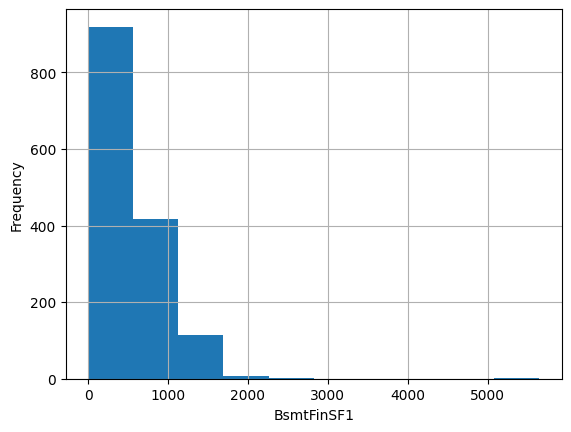

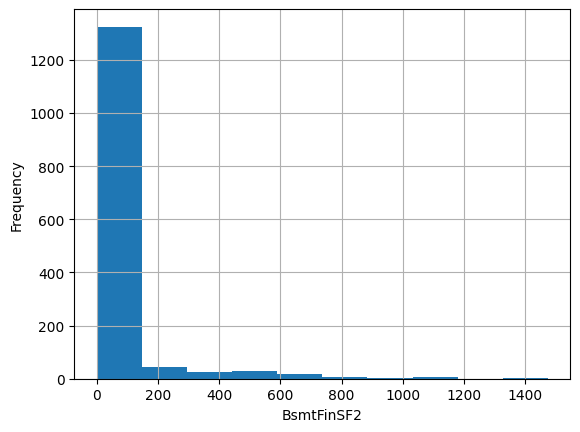

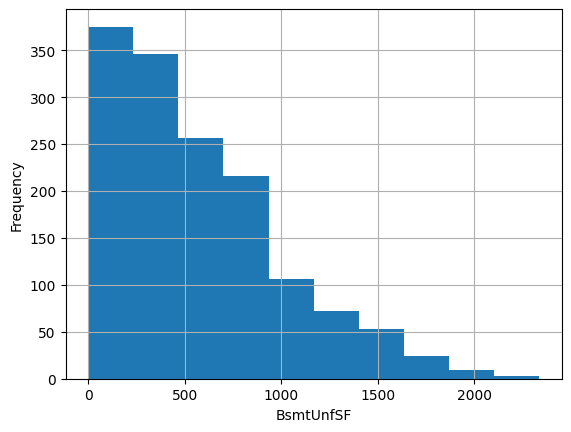

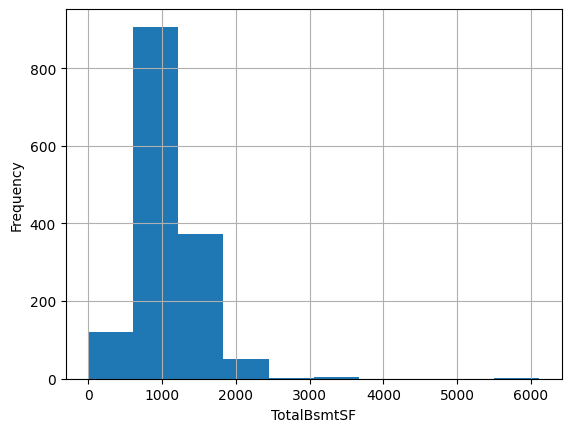

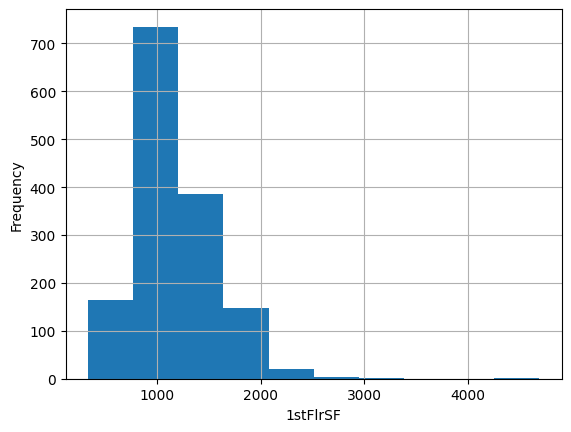

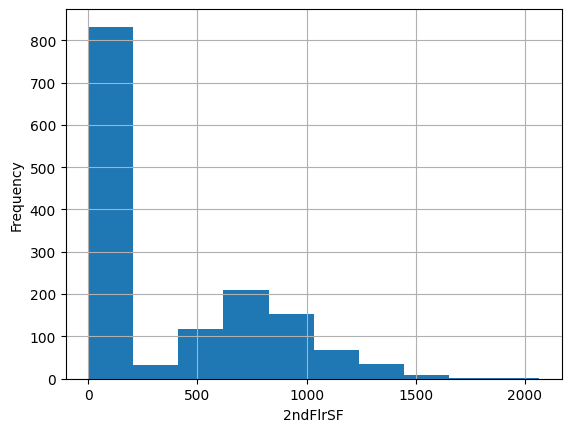

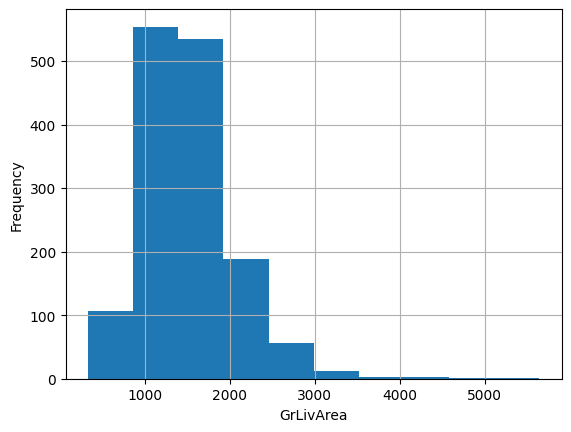

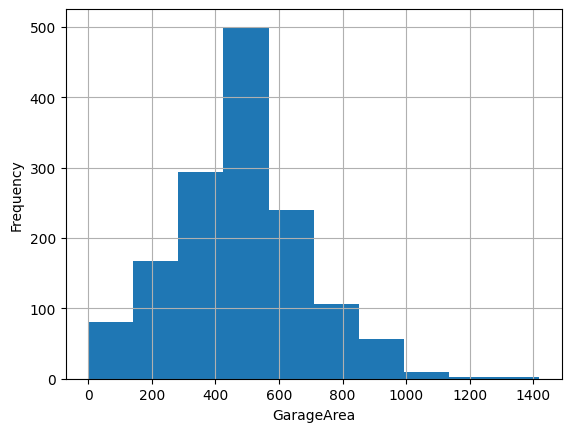

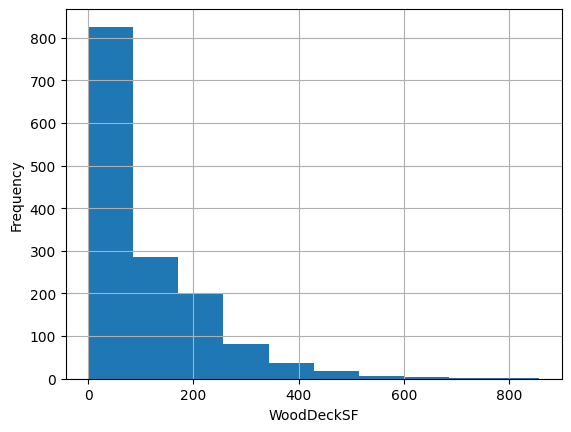

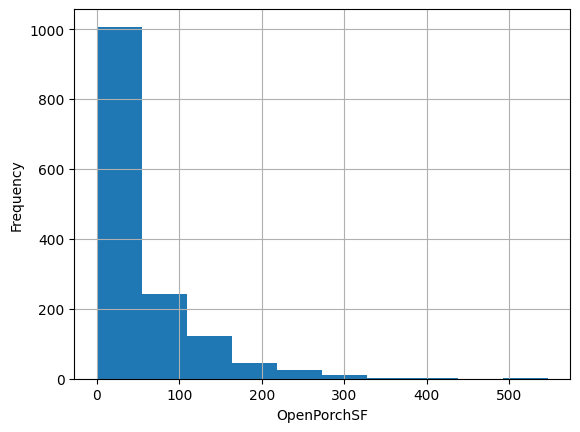

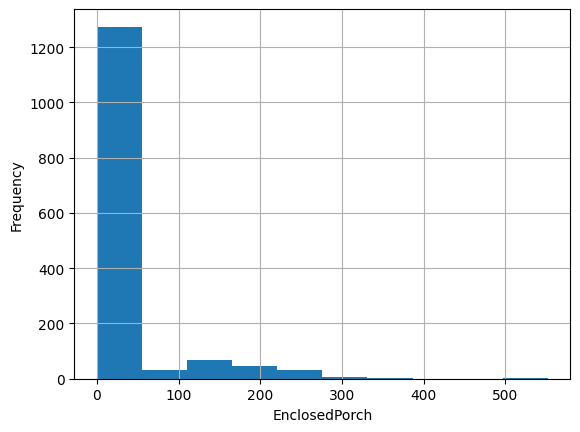

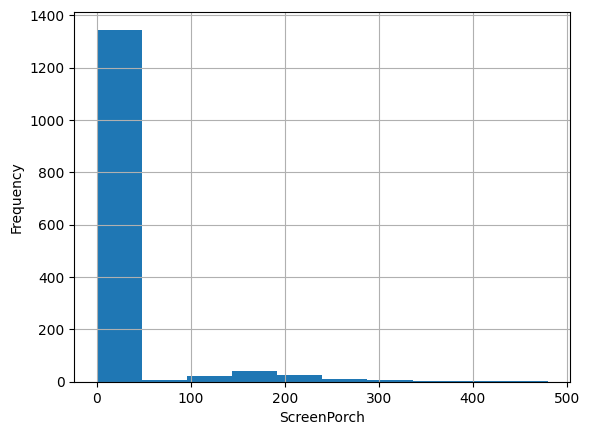

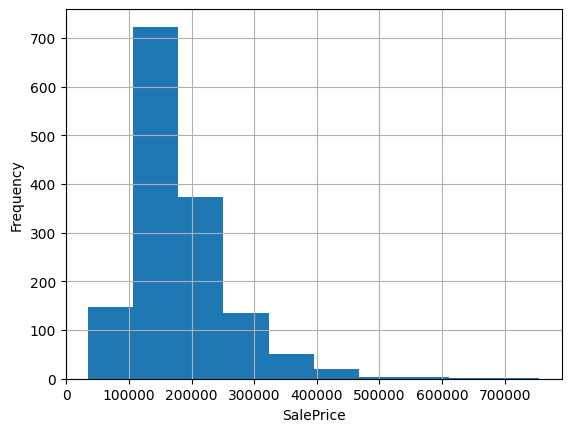

In [24]:
#Let's see the distrbution of continuous variables using histograms.
for feature in continuous_features:
    data = df_train.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Observations: We can see that most of the continuous features are skewed. So we'll have to transform them to gaussian distribution using some transformation technique. We'll be doing this in Feature Engineering so that our Regression models give accurate results.**

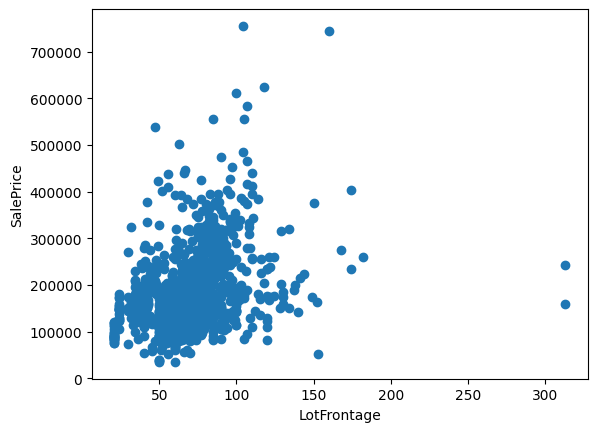

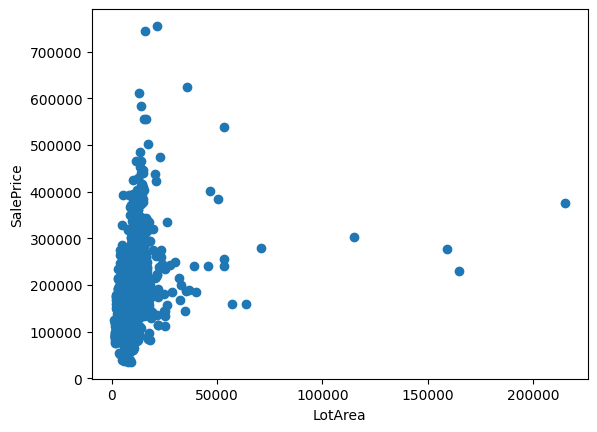

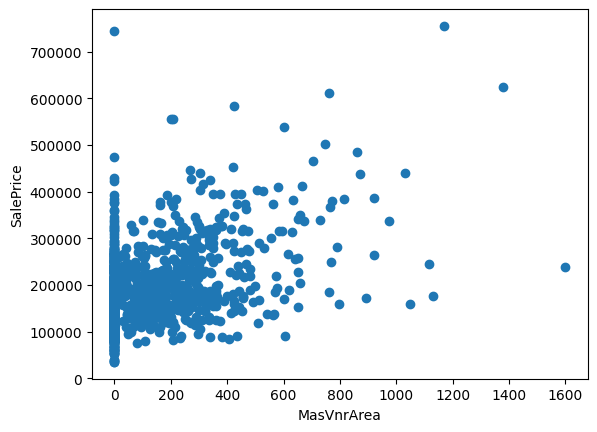

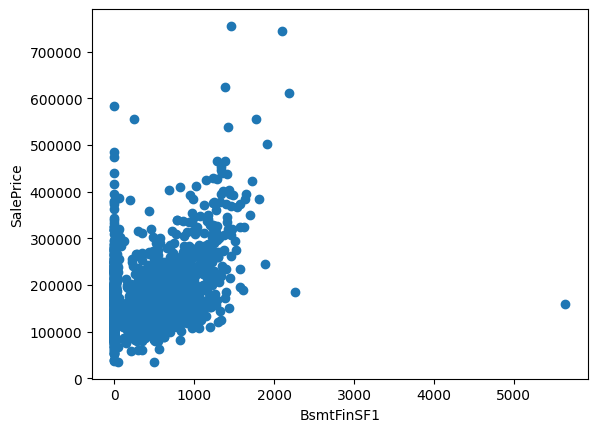

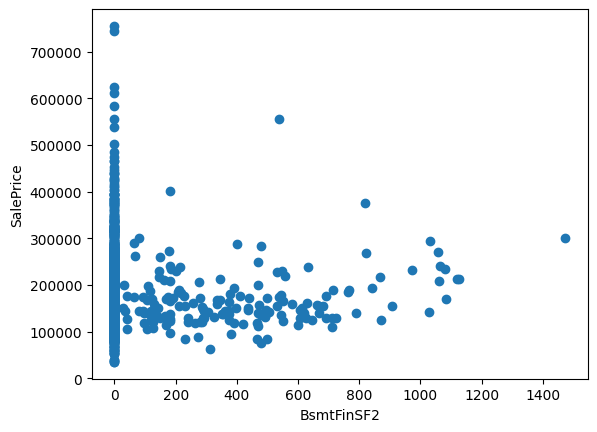

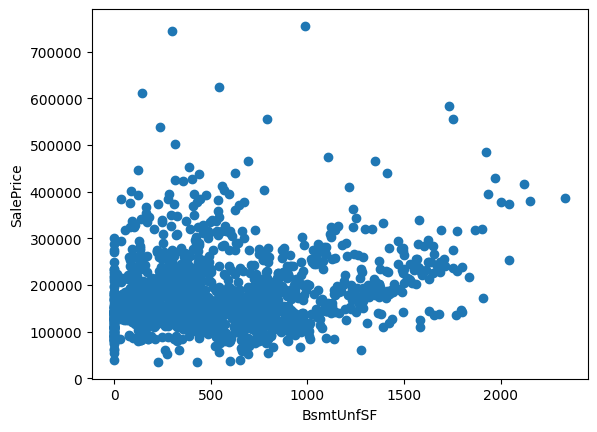

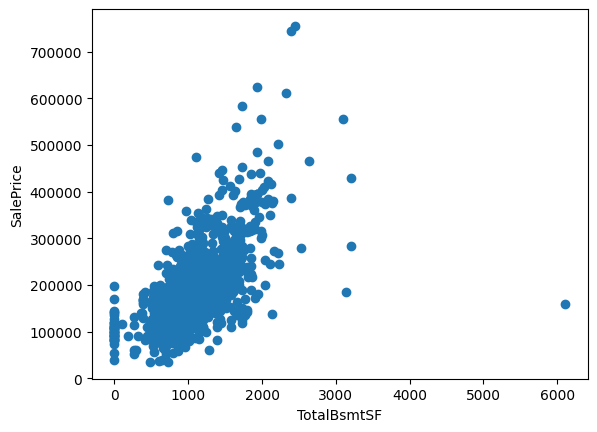

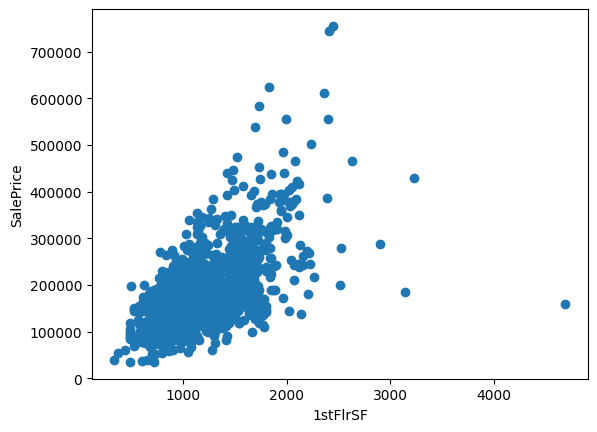

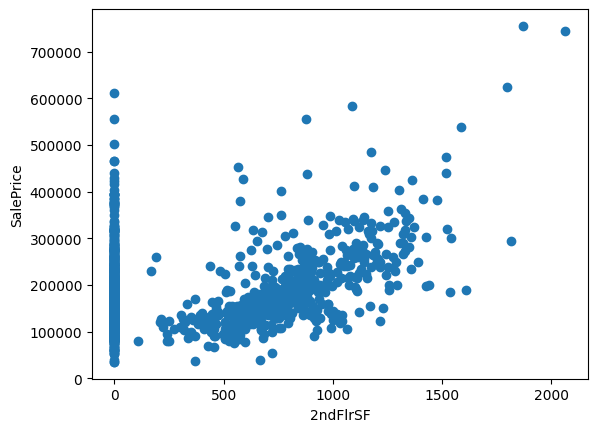

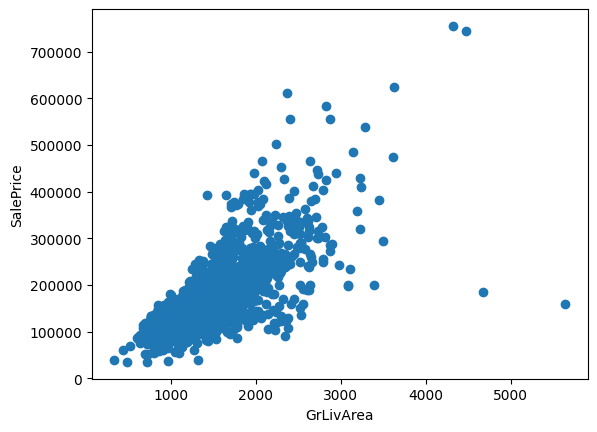

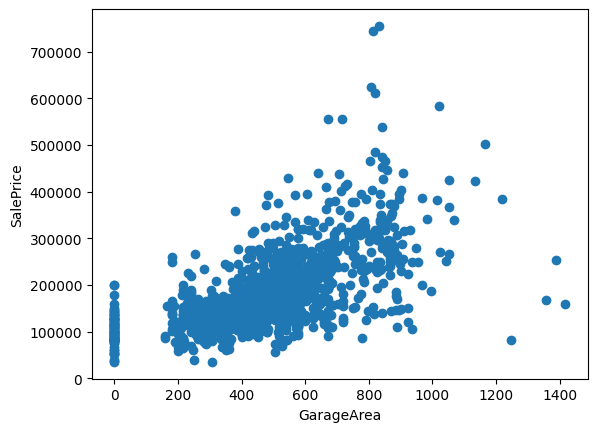

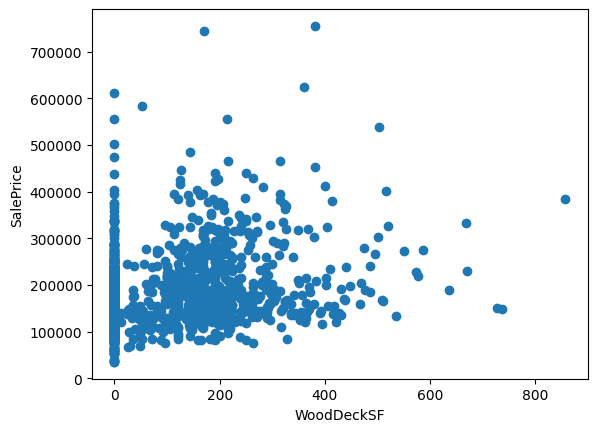

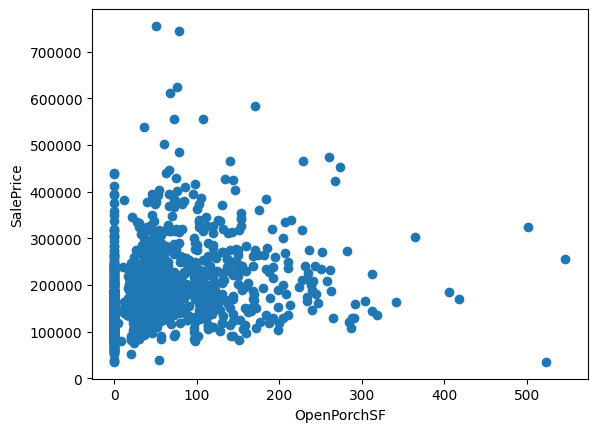

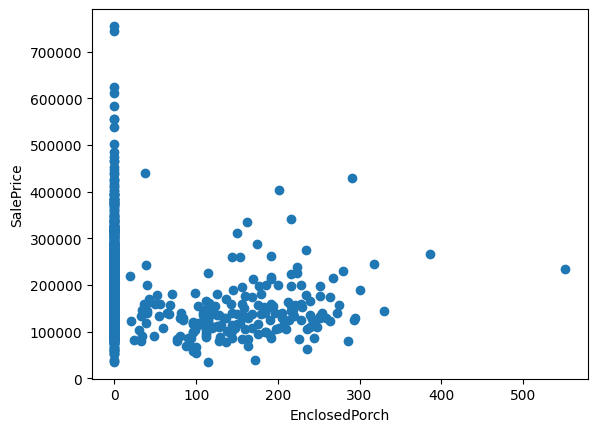

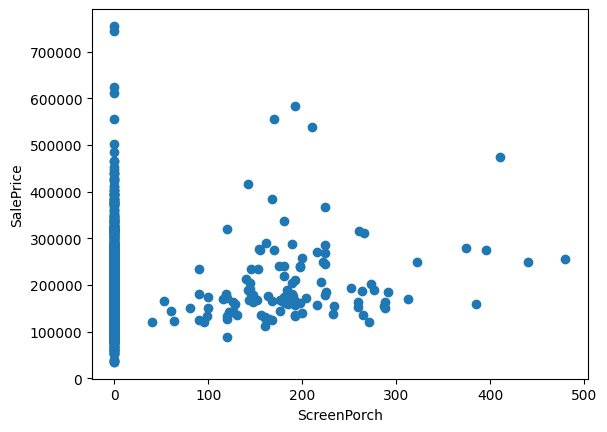

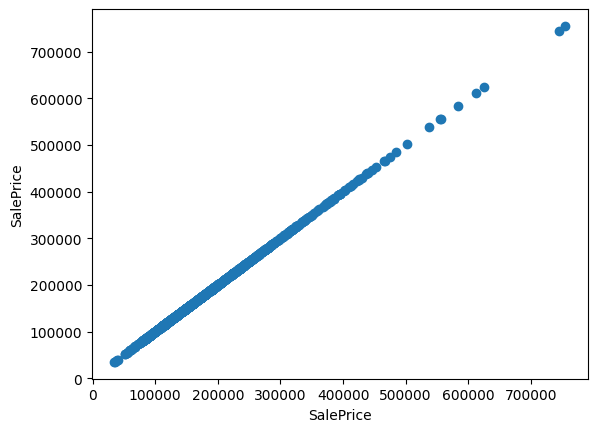

In [25]:
#Let'see how the continuous features vary with the SalePrice using scatterplots.
for feature in continuous_features:
    data = df_train.copy()
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

**Observations: Most of the features such as LotFrontage,BsmtFinSF1,GrLivArea seem to follow somewhat of a linear relationship with SalePrice having some major outliers.**

In [26]:
#Finally let's look at our categorical features.
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']
print('Number of Categorical Features:',len(categorical_features))
df_train[categorical_features].head()

Number of Categorical Features: 43


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope   
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl  \
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl   
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg  \
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual   
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd  \
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC   
0       TA           No          GLQ          Unf    GasA        Ex  \
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType   
0          Y      SBrkr          Gd        Typ         NaN     Attchd  \
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature   
0          RFn         TA         TA          Y    NaN   NaN         NaN  \
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [27]:
#Let's check how many categories are present in each feature.
for feature in categorical_features:
    print(feature,'has',len(df_train[feature].unique()),'categories')

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
MasVnrType has 4 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 6 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

In [28]:
for feature in categorical_features:
    print(feature,':',df_train[feature].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

**Obersvations: As you can you we have a lot of categorical features present in our dataset therefore we'll try to use some encoding technique in feature technique to convert them to numerical data to feed into our model.** 

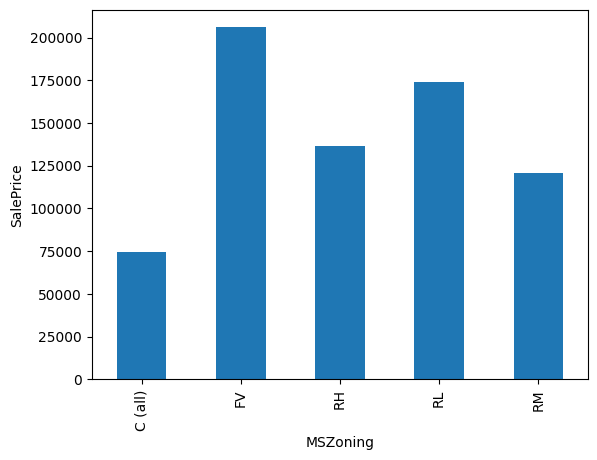

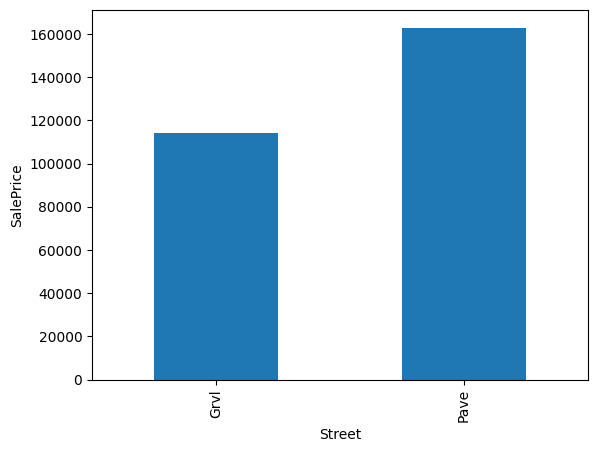

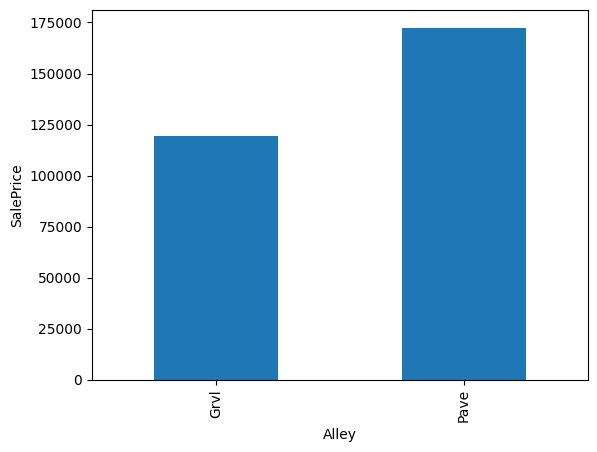

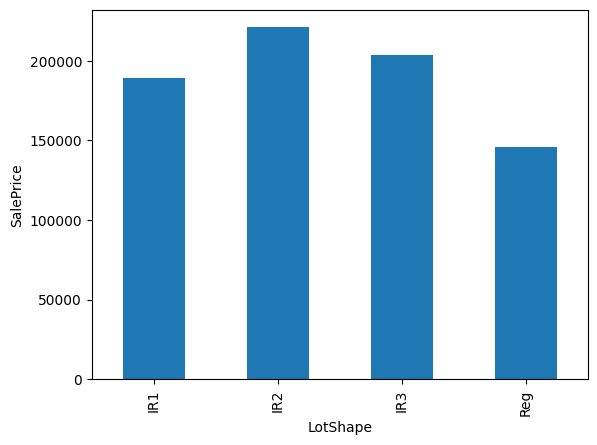

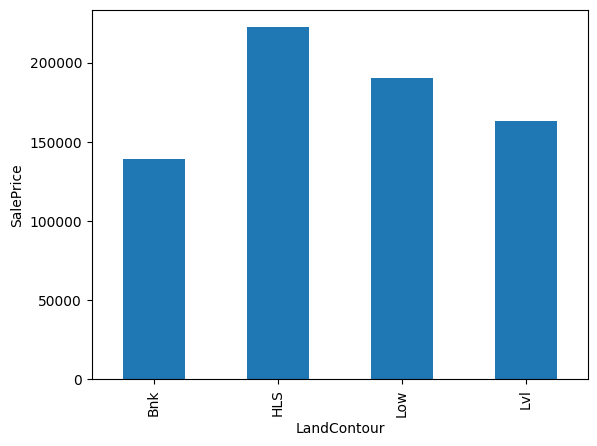

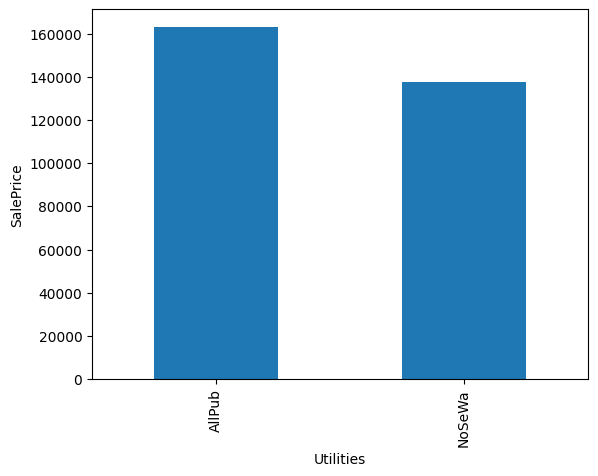

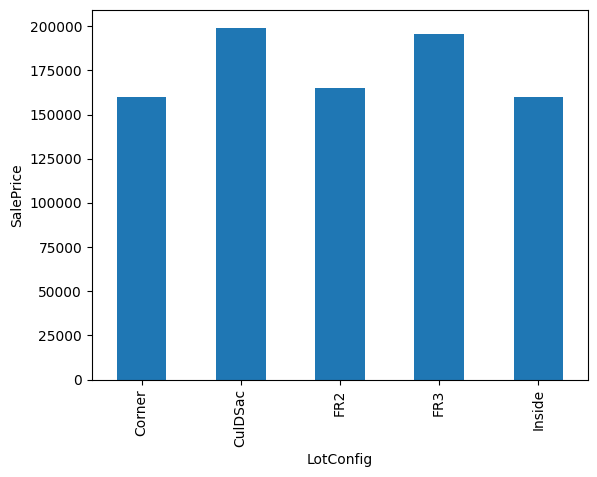

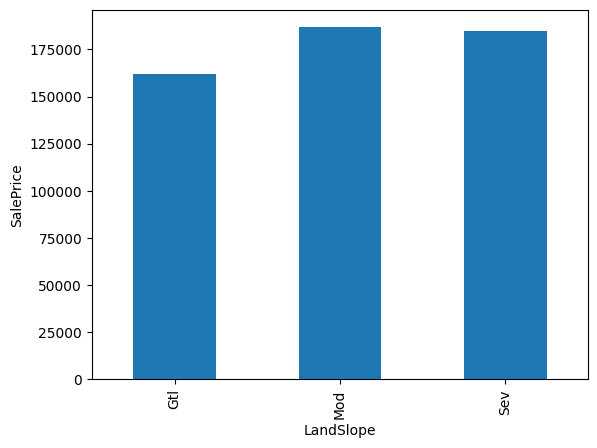

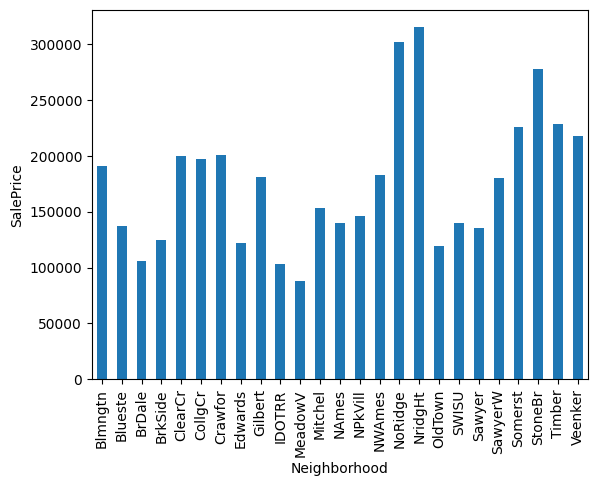

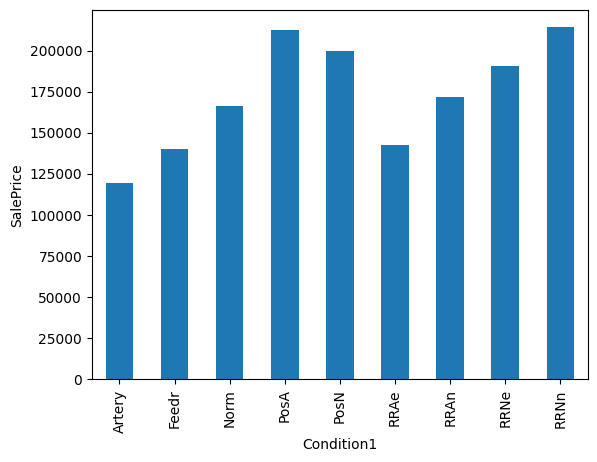

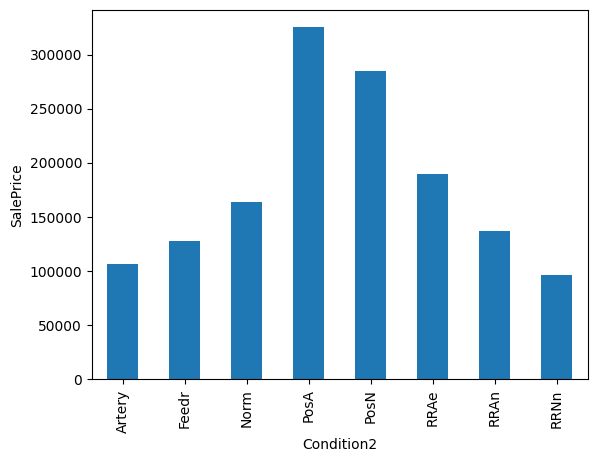

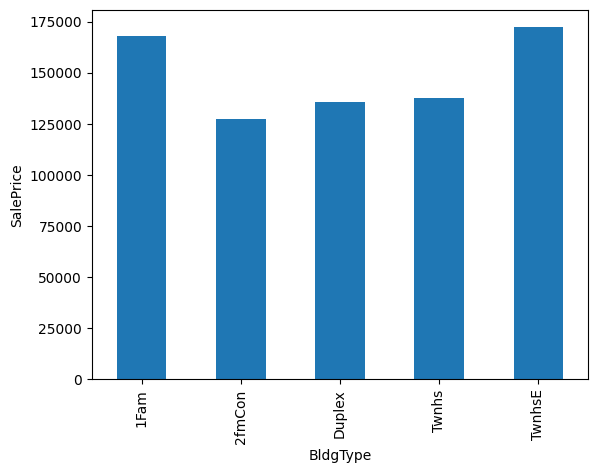

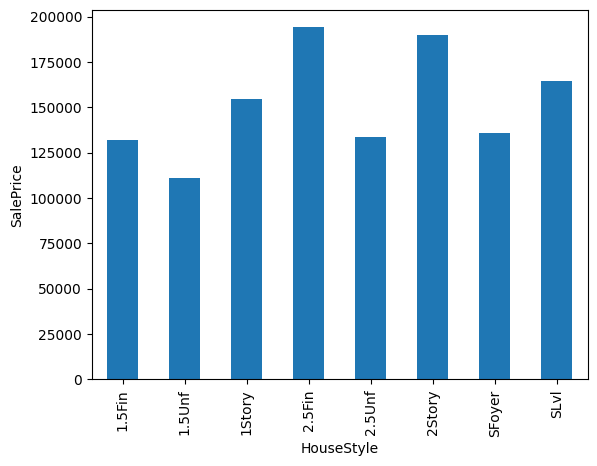

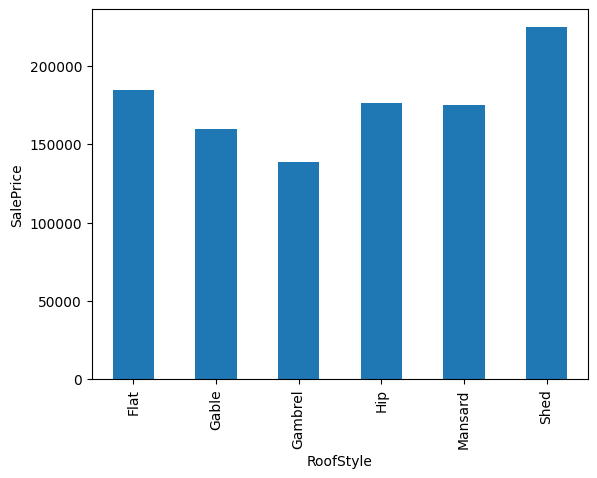

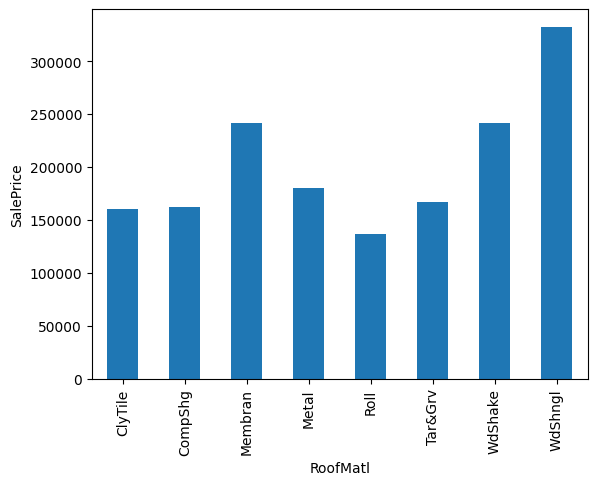

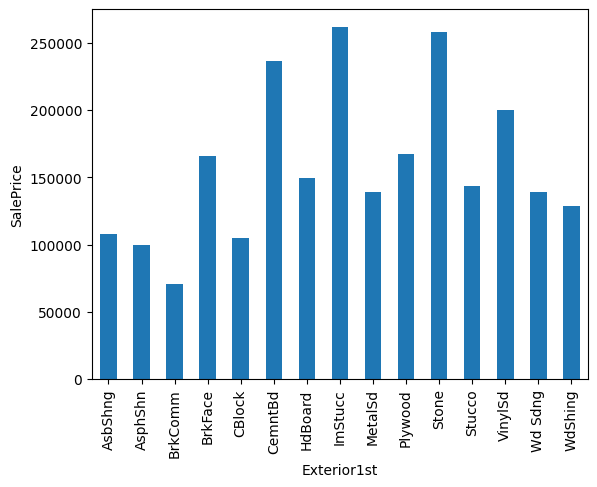

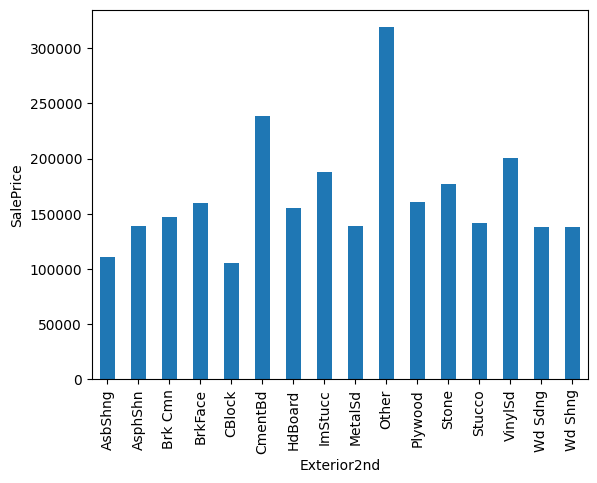

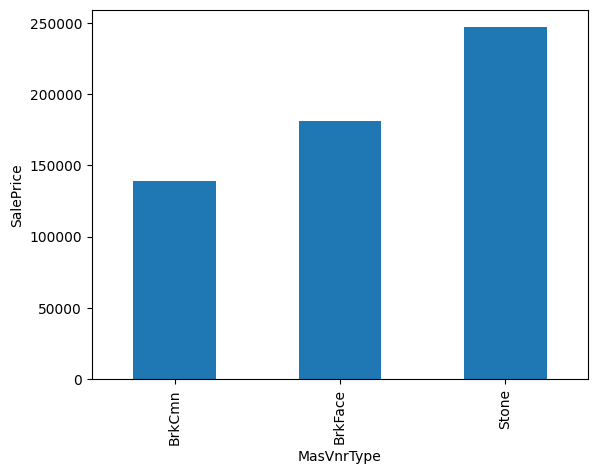

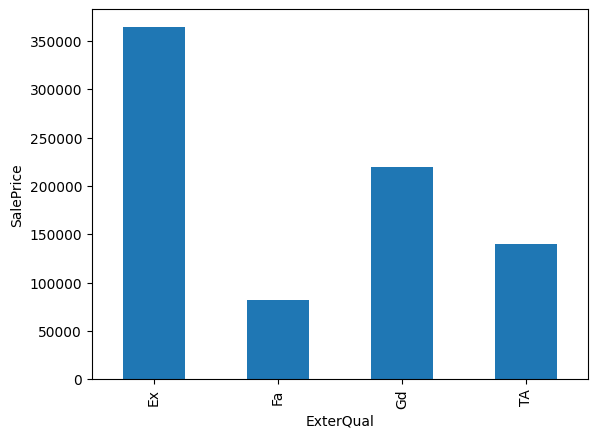

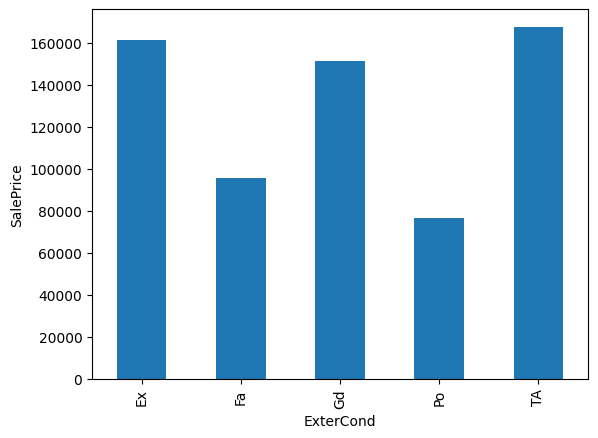

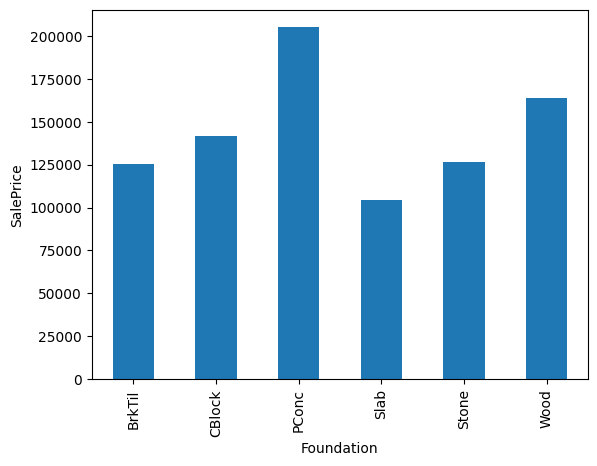

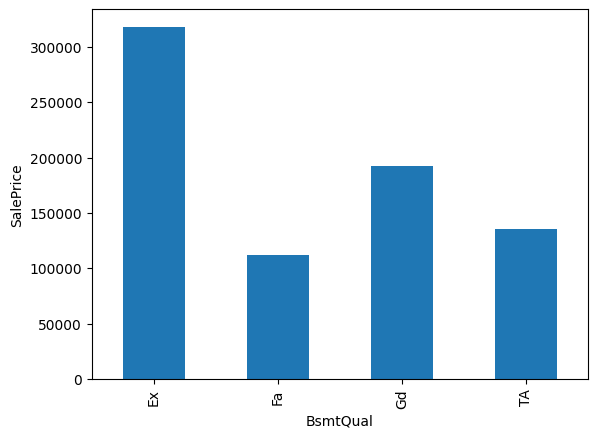

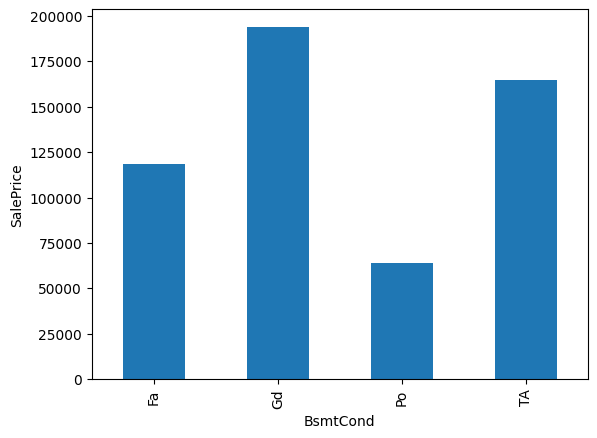

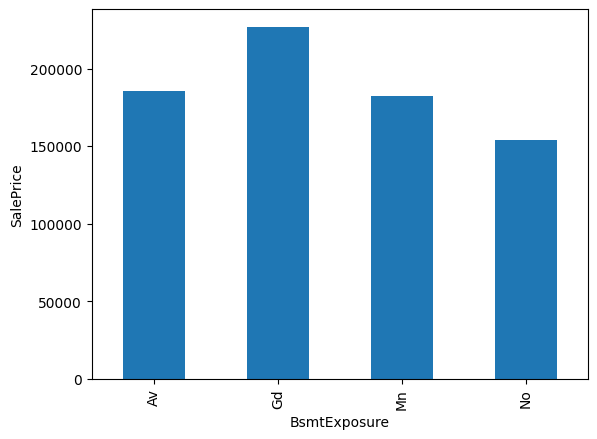

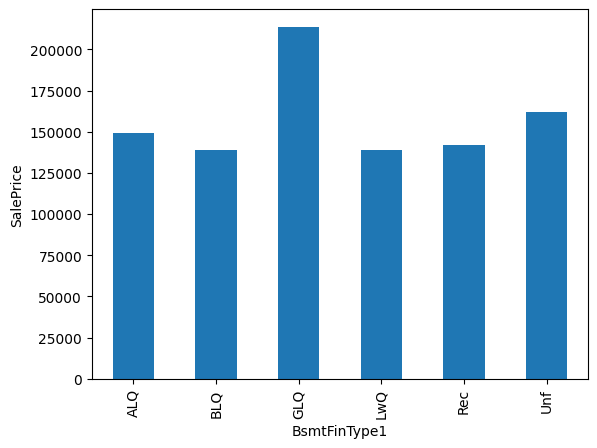

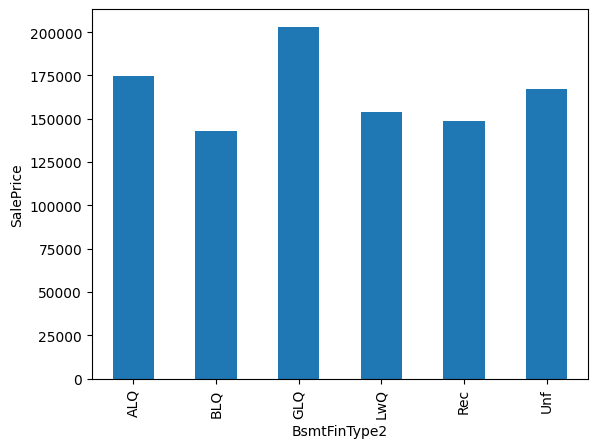

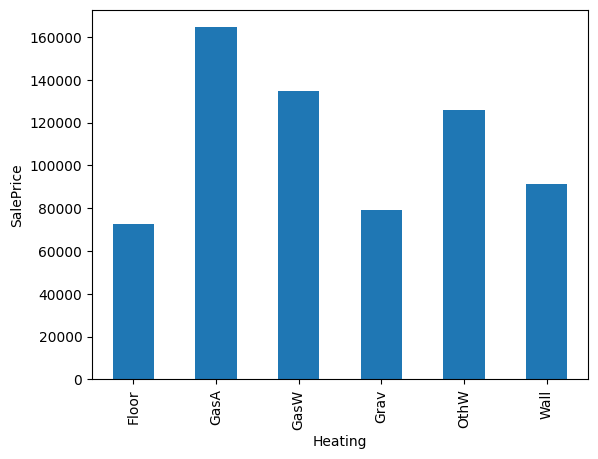

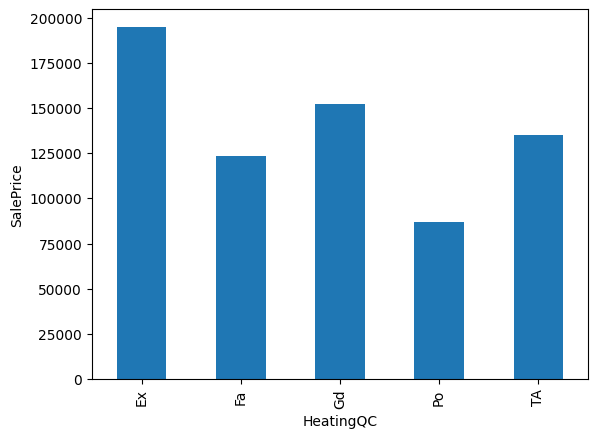

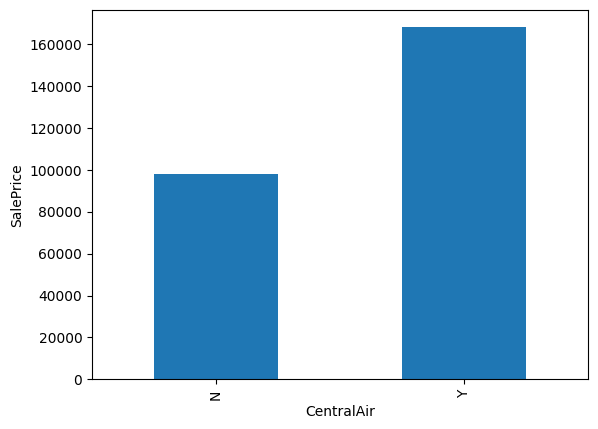

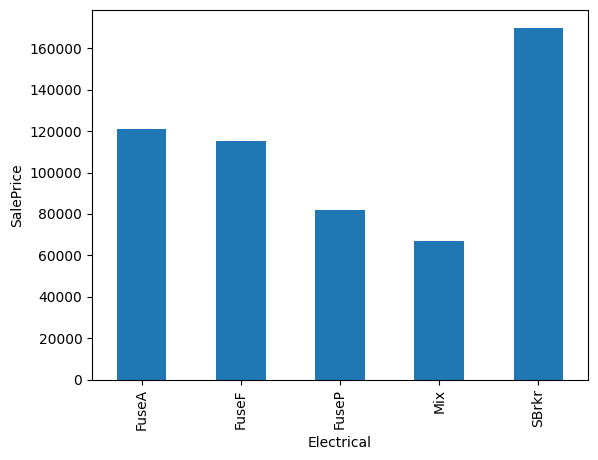

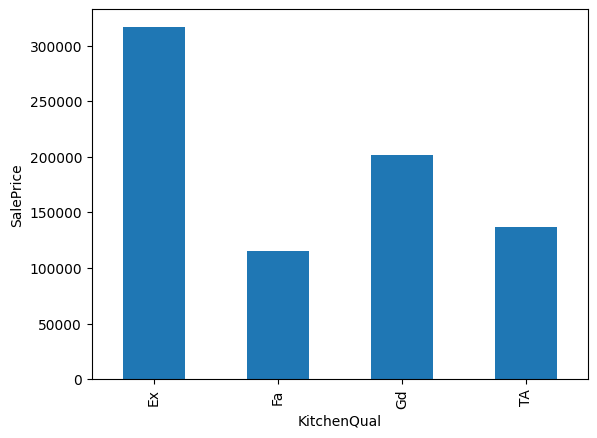

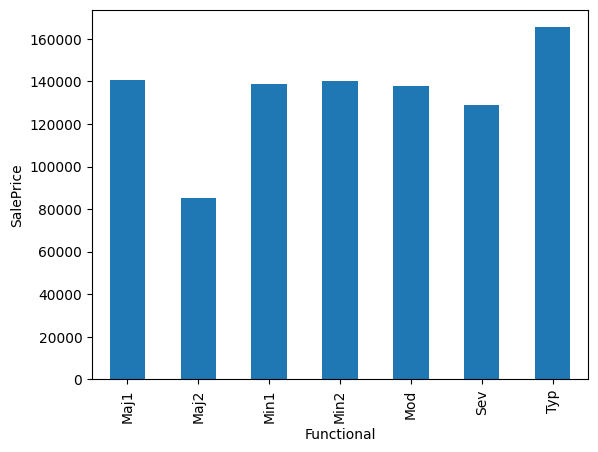

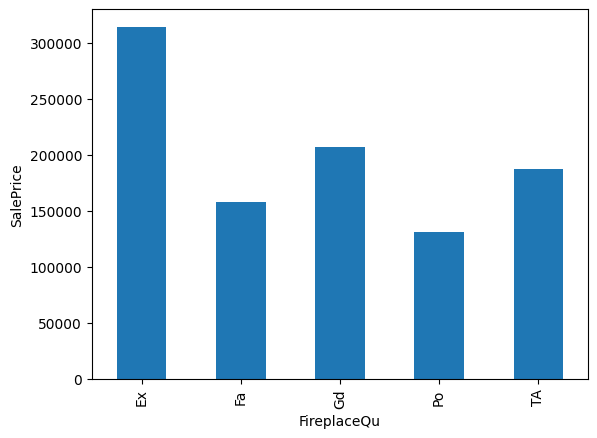

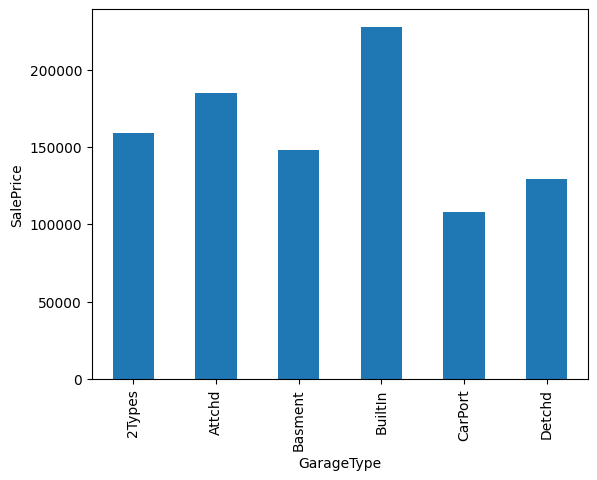

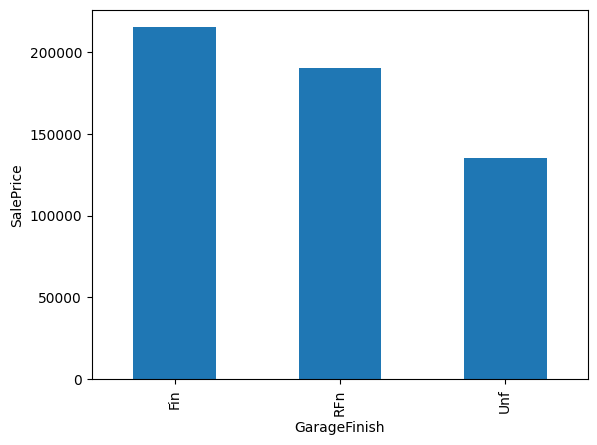

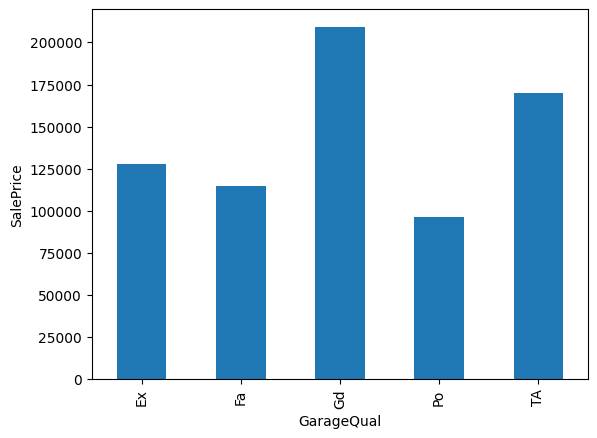

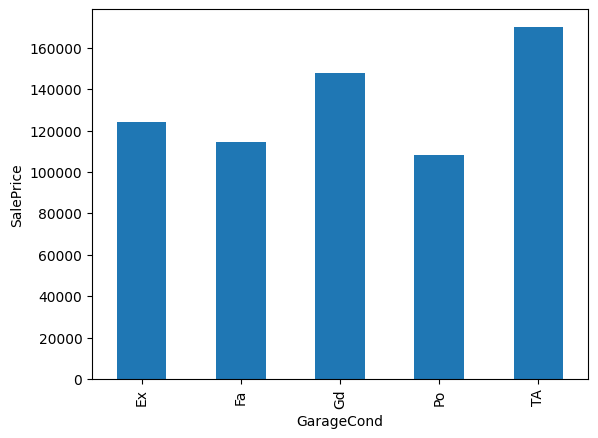

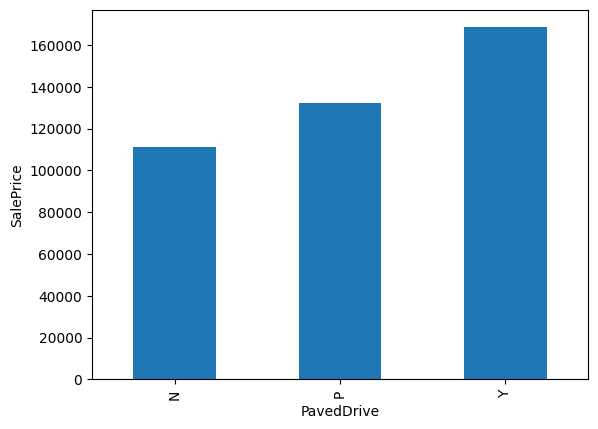

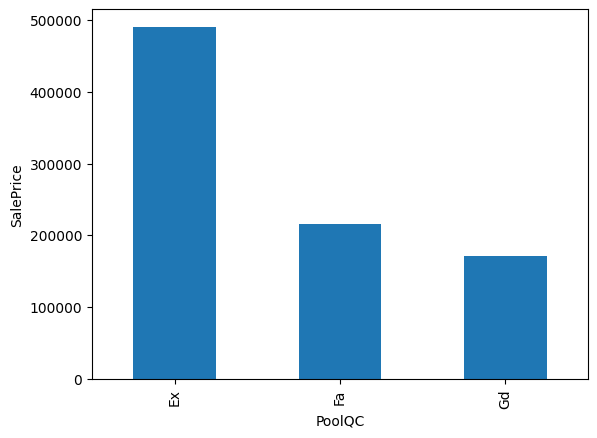

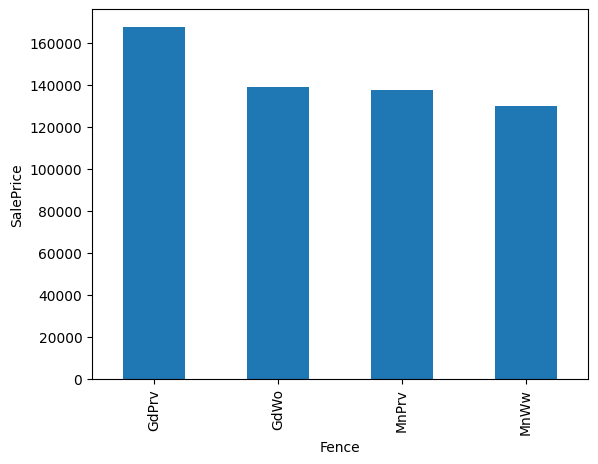

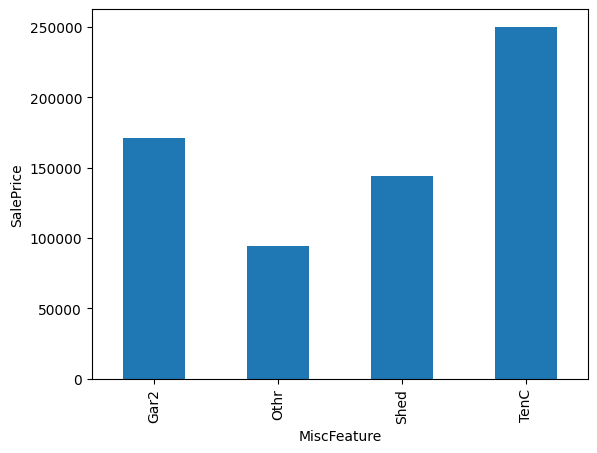

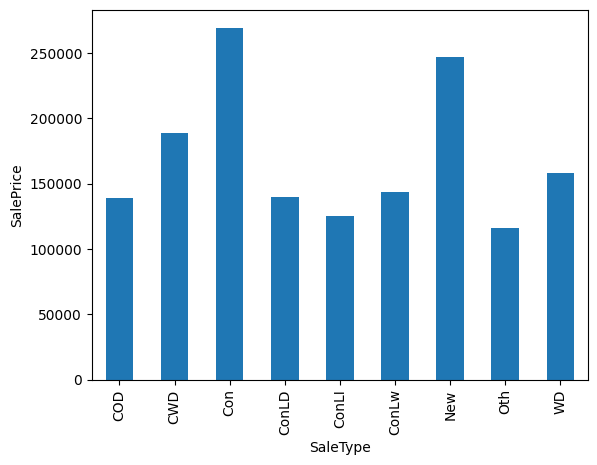

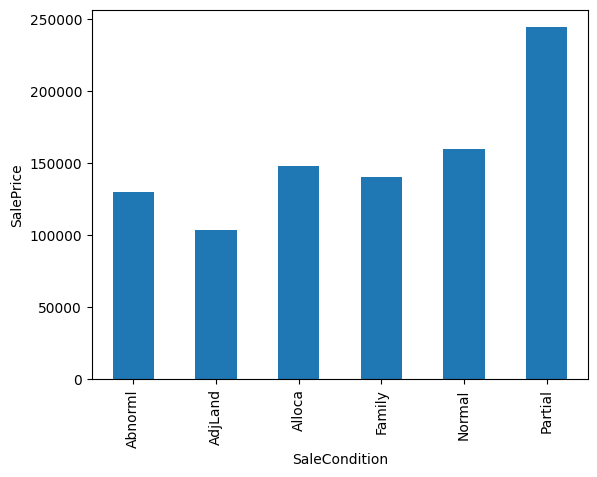

In [29]:
#Let's oberserve the relationship between these categorical features and SalePrice using barplots and boxplots.
for feature in categorical_features:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

**Observations: As you can see that categorical features have importance in SalePrice prediction of a house. Features such as Air Conditioning,Paved/Unpaved roads have an impact on SalePrice.**

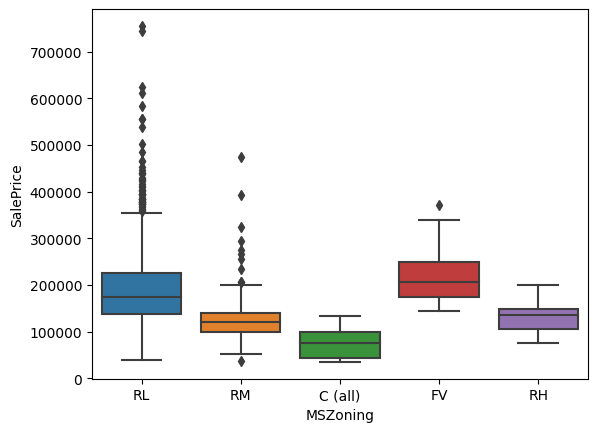

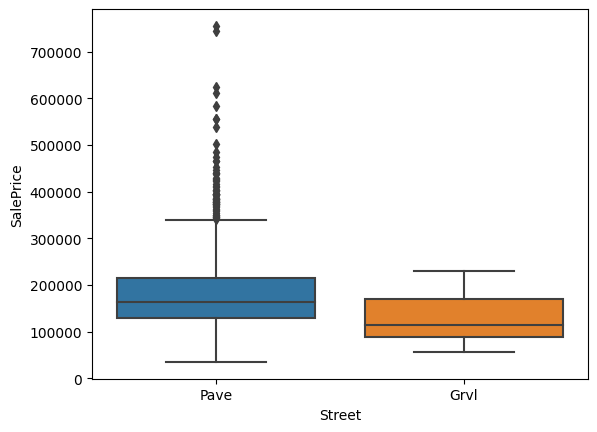

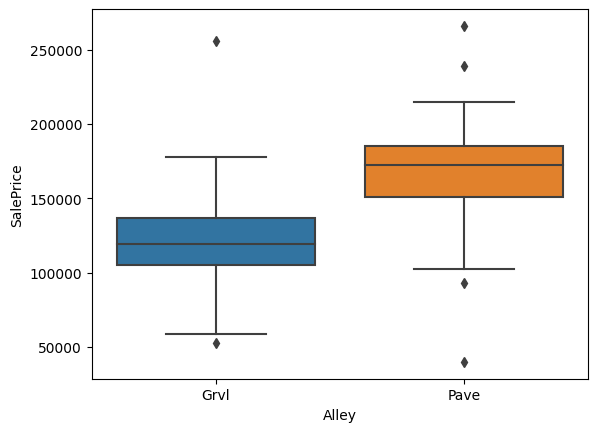

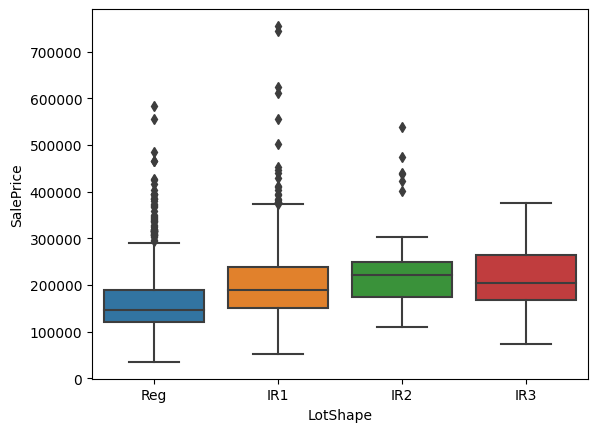

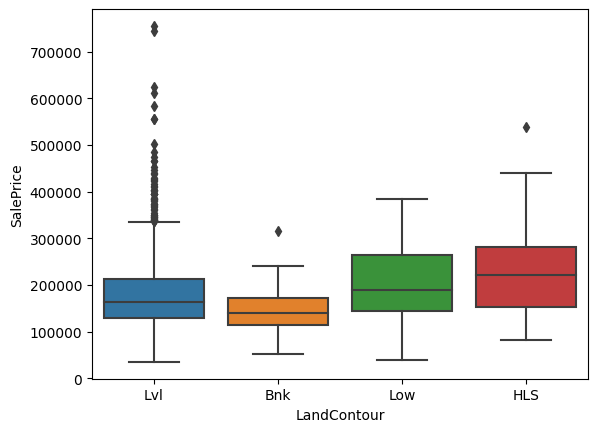

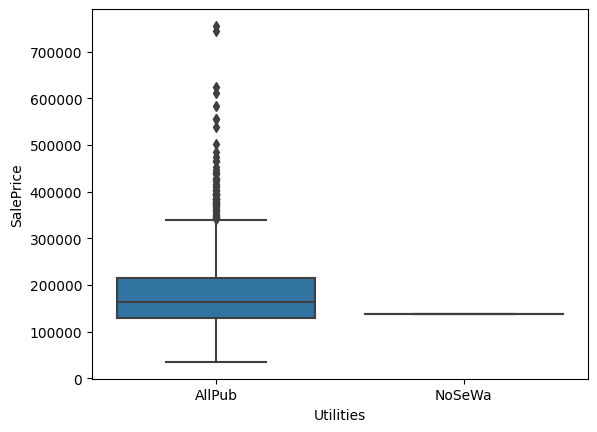

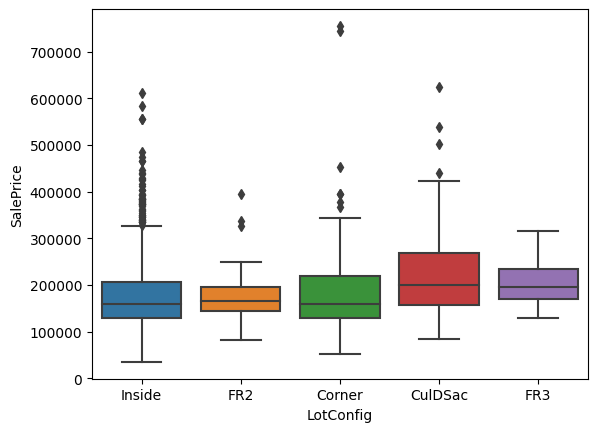

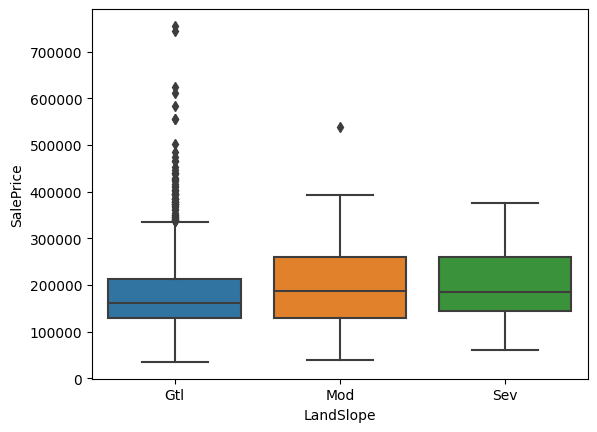

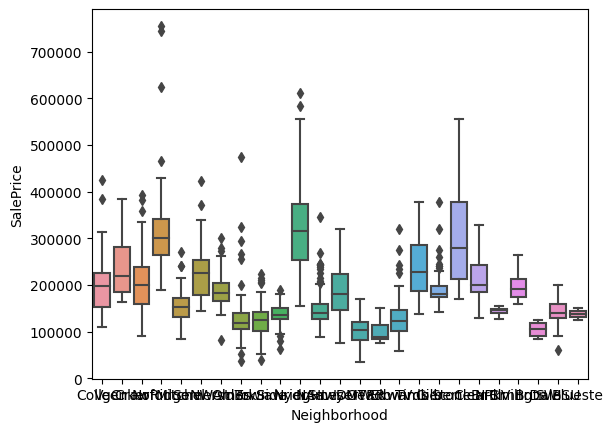

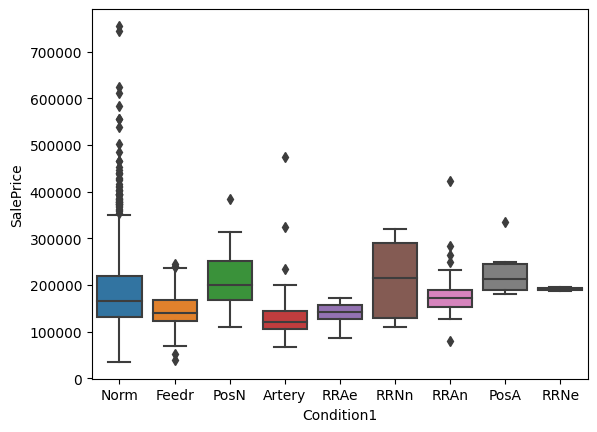

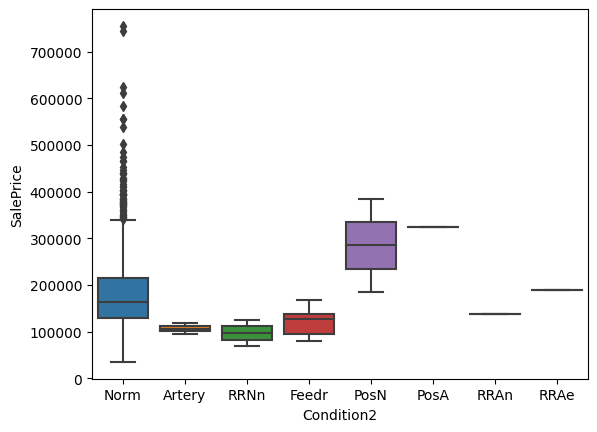

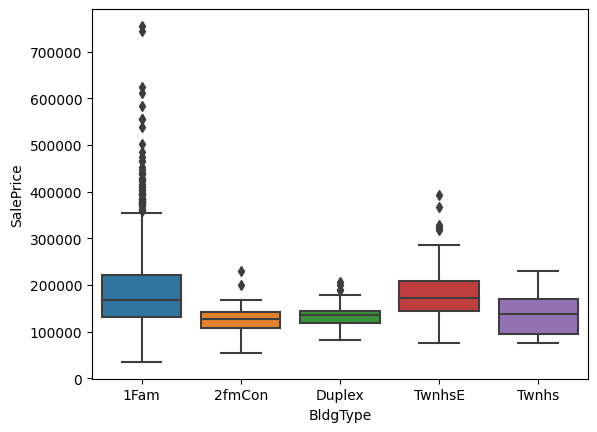

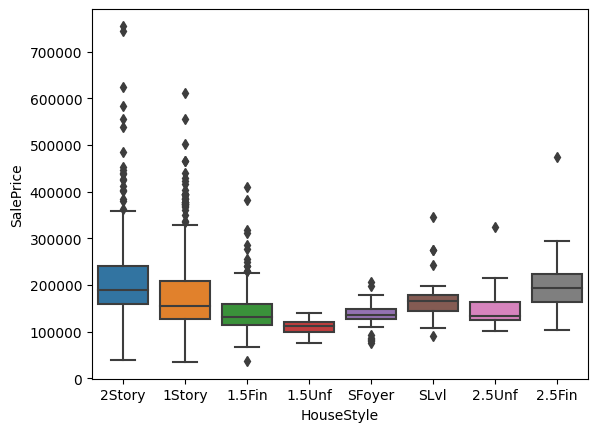

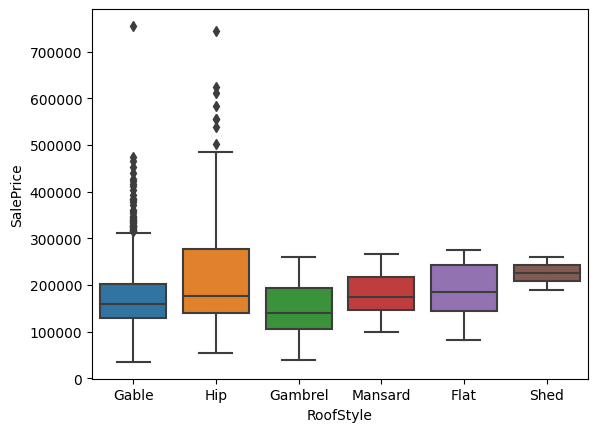

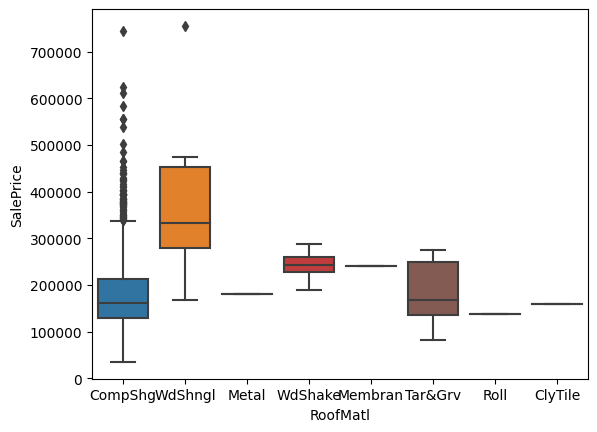

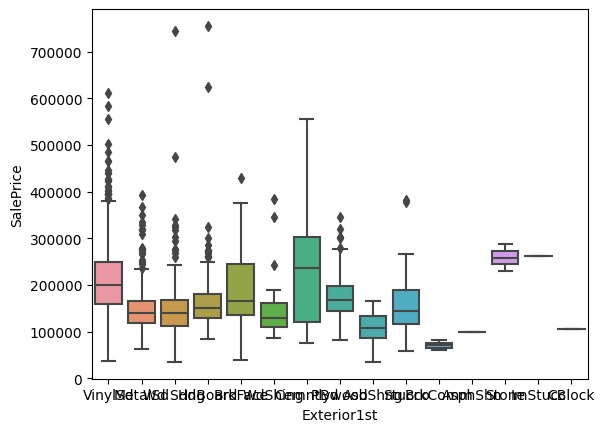

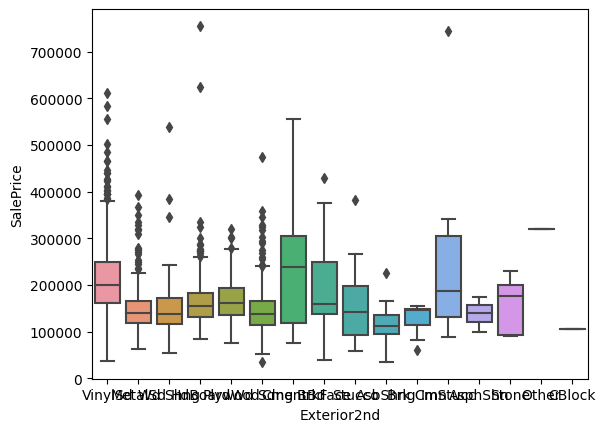

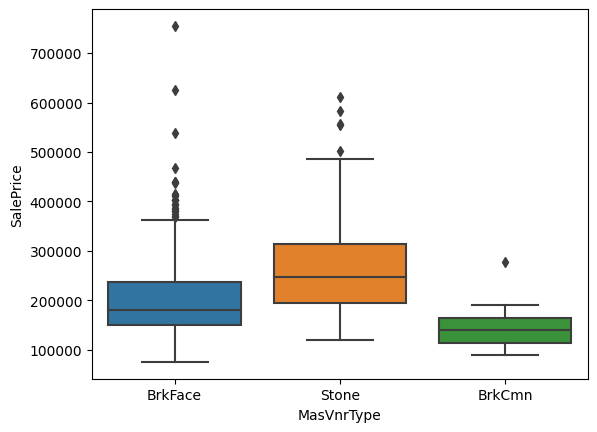

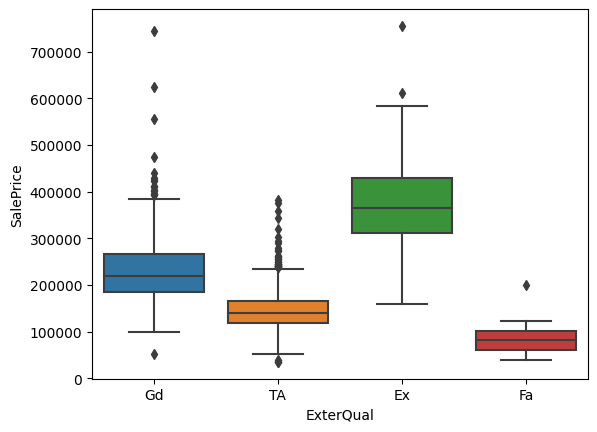

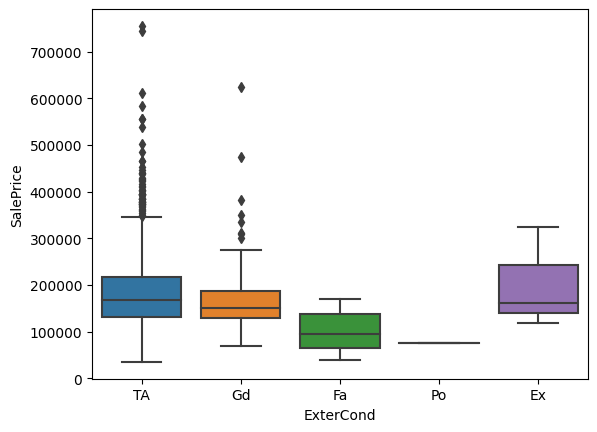

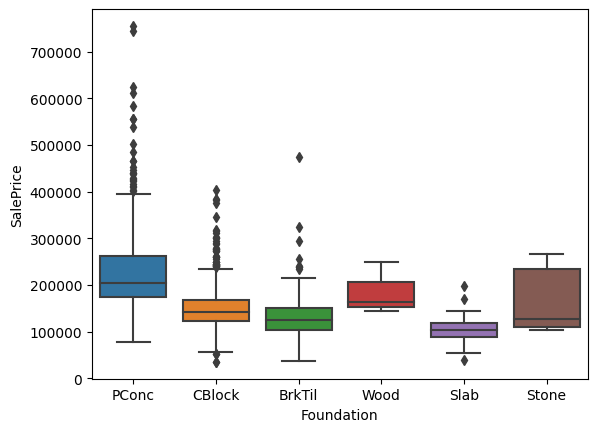

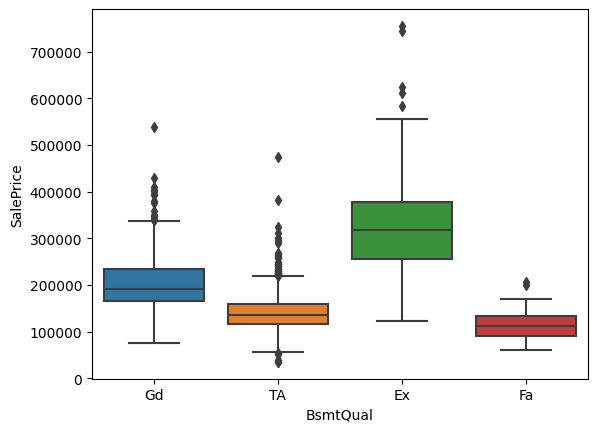

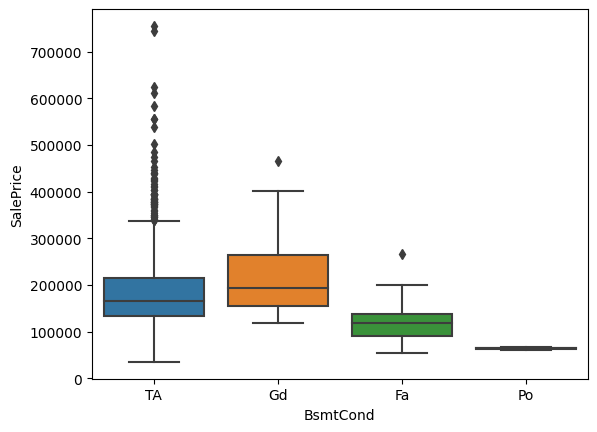

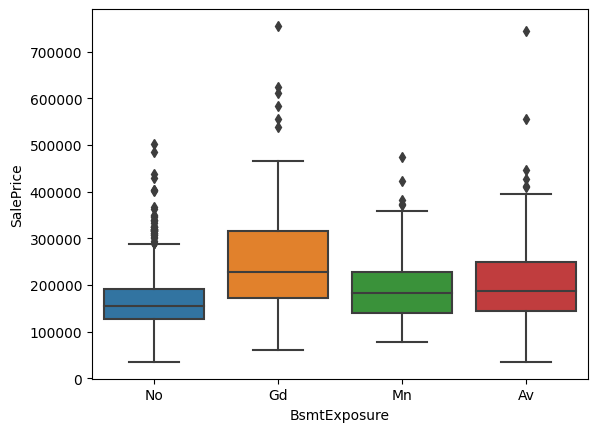

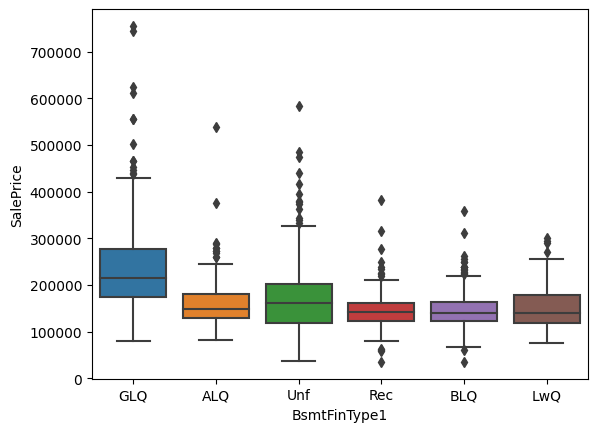

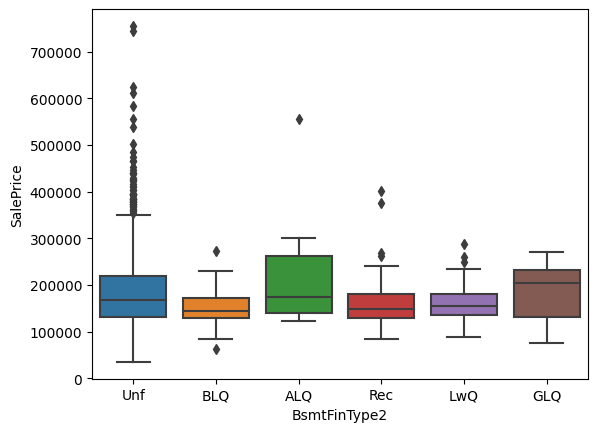

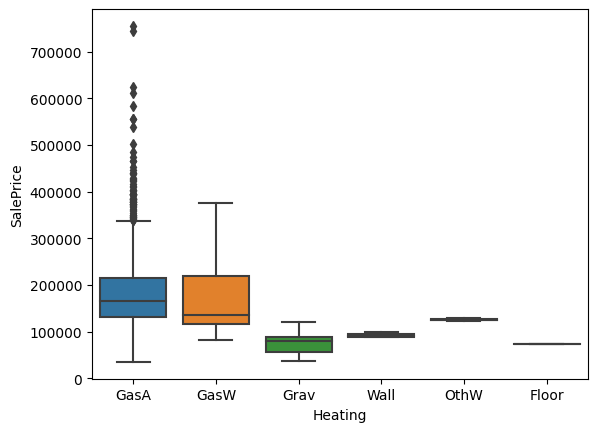

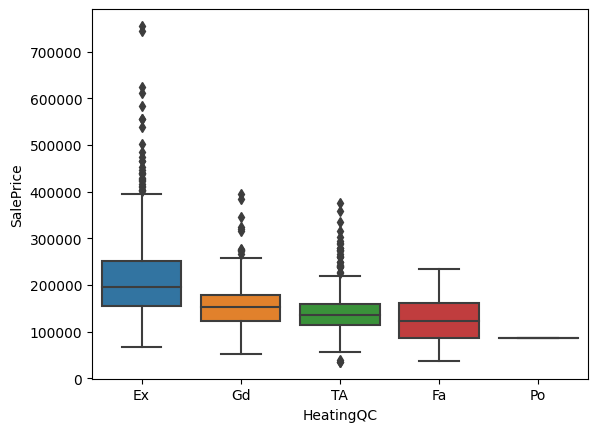

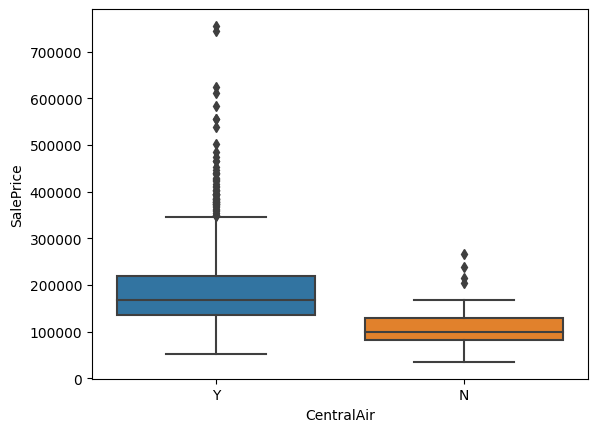

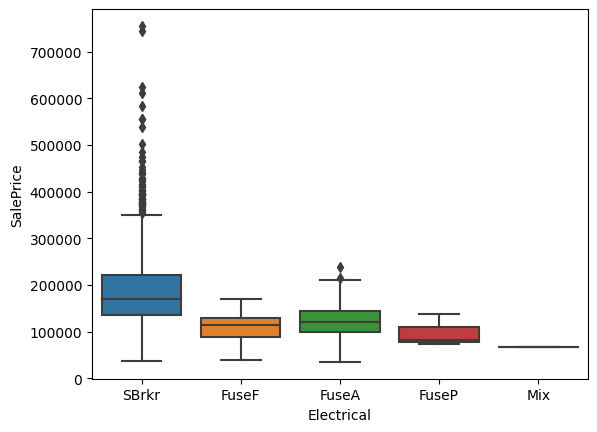

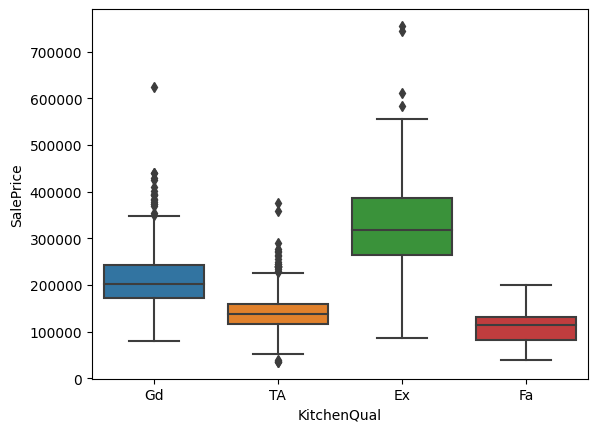

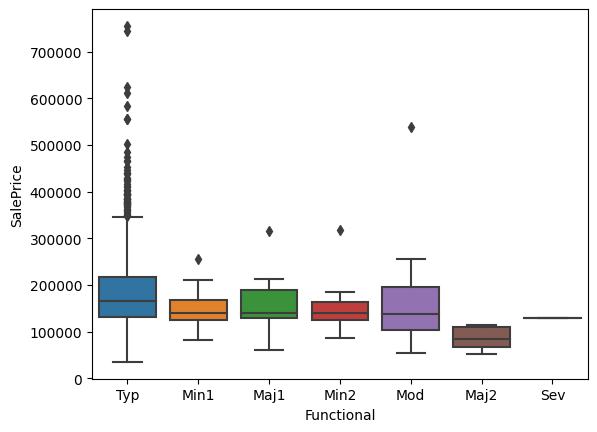

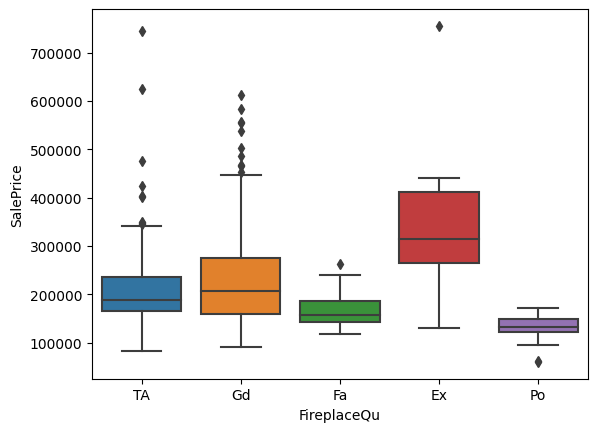

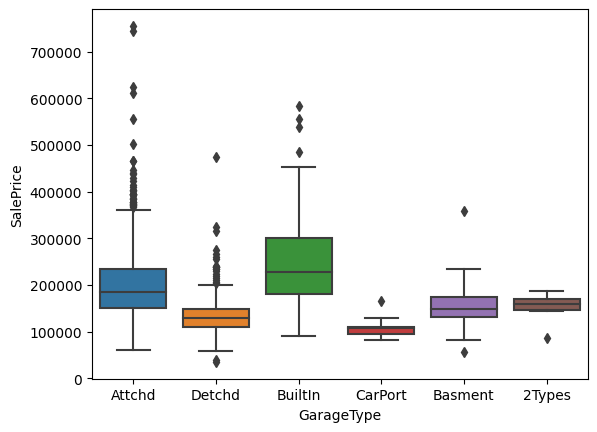

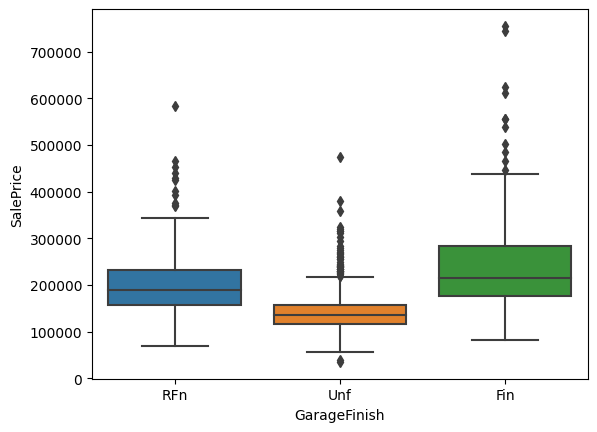

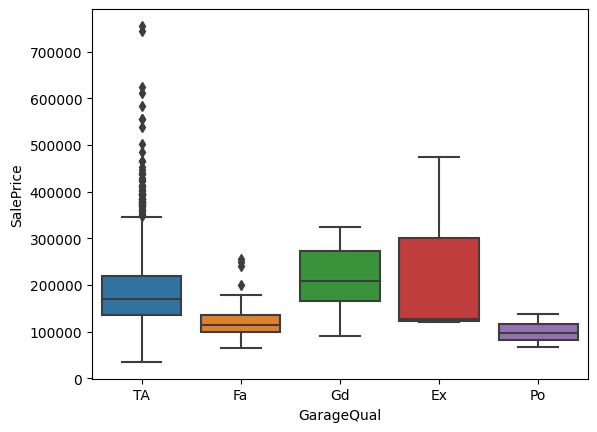

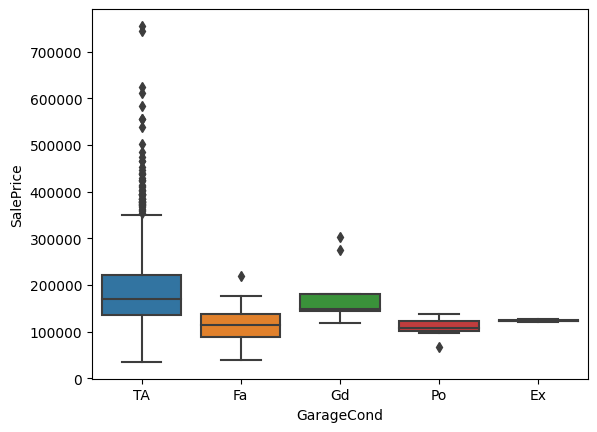

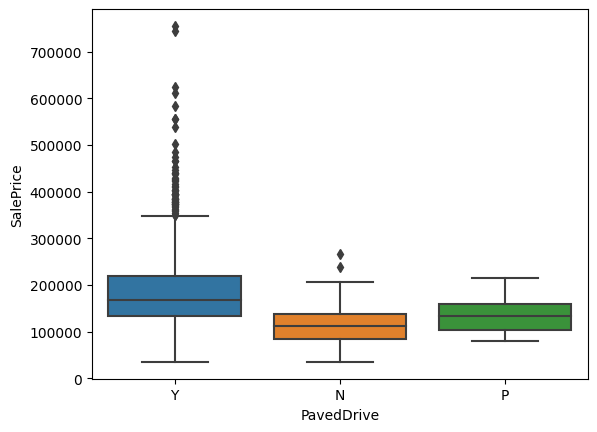

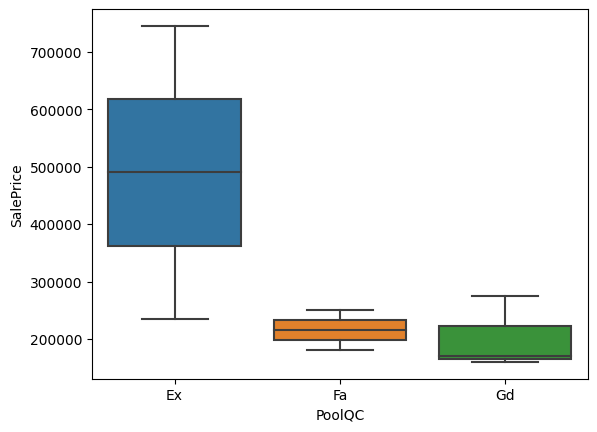

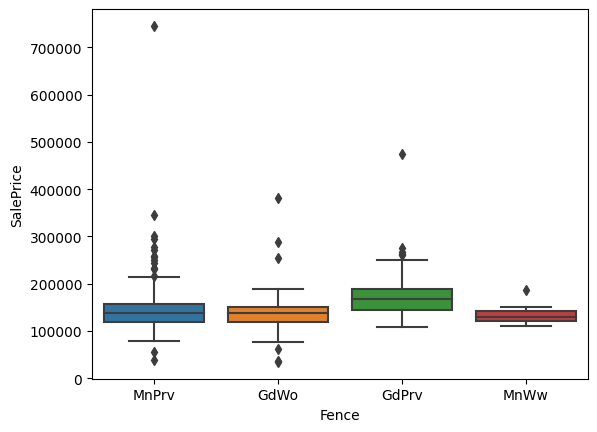

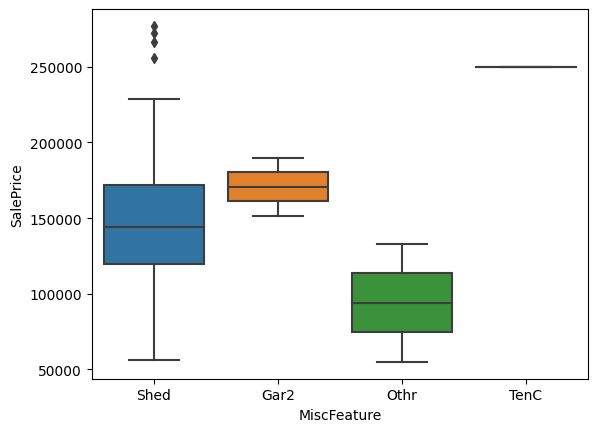

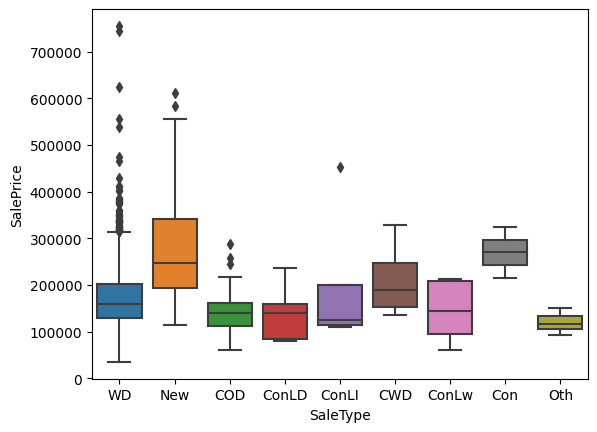

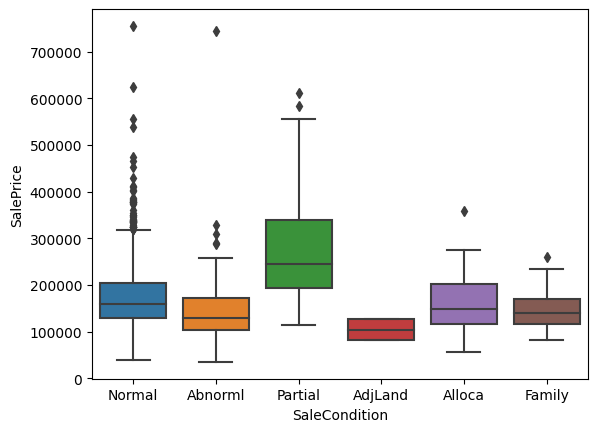

In [30]:
#Let's use boxplots for a better visualization.
for feature in categorical_features:
    sns.boxplot(x=feature,y='SalePrice',data=df_train)
    plt.xlabel(feature)
    plt.show()

### 4.3 Outliers

As we can see from the boxplots and histograms that we have a lot of outliers. We will be using some transformation techniques for numerical data and for categorical data we can replace them with the mode of that feature.

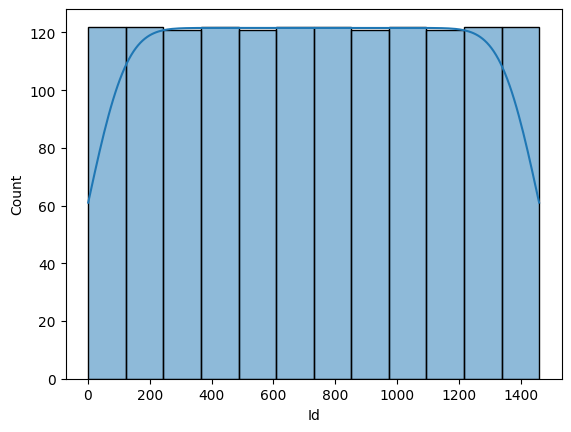

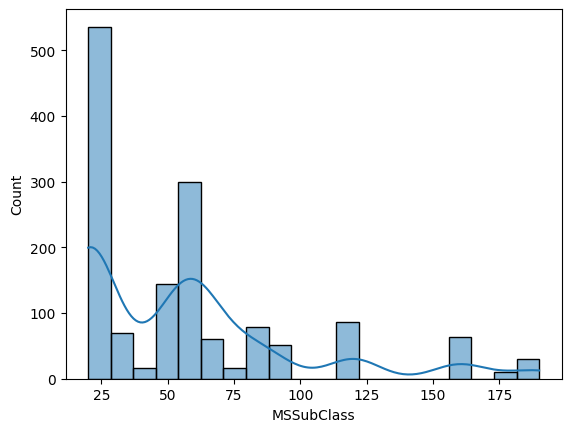

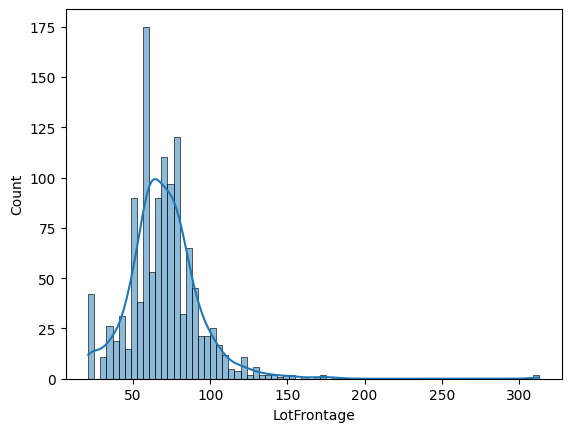

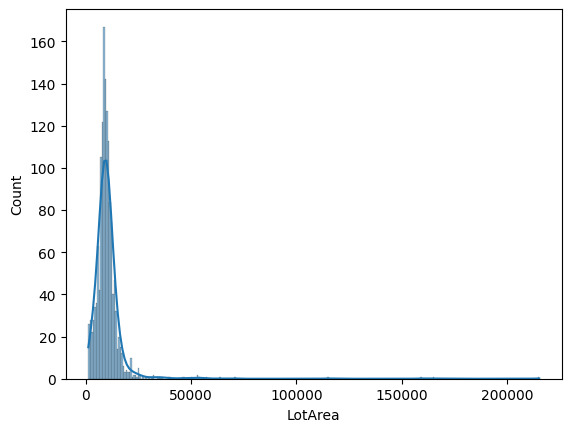

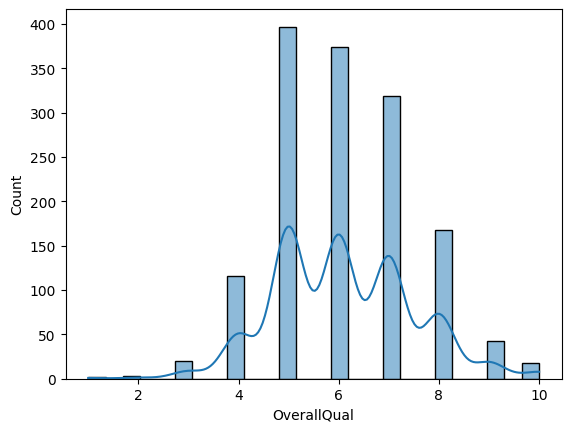

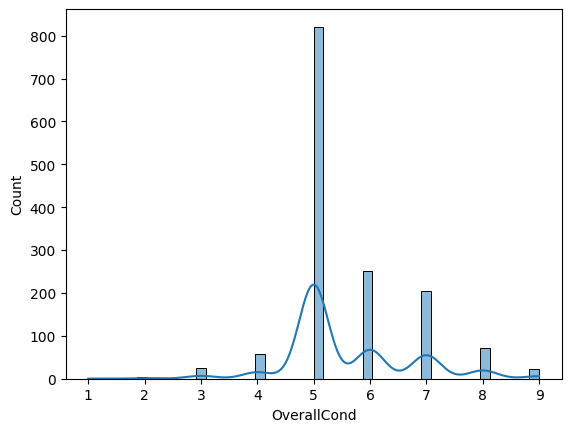

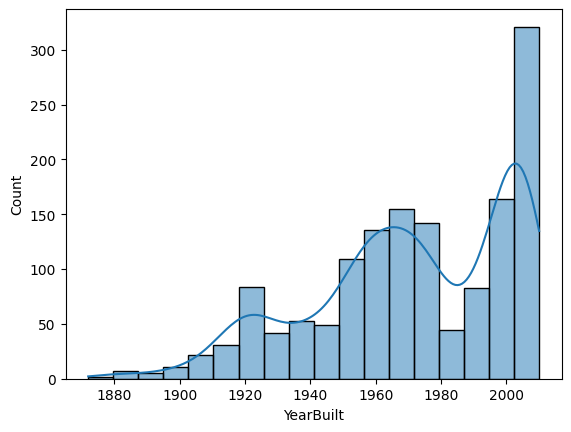

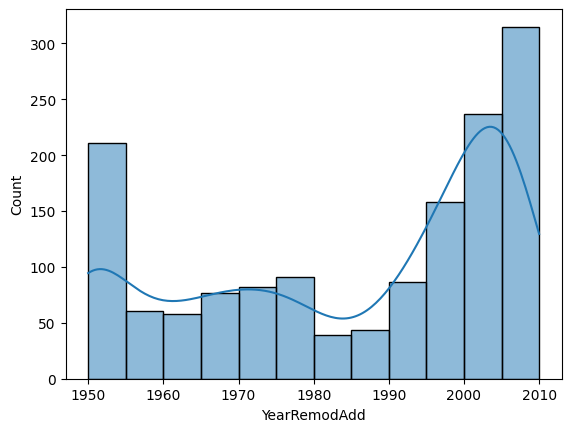

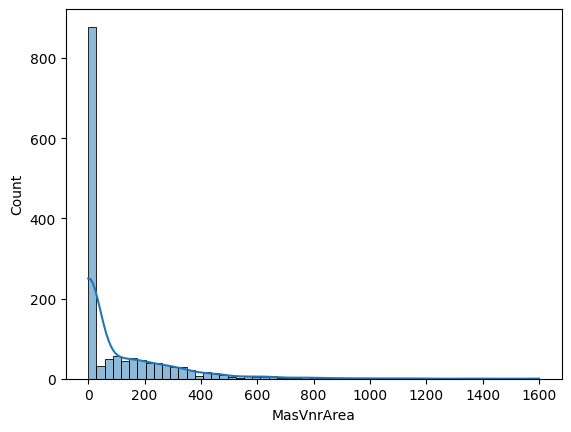

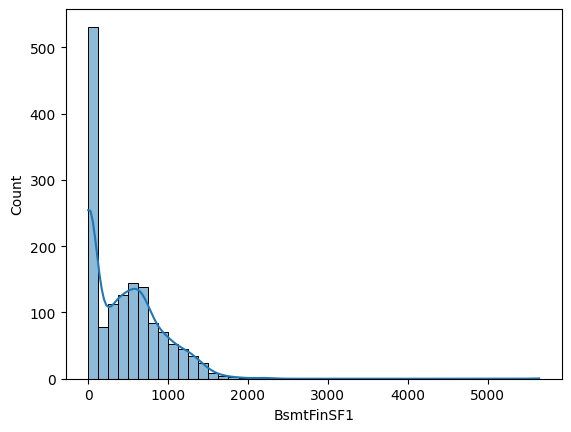

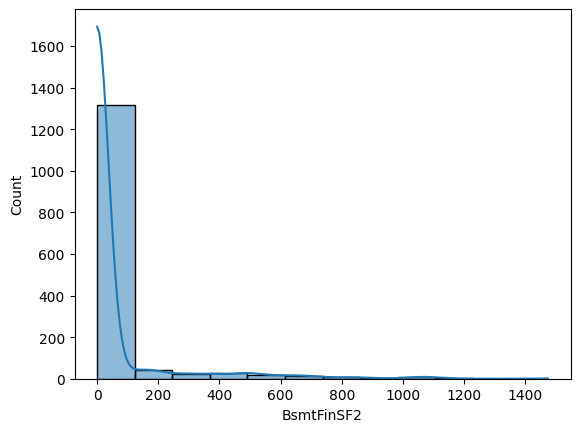

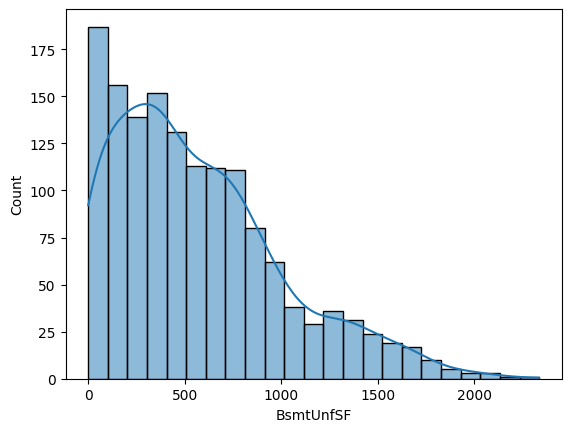

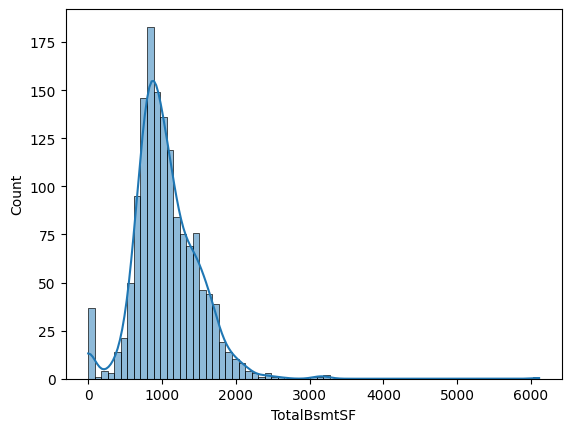

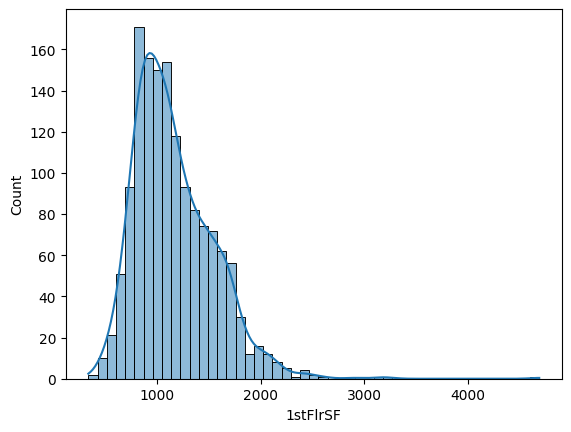

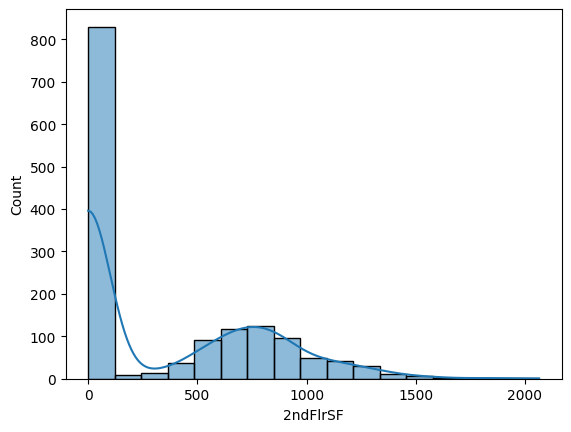

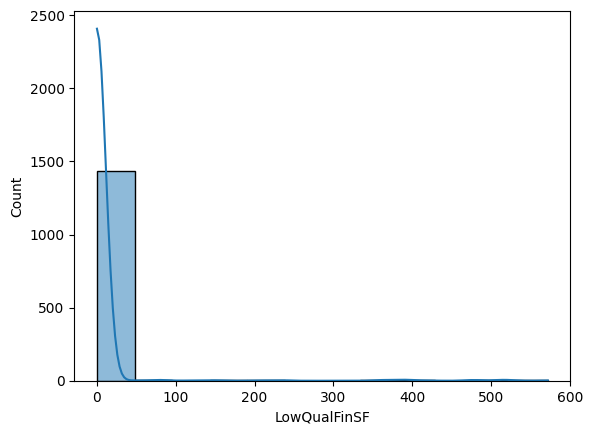

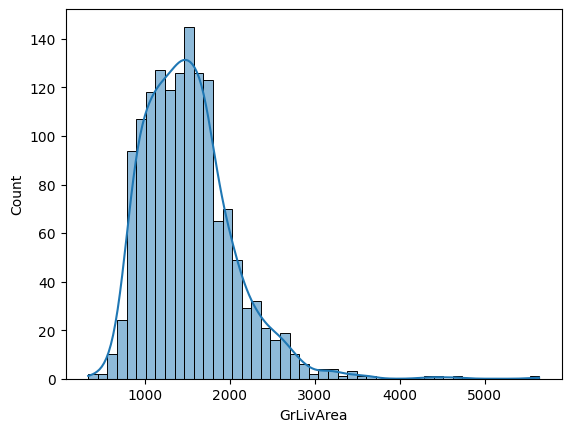

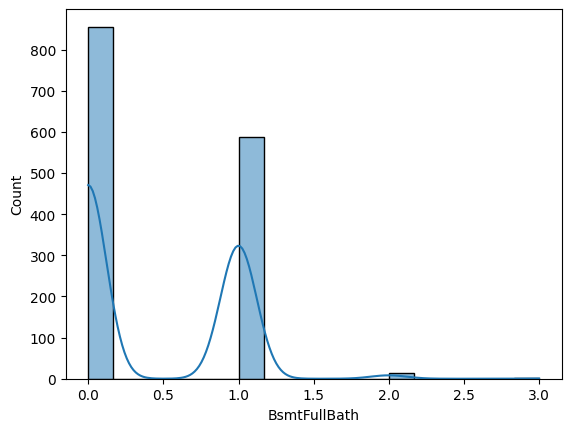

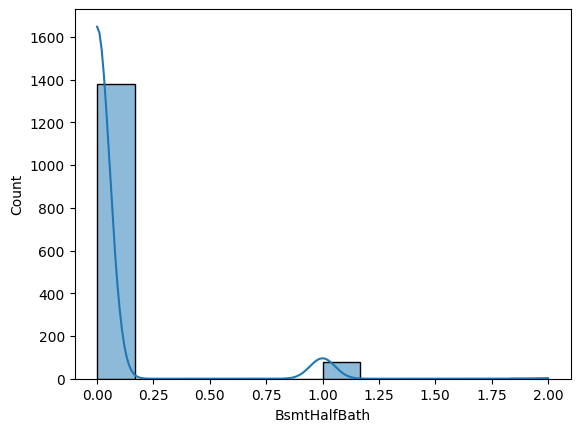

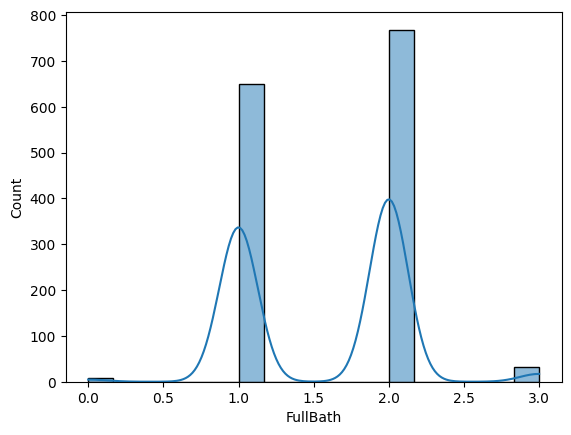

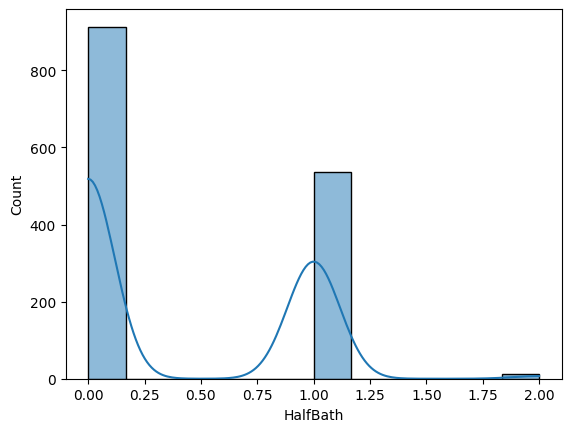

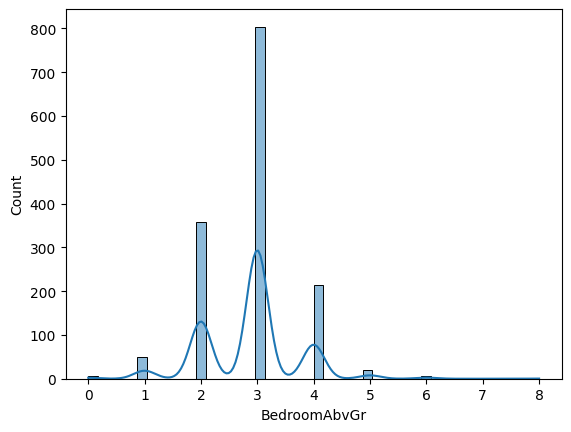

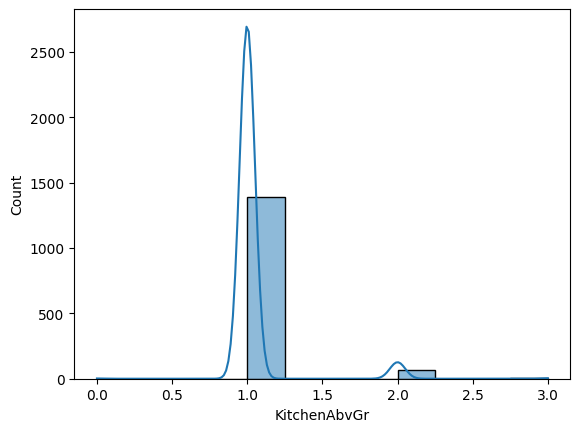

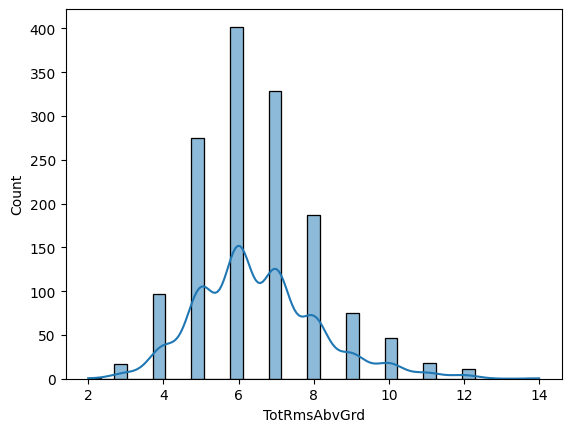

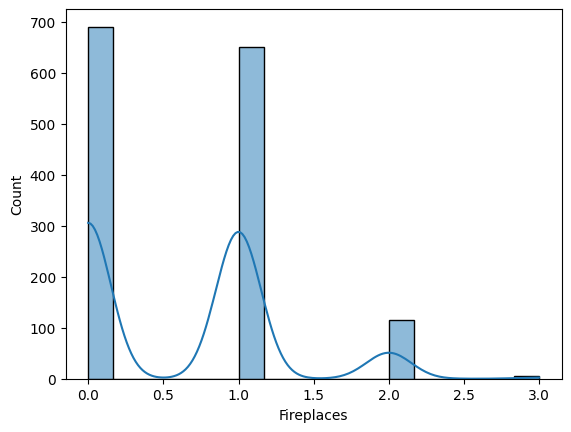

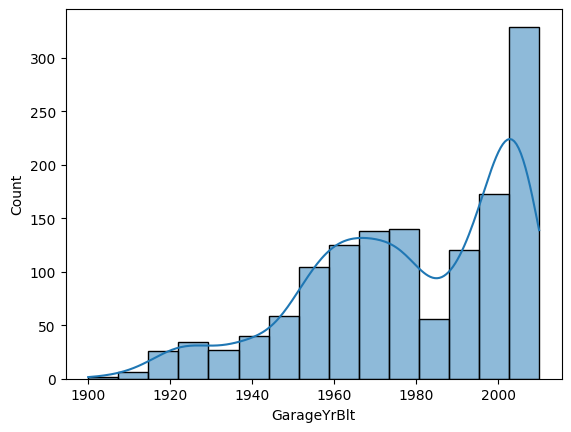

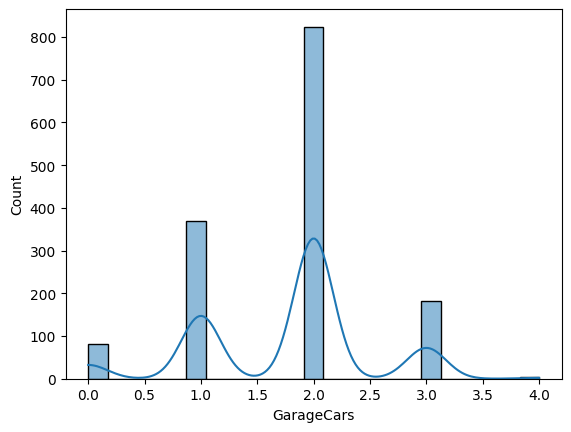

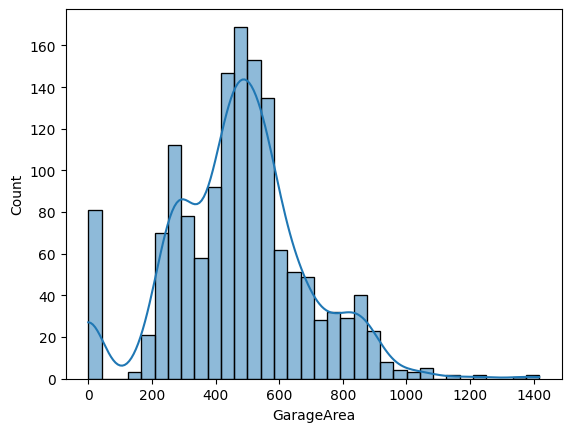

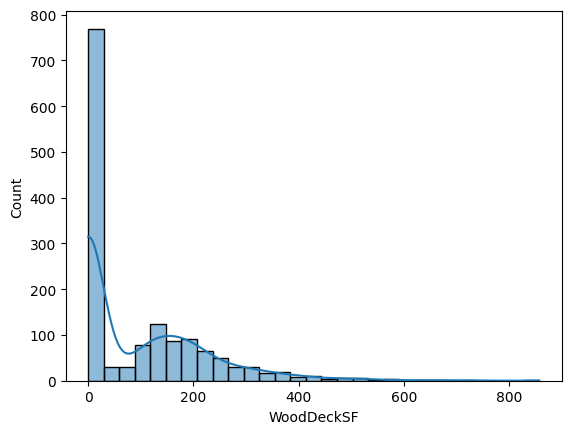

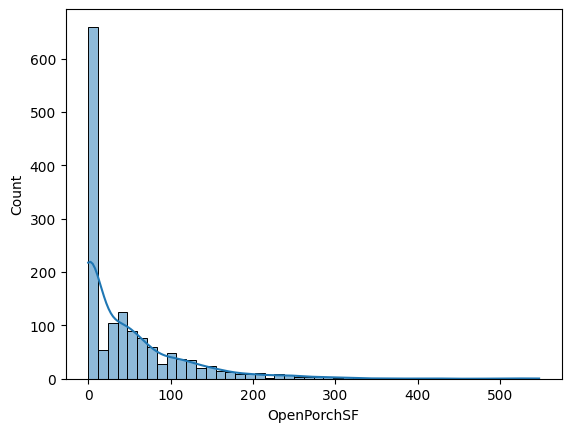

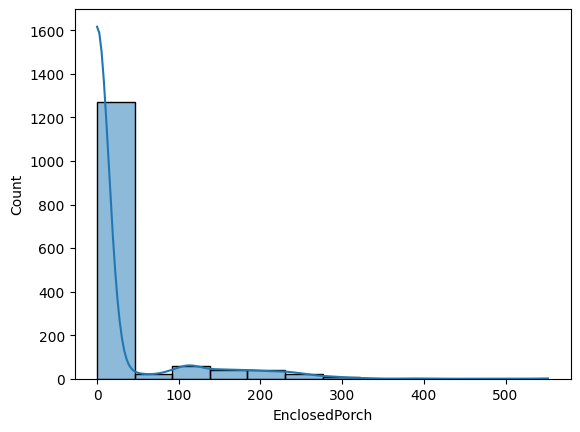

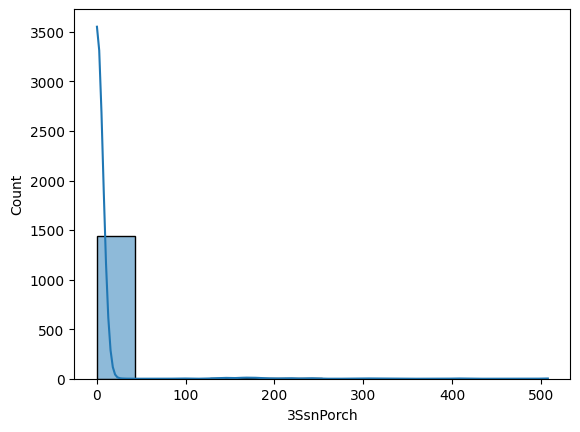

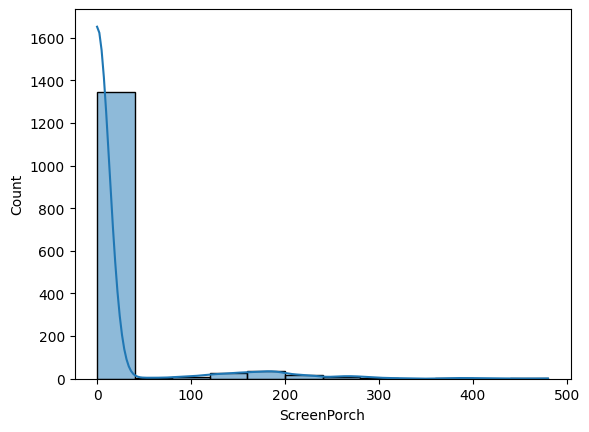

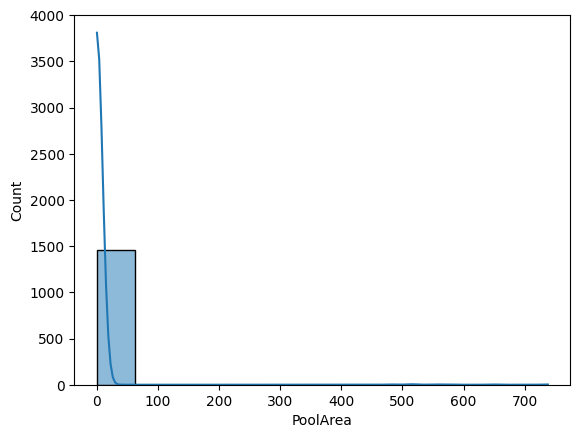

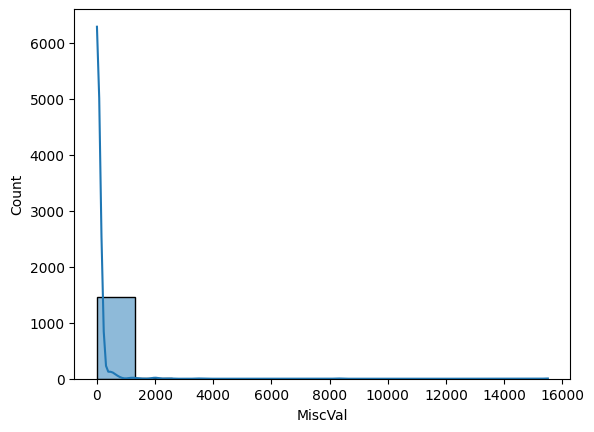

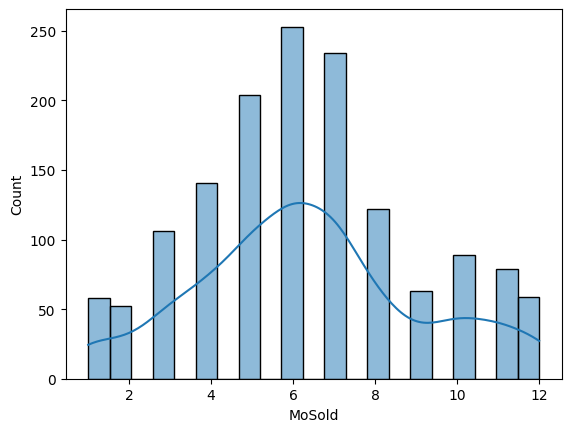

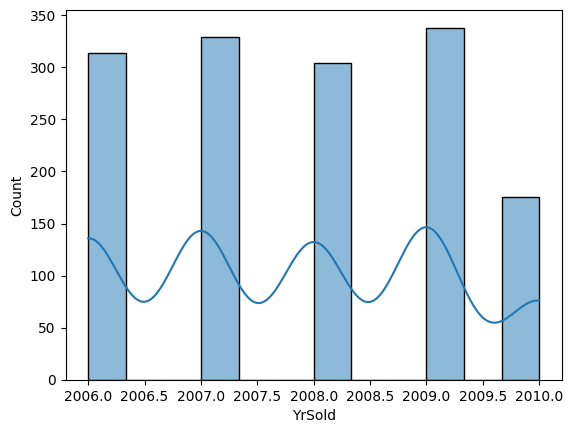

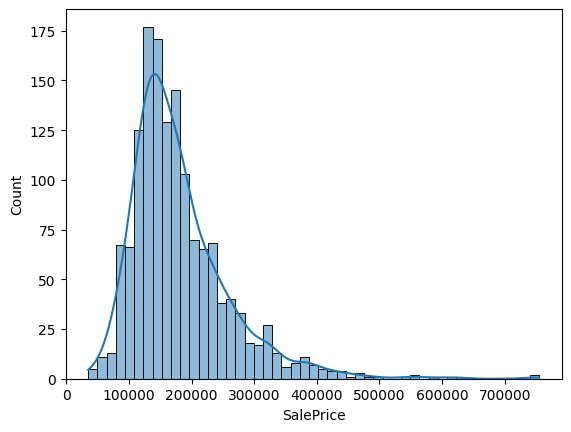

In [128]:
for feature in numerical_features:
    sns.histplot(df_train[feature],kde=True)
    plt.show()

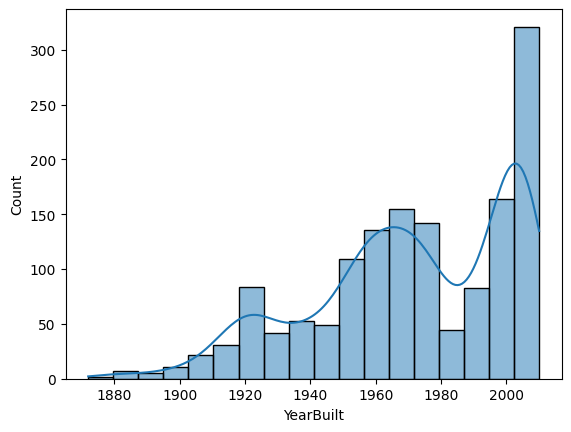

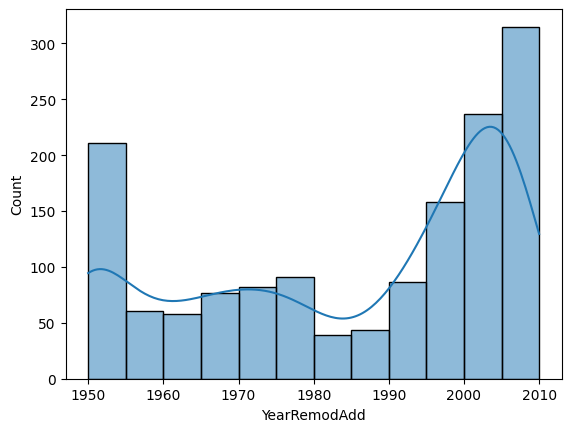

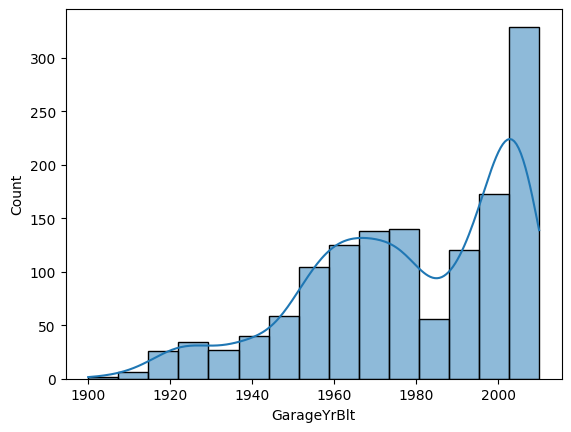

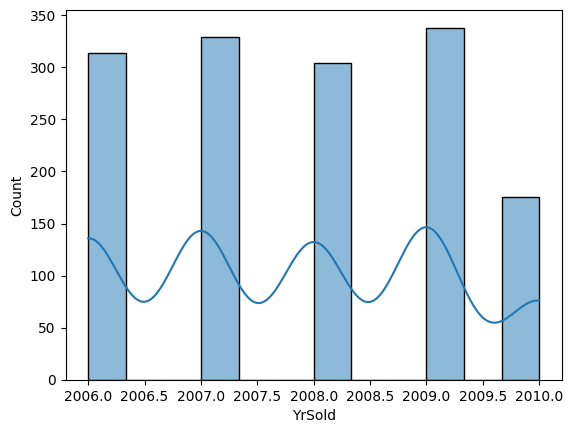

In [31]:
for feature in year_vars:
    sns.histplot(df_train[feature],kde=True)
    plt.show()

## 5. Feature Engineering

### 5.1 Handling Missing Values

In [32]:
#Let's see how we can deal with the missing values in categorical_features.
nan_cat_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']
for feature in nan_cat_features:
    print("{}: {}% missing values".format(feature,np.round(df_train[feature].isnull().mean()*100,2)))

Alley: 93.77% missing values
MasVnrType: 59.73% missing values
BsmtQual: 2.53% missing values
BsmtCond: 2.53% missing values
BsmtExposure: 2.6% missing values
BsmtFinType1: 2.53% missing values
BsmtFinType2: 2.6% missing values
FireplaceQu: 47.26% missing values
GarageType: 5.55% missing values
GarageFinish: 5.55% missing values
GarageQual: 5.55% missing values
GarageCond: 5.55% missing values
PoolQC: 99.52% missing values
Fence: 80.75% missing values
MiscFeature: 96.3% missing values


There are 2 ways by which we can handle missing values in categorical features.

**1. Frequent Catergory Imputation** - In this method we simply replace the NaN values with the most frequent category present in the feature. For example in the feature 'Alley', we can simply replace nan values with 'Paved' since it's the most dominant category present in that feature. This method is easy to implement and is fast however if there are many NaN values,the most frequent labels are going to be represented more often and also lead to some distortion between variables.We will be using this technique since it is much faster.

**2. Adding a feature to catch NaN** - In this method we add new features for those features having NaN values and replace the data with 1 where we encounter missing value and 0 where there's no missing value. Later on we can drop the original features which are having NaN values during feature selection. An alternate technique is to replace all the missing values with the label 'Missing' This will therefore create a new category within the feature.

In [33]:
#Since features such as 'Alley','PoolQc','Fence','MiscFeature' are having more than 80% of the missing values.We will simply drop them.
df_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [34]:
#Let's create a function which impute missing values in every categorical feature with the most frequent category in that feature.
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [35]:
nan_cat_features_new = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [36]:
for feature in nan_cat_features_new:
    impute_nan(df_train,feature)

In [37]:
df_train[nan_cat_features_new].isnull().sum() # Now there's no missing data in categorical features.

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [38]:
#Similarly for the test dataset.
nan_cat_features = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes=='O']
for feature in nan_cat_features:
    print('{}: {}% missing values'.format(feature,np.round(df_test[feature].isnull().mean()*100,2)))

MSZoning: 0.27% missing values
Alley: 92.67% missing values
Utilities: 0.14% missing values
MasVnrType: 61.27% missing values
BsmtQual: 3.02% missing values
BsmtCond: 3.08% missing values
BsmtExposure: 3.02% missing values
BsmtFinType1: 2.88% missing values
BsmtFinType2: 2.88% missing values
Functional: 0.14% missing values
FireplaceQu: 50.03% missing values
GarageType: 5.21% missing values
GarageFinish: 5.35% missing values
GarageQual: 5.35% missing values
GarageCond: 5.35% missing values
PoolQC: 99.79% missing values
Fence: 80.12% missing values
MiscFeature: 96.5% missing values


In [39]:
df_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [40]:
nan_cat_features_new = ['MSZoning','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [41]:
def impute_test_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [42]:
for feature in nan_cat_features_new:
    impute_test_nan(df_test,feature)

In [43]:
df_test[nan_cat_features_new].isnull().sum()

MSZoning        0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [44]:
#Let's see how we can deal with missing values in numerical features.
nan_num_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']
for feature in nan_num_features:
    print('{}: {}% missing values'.format(feature,np.round(df_train[feature].isnull().mean()*100,2)))

LotFrontage: 17.74% missing values
MasVnrArea: 0.55% missing values
GarageYrBlt: 5.55% missing values


There are 5 ways in which we can handle missing values in numerical features.

**1. Mean/Median/Mode Imputation**  
**2. Random Sample Imputation**  
**3. Capturing NaN values with a new feature**  
**4. End of Distribution Imputation**  
**5. Arbitrary Value Imputation**  

We'll be using Median imputation since our dataset contains quite a lot of outliers.

In [45]:
for feature in nan_num_features:
    median = df_train[feature].median()
    df_train[feature].fillna(median,inplace=True)

In [46]:
df_train[nan_num_features].isnull().sum() #Now there's no NaN values.

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [47]:
#Similarly for the test dataset.
nan_num_features = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='O']
for feature in nan_num_features:
    print('{}: {}% missing values'.format(feature,np.round(df_test[feature].isnull().mean()*100,2)))

LotFrontage: 15.56% missing values
MasVnrArea: 1.03% missing values
BsmtFullBath: 0.14% missing values
BsmtHalfBath: 0.14% missing values
GarageYrBlt: 5.35% missing values


In [49]:
for feature in nan_num_features:
    median = df_test[feature].median()
    df_test[feature].fillna(median,inplace=True)
df_test[nan_num_features].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [50]:
#Let's deal with missing values for DateTime variables.
#Here we will convert the datetime variables into how many years old which will prove to more valuable.
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df_train[feature] = df_train['YrSold']-df_train[feature]

In [51]:
df_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [52]:
#Similarly for test dataset.
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df_test[feature] = df_test['YrSold']-df_test[feature]

In [53]:
df_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         49            49         49.0
1         52            52         52.0
2         13            12         13.0
3         12            12         12.0
4         18            18         18.0

### 5.2 Feature Transformation

In [54]:
#Ok so let's use a Q-Q plot to check whether our numerical features are gaussian distributed.
import pylab
import scipy.stats as stat

def plot_data(dataset,features):
    for feature in features:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        dataset[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(dataset[feature],dist='norm',plot=pylab)
        plt.title(feature)
        plt.show()

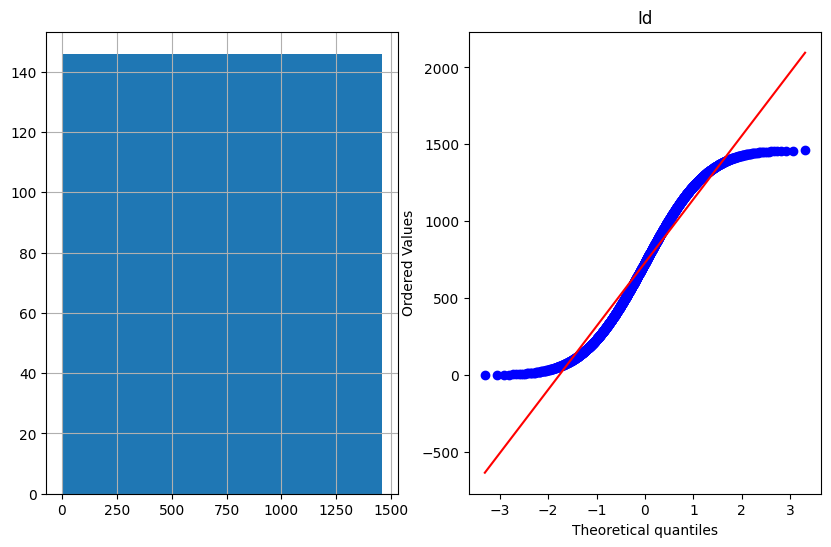

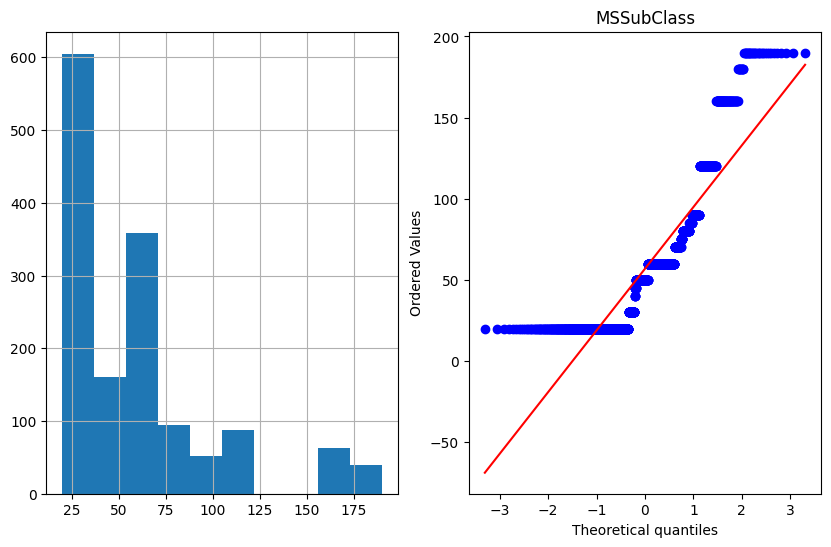

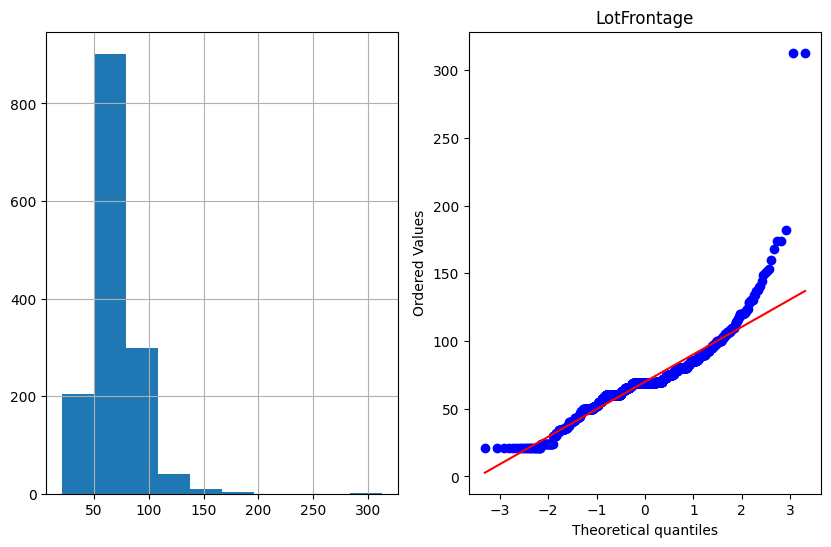

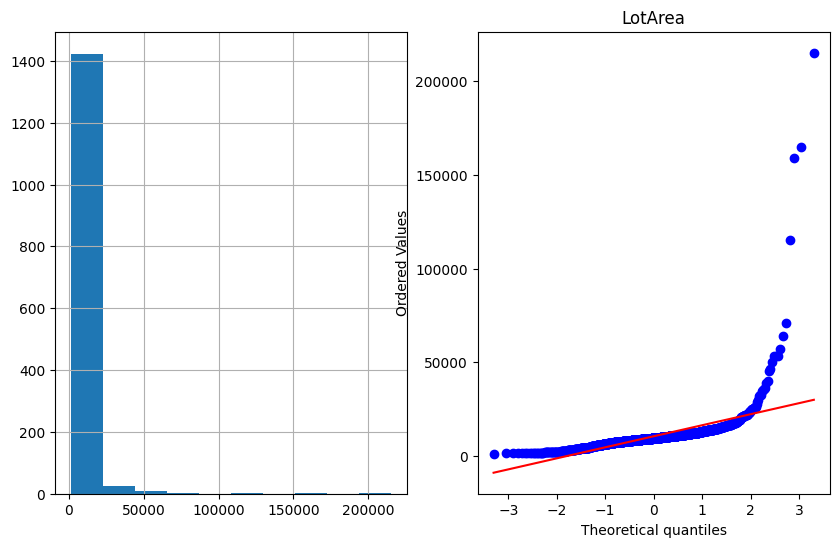

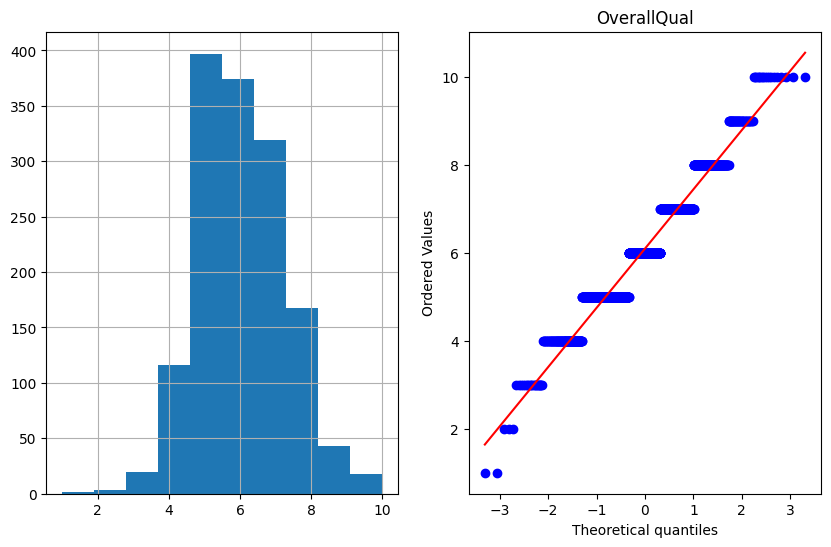

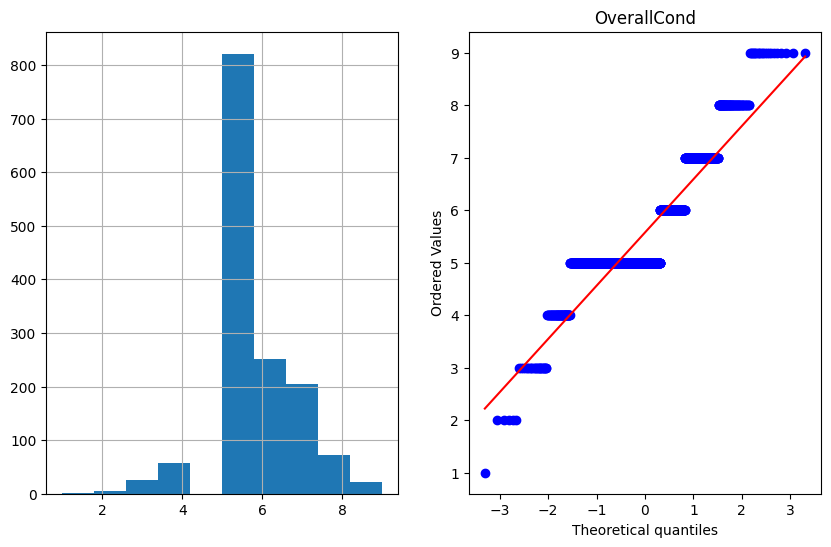

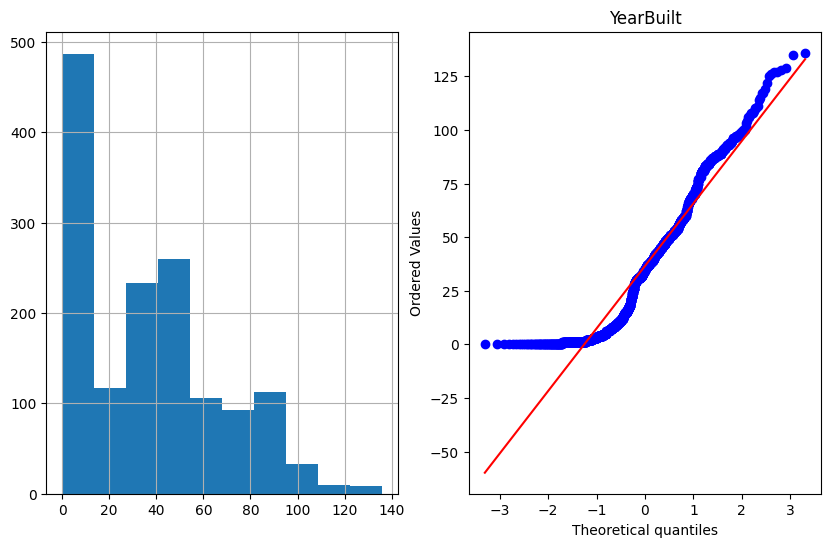

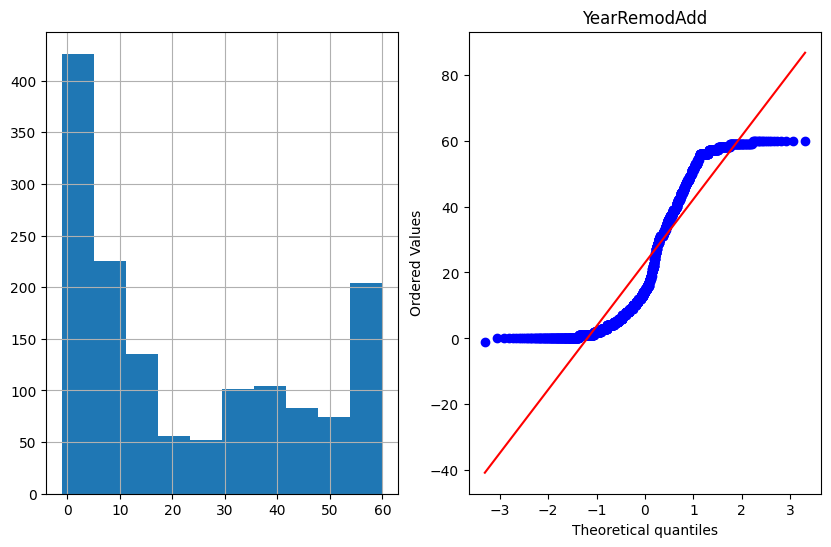

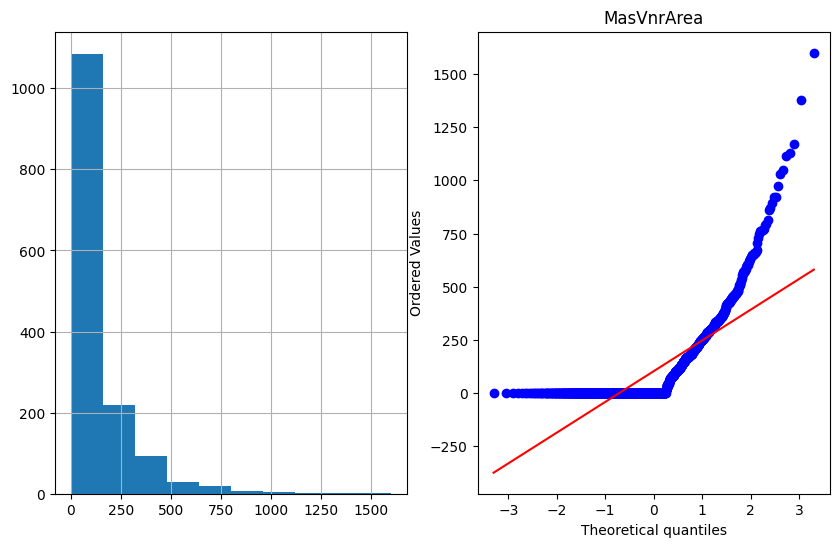

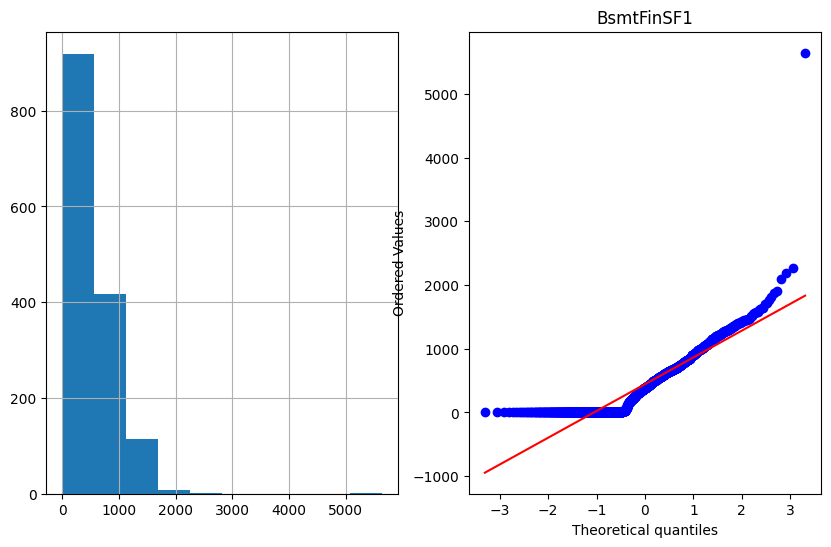

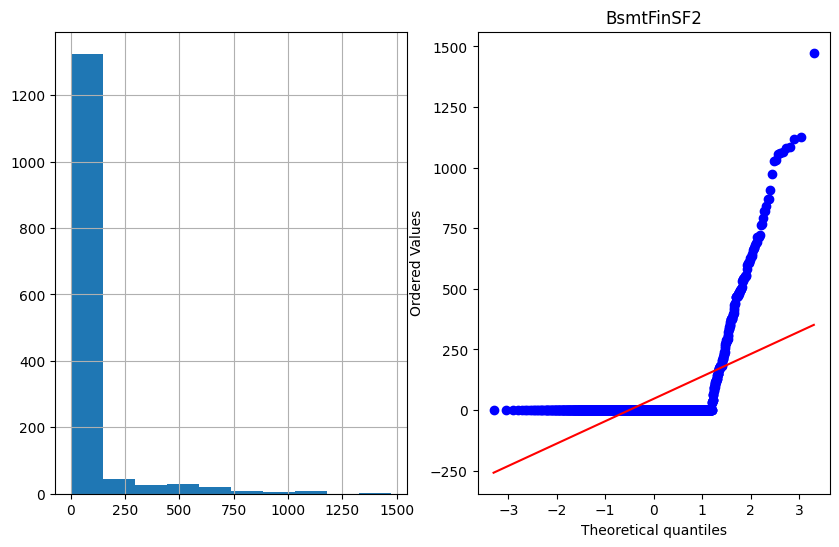

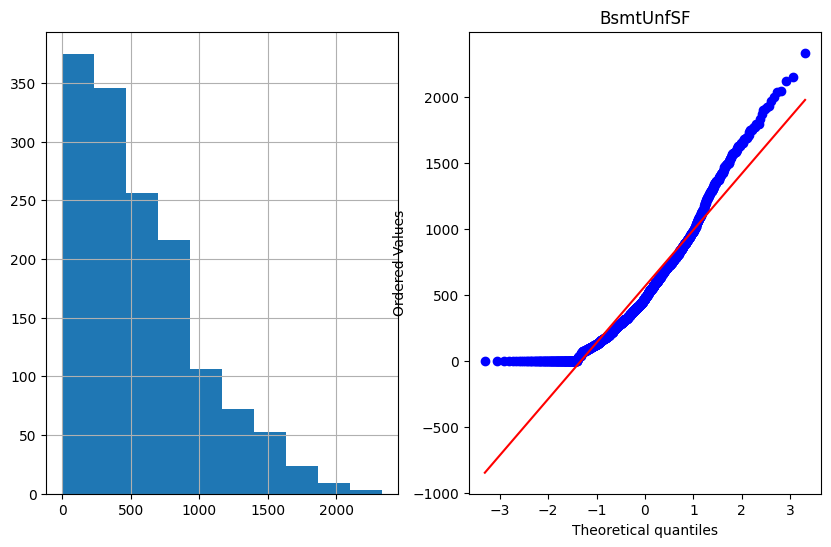

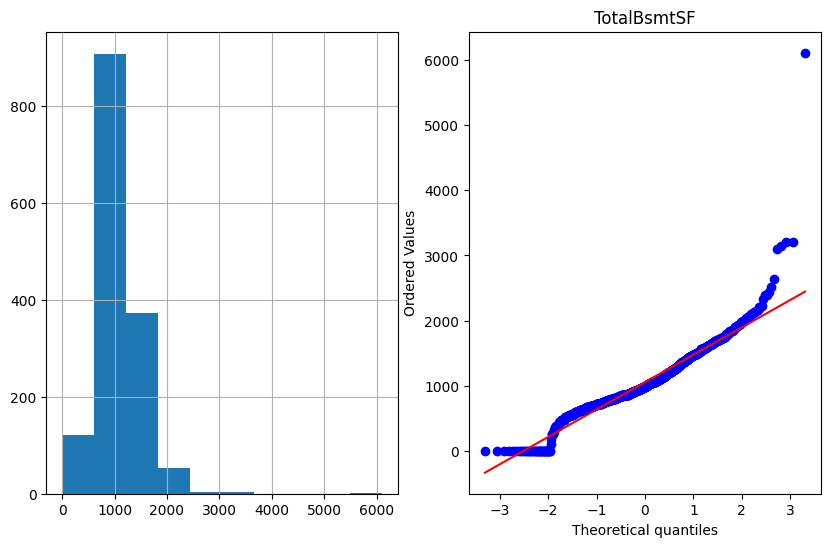

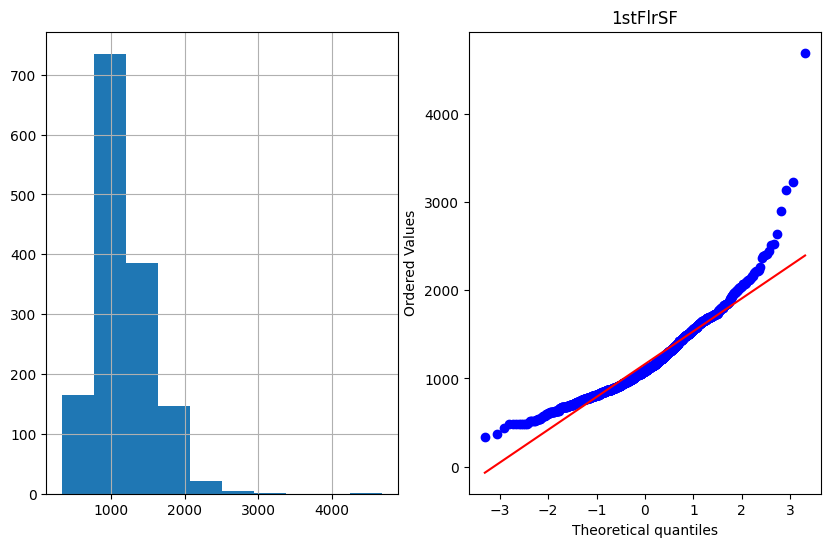

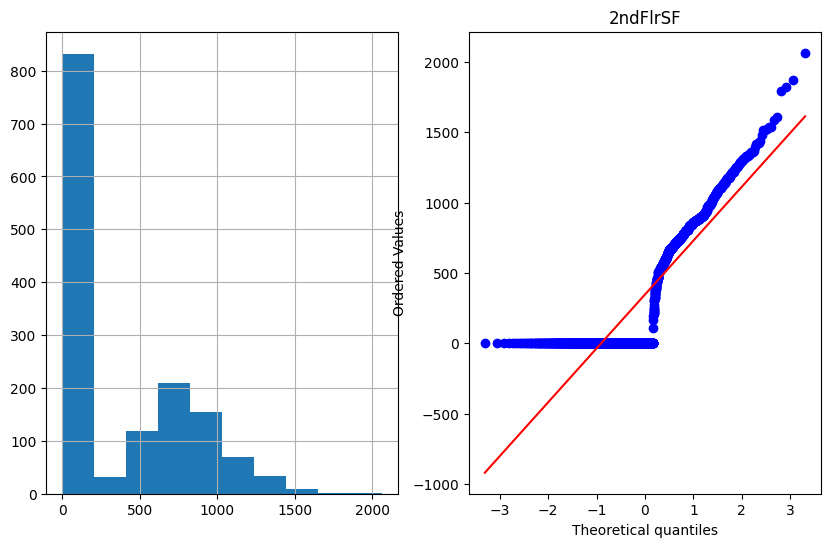

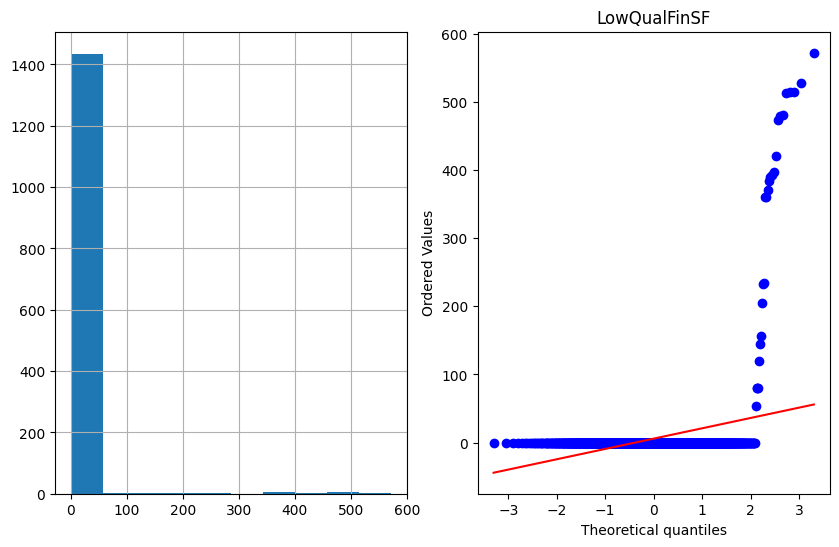

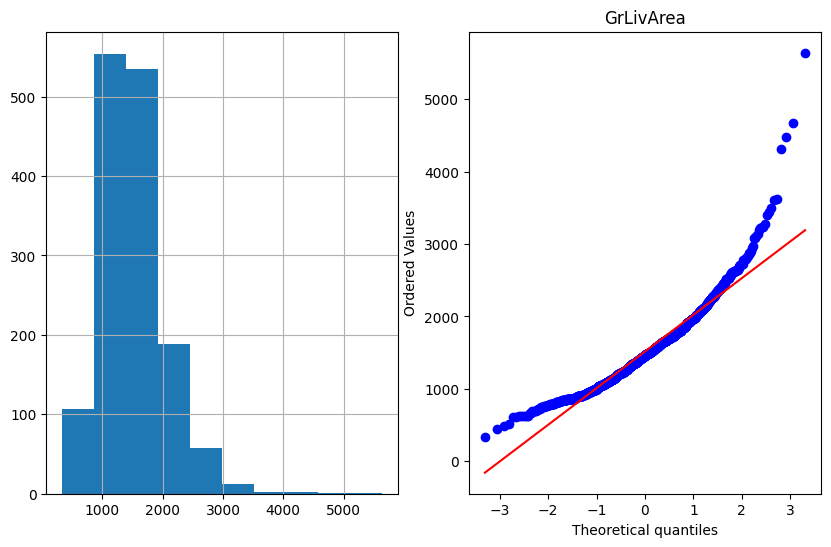

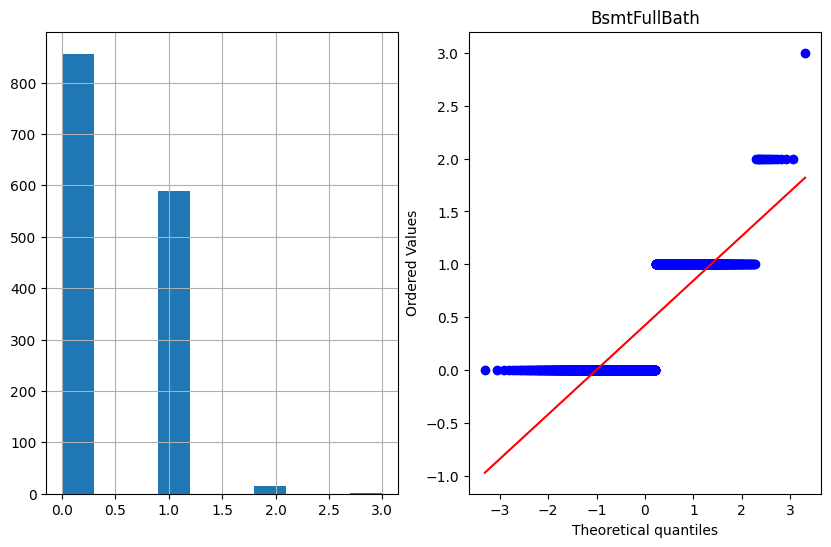

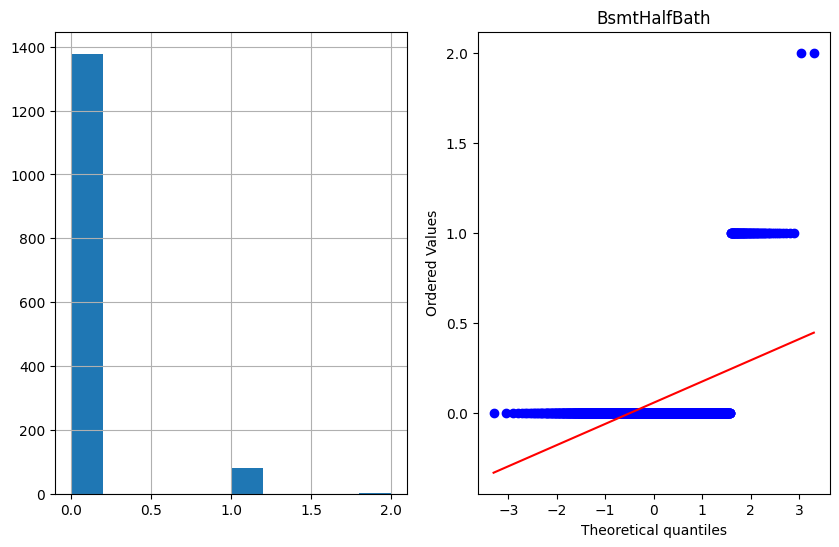

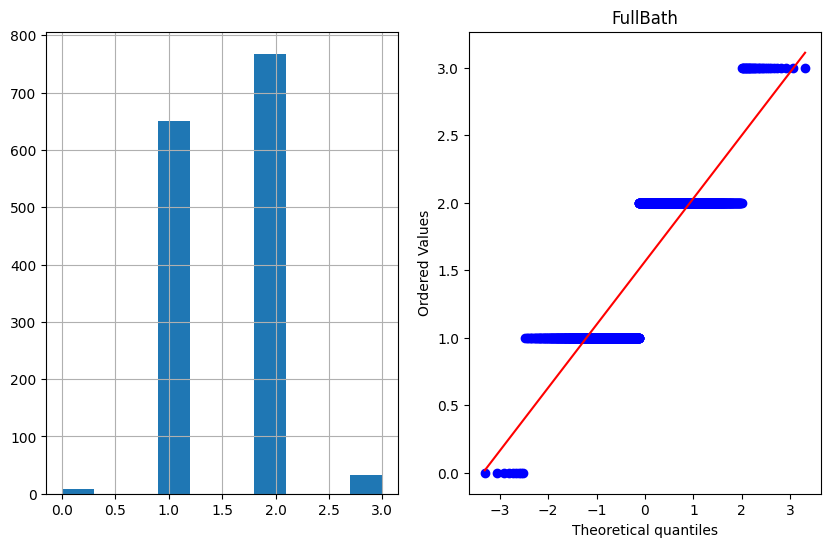

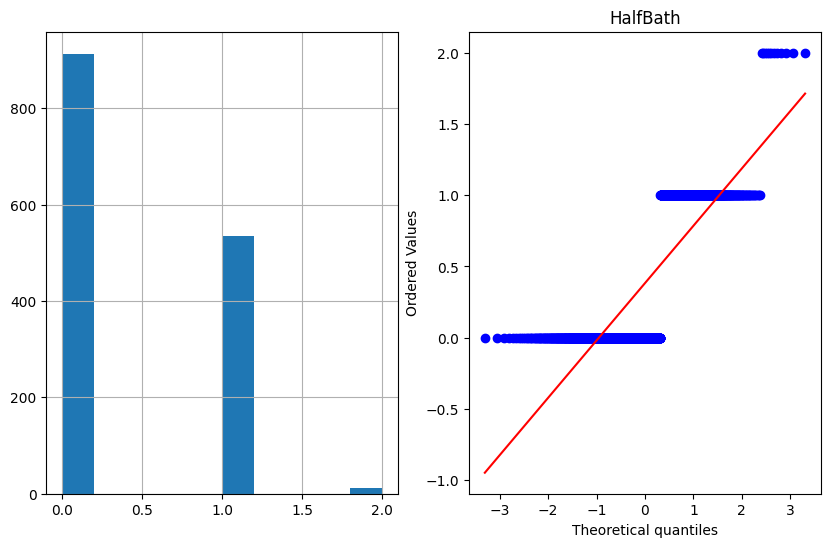

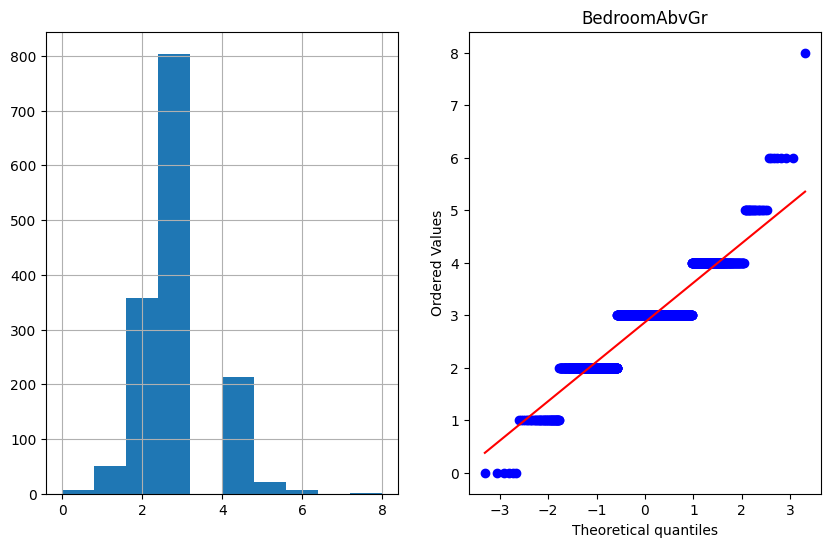

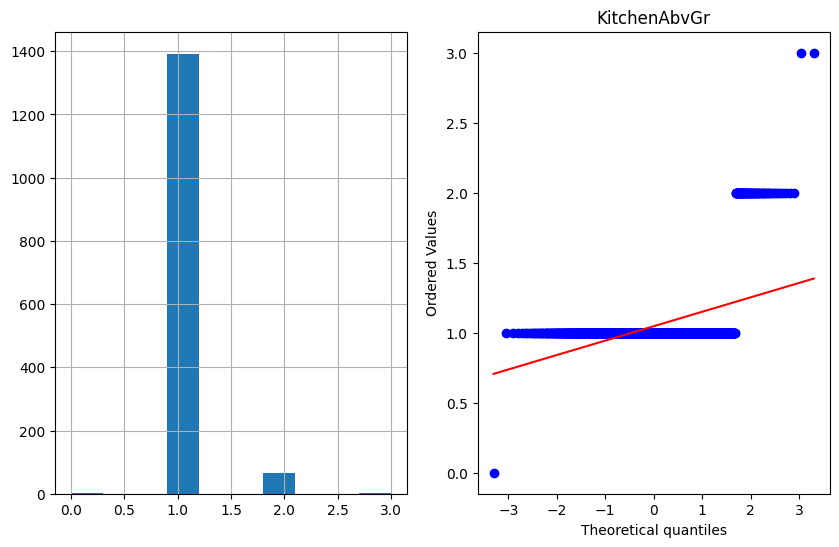

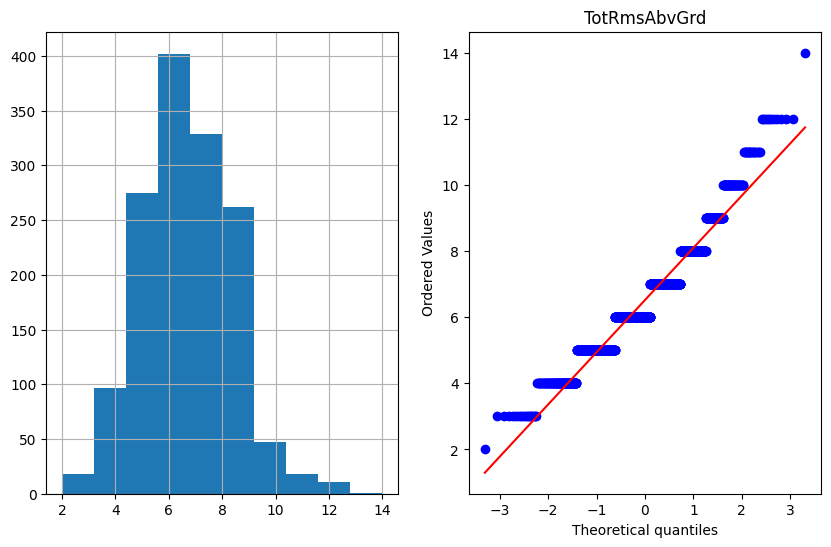

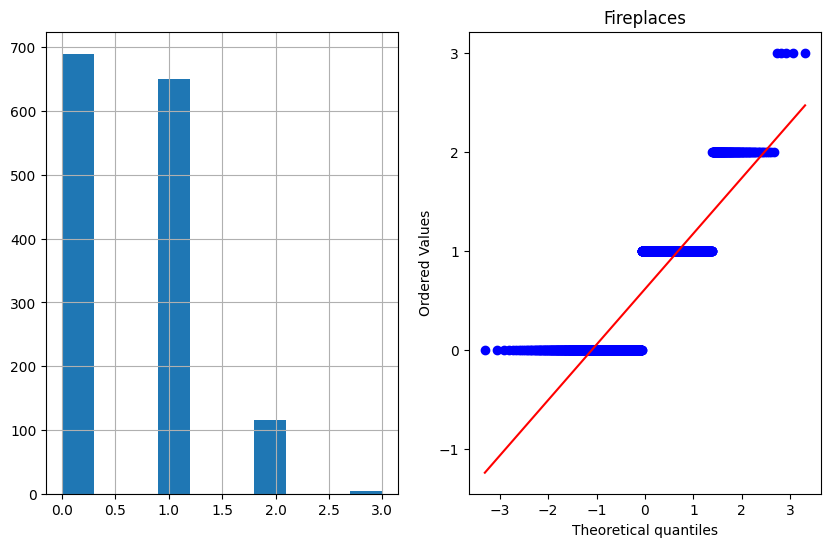

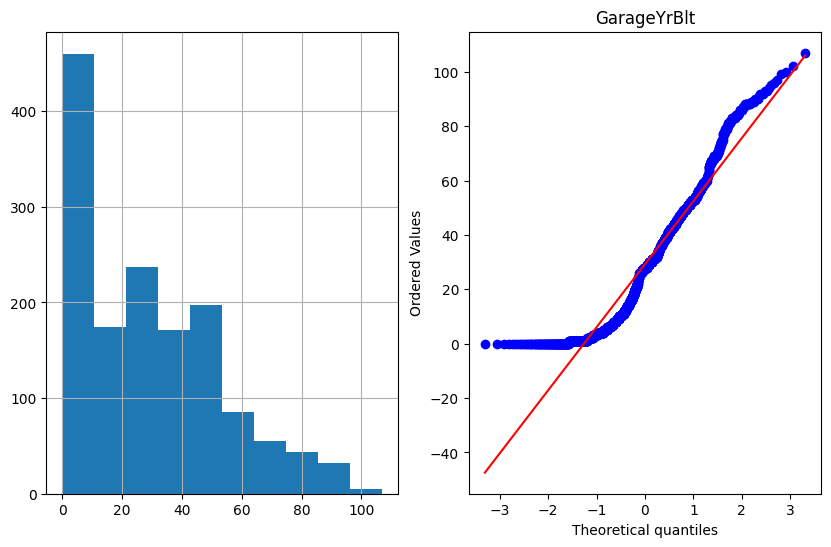

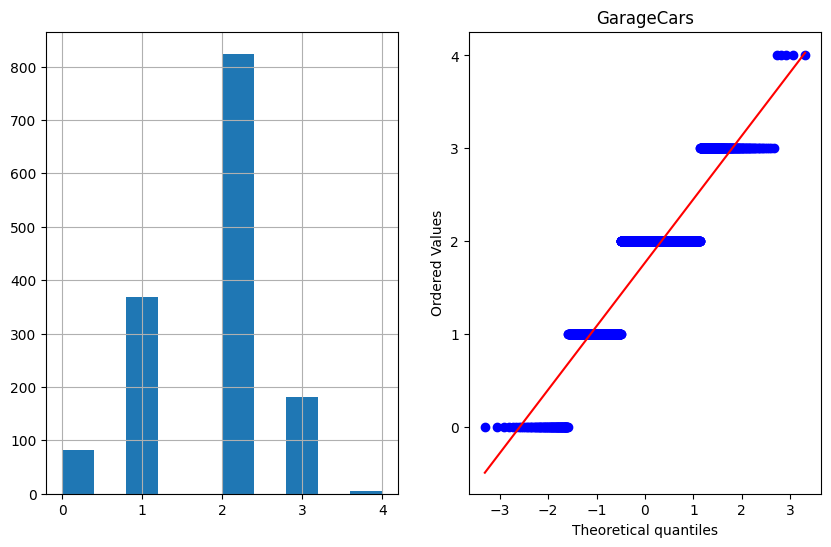

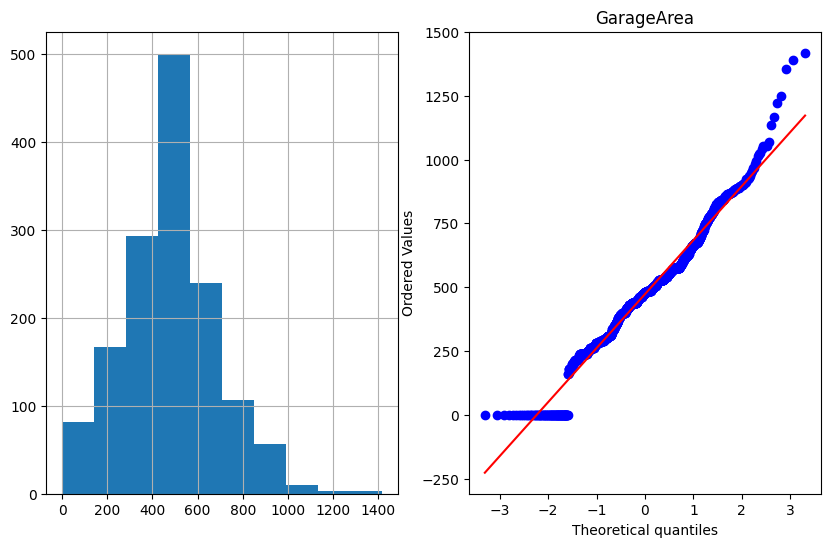

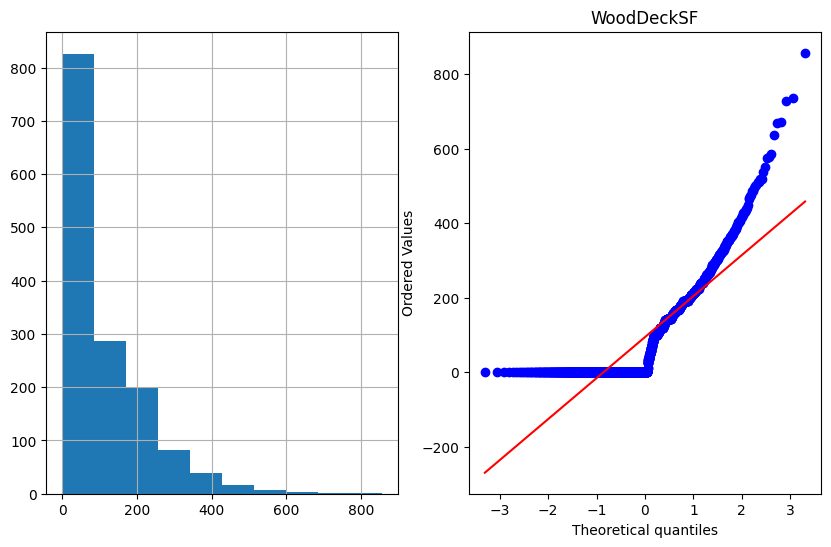

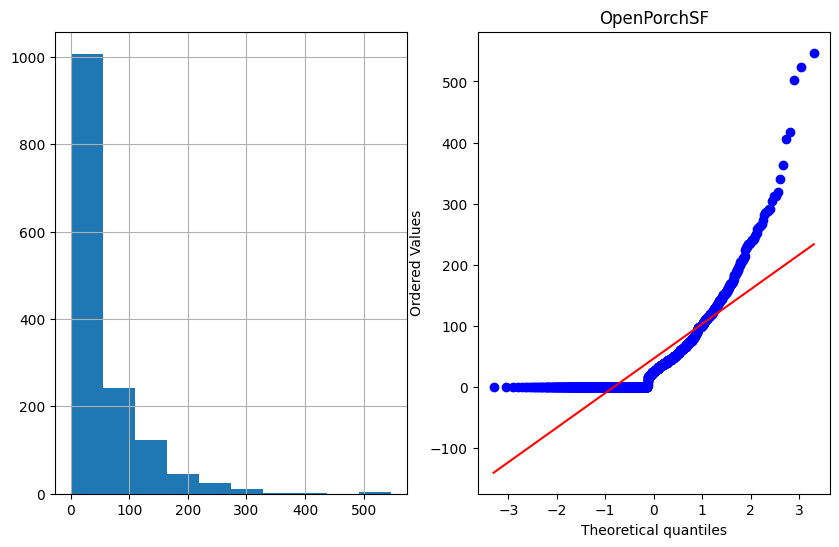

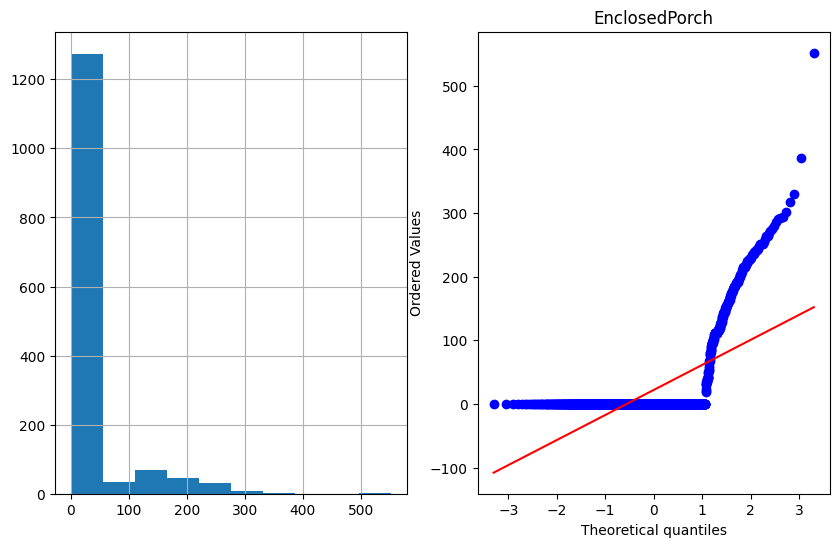

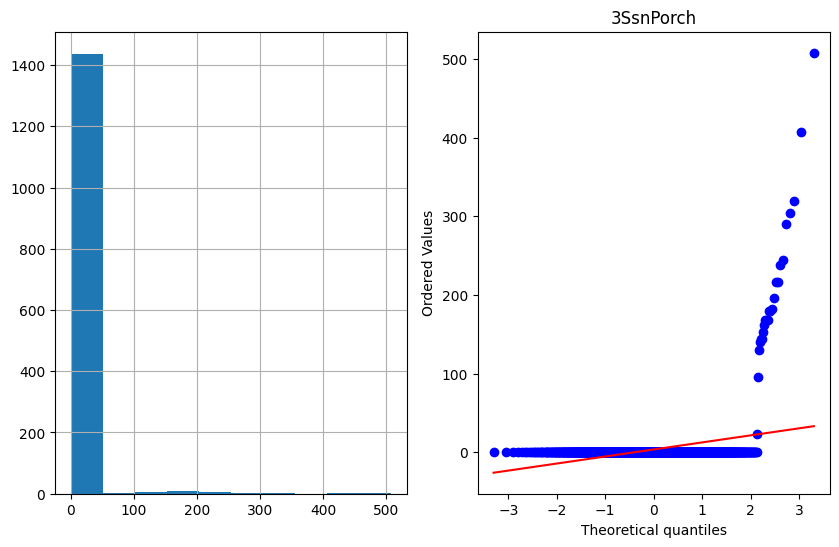

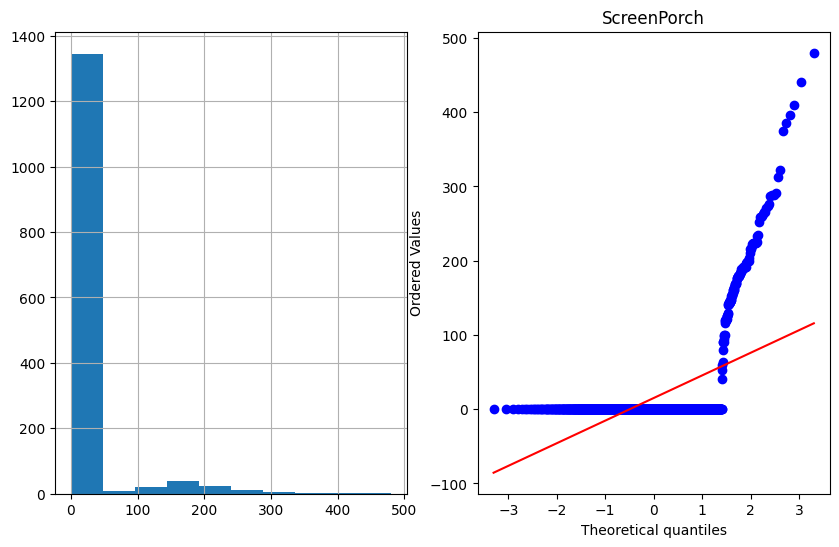

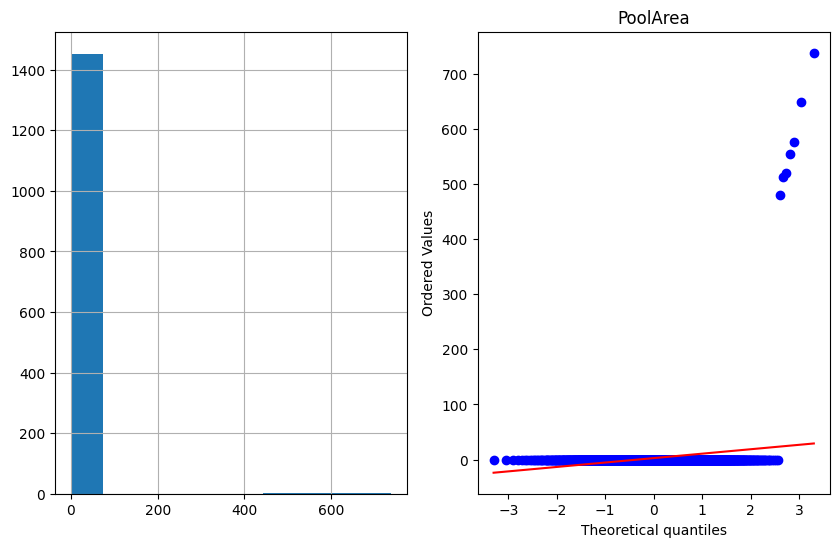

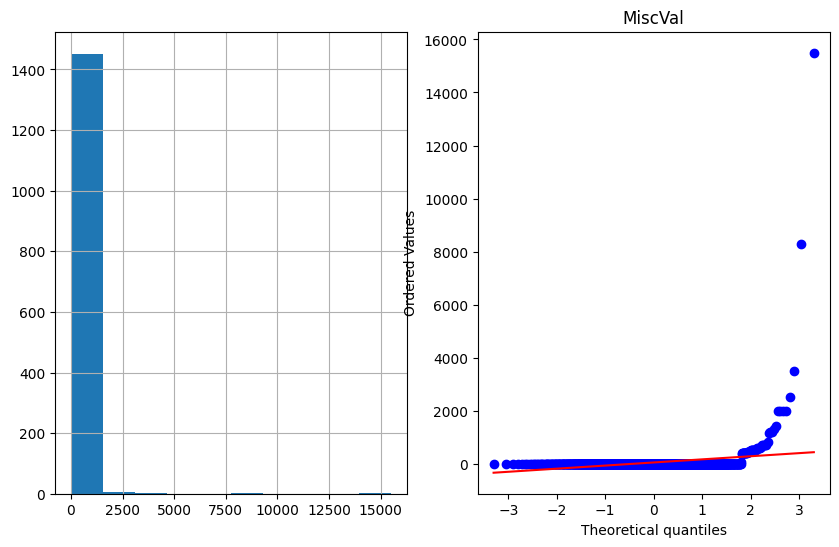

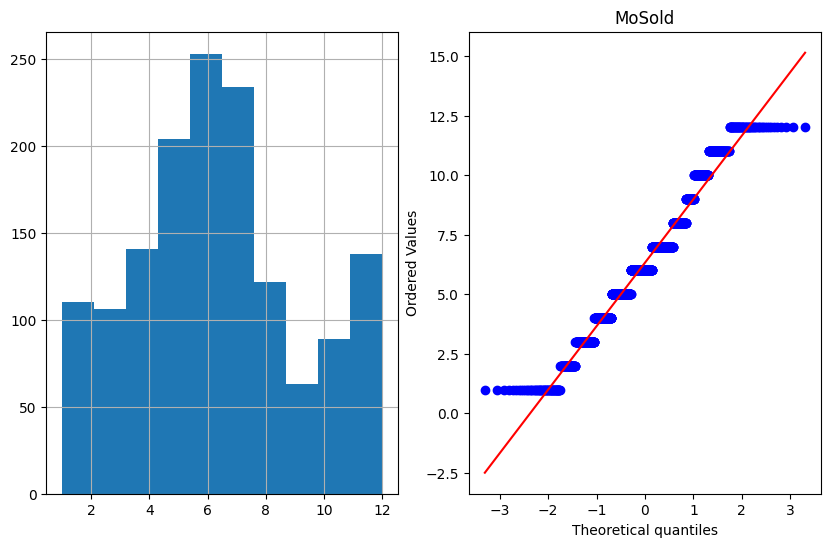

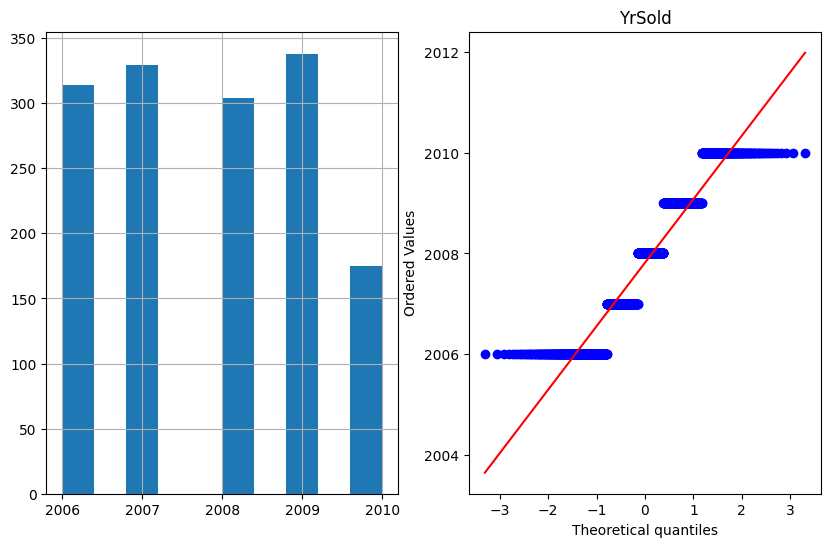

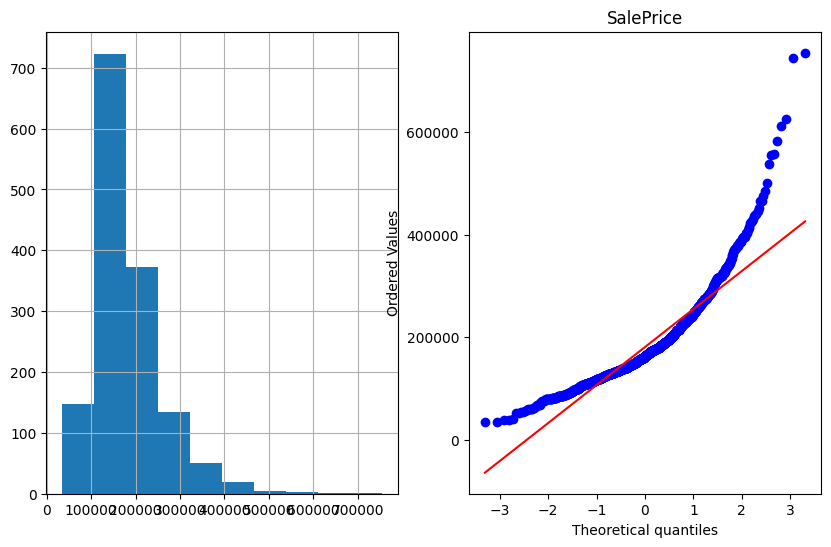

In [55]:
#If we have a straight line passing through most points in a Q-Q then the feature is normally distributed.
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
plot_data(df_train,numerical_features)

In [56]:
#As we have seen in EDA and from the Q-Q plots above that some of the features are skewed. We need to fix this with Logarithmic Transformation.
skewed_feature = ['LotFrontage','LotArea','GrLivArea']

for feature in skewed_feature:
    df_train[feature] = np.log(df_train[feature])

In [57]:
#similarly for the test dataset.
skewed_feature = ['LotFrontage','LotArea','GrLivArea']

for feature in skewed_feature:
    df_test[feature] = np.log(df_test[feature])

In [58]:
df_train.drop('Id',axis=1,inplace=True)

In [59]:
df_test.drop('Id',axis=1,inplace=True)

### 5.3 Encoding Categorical Features  
We can use either OneHotEncoding or LabelEncoding to convert our categorical data to numerical data so that we'll be able to feed it to our model. OneHotEncoding will result in creation of multiple columns which is something you might want to look into. LabelEncoding on the the hand will simply convert the categories into numeric data based on their rank. We'll go with OneHotEncoding since it is a bit simpler to implement.

In [60]:
categorical_variables = [feature for feature in df_train.columns if df_train[feature].dtypes=='O']

In [64]:
main_df=df_train.copy()

In [65]:
#Now we'll combine the test data with the training data row-wise to onehotencode the features.
#The reason we're combining the 2 dataframes is that there are some new categories in the test dataset.
final_df = pd.concat([main_df,df_test],axis=0)

In [67]:
#Let's create a function to encode the categorical features.
def onehot_cols(cols): #The function takes a list of categorcial features/columns.
    df_final=final_df
    i=0
    
    for fields in cols:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [68]:
final_df['SalePrice'] #Since there's no SalePrice in test dataframe that's why we have some NaN values.

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [69]:
final_df = onehot_cols(categorical_variables)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [70]:
final_df.shape

(2919, 236)

In [71]:
final_df = final_df.loc[:,~final_df.columns.duplicated()] #Remove duplicated features.

In [72]:
final_df.shape

(2919, 176)

In [73]:
final_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt   
0          60     4.174387  9.041922            7            5          5  \
1          20     4.382027  9.169518            6            8         31   
2          60     4.219508  9.328123            7            5          7   
3          70     4.094345  9.164296            7            5         91   
4          60     4.430817  9.565214            8            5          8   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0             5       196.0       706.0         0.0      150.0        856.0  \
1            31         0.0       978.0         0.0      284.0       1262.0   
2             6       162.0       486.0         0.0      434.0        920.0   
3            36         0.0       216.0         0.0      540.0        756.0   
4             8       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0       856       854             0   7.444249           1.0           0.0  \
1      1262         0             0   7.140453           0.0           1.0   
2       920       866             0   7.487734           1.0           0.0   
3       961       756             0   7.448334           1.0           0.0   
4      1145      1053             0   7.695303           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0         2         1             3             1             8           0  \
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0          5.0         2.0       548.0           0           61  \
1         31.0         2.0       460.0         298            0   
2          7.0         2.0       608.0           0           42   
3          8.0         3.0       642.0           0           35   
4          8.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0              0          0            0         0        0       2    2008  \
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice     FV     RH    RL     RM  Pave    IR2    IR3    Reg    HLS   
0   208500.0  False  False  True  False  True  False  False   True  False  \
1   181500.0  False  False  True  False  True  False  False   True  False   
2   223500.0  False  False  True  False  True  False  False  False  False   
3   140000.0  False  False  True  False  True  False  False  False  False   
4   250000.0  False  False  True  False  True  False  False  False  False   

     Low   Lvl  NoSeWa  CulDSac    FR2    FR3  Inside    Mod    Sev  Blueste   
0  False  True   False    False  False  False    True  False  False    False  \
1  False  True   False    False   True  False   False  False  False    False   
2  False  True   False    False  False  False    True  False  False    False   
3  False  True   False    False  False  False   False  False  False    False   
4  False  True   False    False   True  False   False  False  False    False   

   BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR   
0   False    False    False     True    False    False    False   False  \
1   False    False    False    False    False    False    False   False   
2   False    False    False     True    False    False    False   False   

In [74]:
#Sepearating our final train and test datasets.
df_Train = final_df.iloc[:1460,:]
df_Test = final_df.iloc[1460:,:]

In [75]:
df_Train

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt   
0             60     4.174387  9.041922            7            5          5  \
1             20     4.382027  9.169518            6            8         31   
2             60     4.219508  9.328123            7            5          7   
3             70     4.094345  9.164296            7            5         91   
4             60     4.430817  9.565214            8            5          8   
...          ...          ...       ...          ...          ...        ...   
1455          60     4.127134  8.976768            6            5          8   
1456          20     4.442651  9.486076            6            6         32   
1457          70     4.189655  9.109636            7            9         69   
1458          20     4.219508  9.181632            5            6         60   
1459          20     4.317488  9.204020            5            6         43   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
0                5       196.0       706.0         0.0      150.0  \
1               31         0.0       978.0         0.0      284.0   
2                6       162.0       486.0         0.0      434.0   
3               36         0.0       216.0         0.0      540.0   
4                8       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
1455             7         0.0         0.0         0.0      953.0   
1456            22       119.0       790.0       163.0      589.0   
1457             4         0.0       275.0         0.0      877.0   
1458            14         0.0        49.0      1029.0        0.0   
1459            43         0.0       830.0       290.0      136.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath   
0           856.0       856       854             0   7.444249           1.0  \
1          1262.0      1262         0             0   7.140453           0.0   
2           920.0       920       866             0   7.487734           1.0   
3           756.0       961       756             0   7.448334           1.0   
4          1145.0      1145      1053             0   7.695303           1.0   
...           ...       ...       ...           ...        ...           ...   
1455        953.0       953       694             0   7.406711           0.0   
1456       1542.0      2073         0             0   7.636752           1.0   
1457       1152.0      1188      1152             0   7.757906           0.0   
1458       1078.0      1078         0             0   6.982863           1.0   
1459       1256.0      1256         0             0   7.135687           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
0              0.0         2         1             3             1  \
1              1.0         2         0             3             1   
2              0.0         2         1             3             1   
3              0.0         1         0             3             1   
4              0.0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455           0.0         2         1             3             1   
1456           0.0         2         0             3             1   
1457           0.0         2         0             4             1   
1458           0.0         1         0             2             1   
1459           0.0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea   
0                8           0          5.0         2.0       548.0  \
1                6           1         31.0         2.0       460.0   
2                6           1          7.0         2.0       608.0   
3                7           1          8.0         3.0       642.0   
4                9           1          8.0         3.0    

In [76]:
df_Test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt   
0             20     4.382027  9.360655            5            6         49  \
1             20     4.394449  9.565704            6            6         52   
2             60     4.304065  9.534595            5            5         13   
3             60     4.356709  9.208138            6            6         12   
4            120     3.761200  8.518193            8            5         18   
...          ...          ...       ...          ...          ...        ...   
1454         160     3.044522  7.568379            4            7         36   
1455         160     3.044522  7.546446            4            5         36   
1456          20     5.075174  9.903488            5            7         46   
1457          85     4.127134  9.253496            5            5         14   
1458          60     4.304065  9.172327            7            5         13   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
0               49         0.0       468.0       144.0      270.0  \
1               52       108.0       923.0         0.0      406.0   
2               12         0.0       791.0         0.0      137.0   
3               12        20.0       602.0         0.0      324.0   
4               18         0.0       263.0         0.0     1017.0   
...            ...         ...         ...         ...        ...   
1454            36         0.0         0.0         0.0      546.0   
1455            36         0.0       252.0         0.0      294.0   
1456            10         0.0      1224.0         0.0        0.0   
1457            14         0.0       337.0         0.0      575.0   
1458            12        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath   
0           882.0       896         0             0   6.797940           0.0  \
1          1329.0      1329         0             0   7.192182           0.0   
2           928.0       928       701             0   7.395722           0.0   
3           926.0       926       678             0   7.380256           0.0   
4          1280.0      1280         0             0   7.154615           0.0   
...           ...       ...       ...           ...        ...           ...   
1454        546.0       546       546             0   6.995766           0.0   
1455        546.0       546       546             0   6.995766           0.0   
1456       1224.0      1224         0             0   7.109879           1.0   
1457        912.0       970         0             0   6.877296           0.0   
1458        996.0       996      1004             0   7.600902           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
0              0.0         1         0             2             1  \
1              0.0         1         1             3             1   
2              0.0         2         1             3             1   
3              0.0         2         1             3             1   
4              0.0         2         0             2             1   
...            ...       ...       ...           ...           ...   
1454           0.0         1         1             3             1   
1455           0.0         1         1             3             1   
1456           0.0         1         0             4             1   
1457           1.0         1         0             3             1   
1458           0.0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea   
0                5           0         49.0         1.0       730.0  \
1                6           0         52.0         1.0       312.0   
2                6           1         13.0         2.0       482.0   
3                7           1         12.0         2.0       470.0   
4                5           0         18.0         2.0    

In [77]:
df_Test.drop('SalePrice',axis=1,inplace=True)

C:\Users\Manish\AppData\Local\Temp\ipykernel_2252\889712771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop('SalePrice',axis=1,inplace=True)


In [85]:
df_Train.shape

(1460, 176)

## 6. Modelling  
I have tried using Linear Regression,Lasso Regression,Ridge Regression and XGBoost.XGBoost Regression performed the best among the three. 

### 6.1.1 Splitting the training data into train and test set for checking accuracy within the training set.

In [78]:
X = df_Train.drop('SalePrice',axis=1)
Y = df_Train['SalePrice']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

### 6.2.1. Modelling using Linear Regressor

In [80]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
y_pred

array([ 2.79460628e+05,  1.40720743e+05,  1.13360447e+05,  2.20109600e+05,
        9.74742815e+04,  8.34142686e+04,  2.58086646e+05,  1.23366809e+05,
        4.96686697e+05,  1.59906714e+05,  1.94813736e+05,  1.36072457e+05,
        2.32517812e+05,  1.17584913e+05,  1.16284889e+05,  1.39059544e+05,
        2.53702651e+05,  1.22974057e+05,  1.41512922e+05,  1.44638106e+05,
        1.34077802e+05,  1.83059443e+05,  1.21965807e+05,  1.49107382e+05,
        1.83677401e+05,  1.59171837e+05,  1.57535549e+05,  6.68950515e+04,
        2.95412194e+05,  1.04744903e+05,  1.52546889e+05,  2.02803792e+05,
        1.61341349e+05,  3.12868914e+05,  3.46256817e+05,  2.06941294e+05,
        2.97556754e+05,  1.24737998e+05,  2.38461025e+05,  3.41037488e+05,
        2.05964200e+05,  9.11325241e+04,  2.05809958e+05,  2.96947961e+05,
        3.44142373e+05,  1.33552753e+05,  1.20388608e+05,  1.41992115e+05,
        1.73880627e+05,  7.75007570e+04,  3.77434011e+05,  1.53211773e+05,
        1.74956721e+05,  

In [81]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("r2_score:",r2_score(y_test,y_pred))
mse= mean_squared_error(y_test, y_pred)
print("mse:",mse)
rmse = np.sqrt(mse)
print("rmse:",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae:",mae)

r2_score: -1872989254.2962198
mse: 1.2715708023221838e+19
rmse: 3565909143.9942546
mae: 240980156.16651234


### 6.2.2. Modelling using Lasso Regressor

In [82]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)  # You can set the alpha value according to your needs
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
y_pred

array([279124.28737816, 140721.92981377, 113483.38462608, 220131.37300363,
        96860.82196373,  84791.35340983, 258203.96187268, 123343.09427037,
       497103.46637677, 159797.10850866, 195028.23962761, 135931.26154091,
       232746.24467875, 117643.56329977, 116208.70818634, 138958.38528002,
       253758.34227549, 122738.61923672, 141326.89762205, 144967.88240187,
       133931.22950723, 182487.35528997, 120042.95608031, 148823.257067  ,
       183687.82261332, 159372.50575618, 157706.64529165,  66426.5562221 ,
       295755.48682118, 105123.97463972, 152752.1050655 , 203044.19382023,
       161200.94432713, 312860.84091264, 345756.83352519, 206499.97339805,
       297759.67348408, 124242.32605799, 238400.35002177, 341133.24239207,
       206163.29672578,  91171.81356015, 205913.09202824, 296825.06260958,
       344299.9258619 , 133545.10281732, 119711.07306982, 141382.28695913,
       173715.69087998,  77310.62944476, 377626.18801608, 152921.86793757,
       174804.45276089,  

In [83]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("r2_score:",r2_score(y_test,y_pred))
mse= mean_squared_error(y_test, y_pred)
print("mse:",mse)
rmse = np.sqrt(mse)
print("rmse:",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae:",mae)

r2_score: 0.7663994527126843
mse: 1585912116.1378765
rmse: 39823.51210199668
mae: 19964.582852526815


### 6.2.3. Modelling using Ridge Regressor

In [86]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # You can set the alpha parameter for regularization
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
y_pred

array([273951.33133695, 140725.02660601, 114528.8676394 , 220960.13668825,
        94199.37444828,  90709.73385676, 259421.82325419, 121699.58514048,
       500073.17136724, 161716.51168412, 196973.26563403, 135734.47097155,
       235002.44148482, 117794.85146179, 116619.67588206, 138126.93575576,
       253074.25018784, 121067.8474349 , 141956.6281094 , 149836.44932796,
       132282.49360522, 170258.62948598, 116307.10756855, 148809.59763853,
       183670.3370233 , 162726.10095453, 159732.35848949,  65413.83035117,
       298606.77622262, 107205.60125315, 154730.7664244 , 204456.18795101,
       160554.9823228 , 311347.34599443, 339180.72535697, 207383.33248349,
       298693.04220663, 121390.49487817, 238225.59144656, 341959.11979487,
       209816.83589114,  92113.02688463, 207622.4983874 , 295722.10300386,
       343555.91254351, 134714.94279833, 117262.06478692, 139749.35306262,
       174416.09157937,  77214.16004021, 380074.68442519, 152466.43494156,
       174348.51647352,  

In [87]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("r2_score:",r2_score(y_test,y_pred))
mse= mean_squared_error(y_test, y_pred)
print("mse:",mse)
rmse = np.sqrt(mse)
print("rmse:",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae:",mae)

r2_score: 0.7718494368659647
mse: 1548912220.3678708
rmse: 39356.22213027911
mae: 19287.0349427738


### 6.2.4. Modelling using XgBoost Regressor

In [88]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([209989.4  , 155013.52 , 100276.89 , 227776.2  ,  91633.445,
       108592.11 , 245546.86 , 132299.94 , 396112.3  , 170079.3  ,
       186769.25 , 129718.664, 224489.38 , 125403.27 , 129078.01 ,
       140040.98 , 225364.86 , 125639.88 , 135853.67 , 182433.73 ,
       123515.57 , 143606.52 , 115247.44 , 157376.67 , 190902.23 ,
       177353.38 , 180223.2  ,  73424.22 , 342042.34 , 125424.88 ,
       119834.99 , 195411.28 , 138833.78 , 284449.78 , 378993.4  ,
       176254.39 , 302066.84 , 121272.78 , 230260.8  , 294451.03 ,
       230839.31 , 106453.02 , 183840.48 , 300420.06 , 286441.8  ,
       158570.97 , 126409.86 , 132979.84 , 177208.03 ,  75369.74 ,
       402687.66 , 147335.98 , 166554.31 ,  91532.06 , 247398.84 ,
       109276.41 , 135972.61 , 260115.47 , 135063.42 , 103040.51 ,
       138369.62 , 137719.55 , 137031.55 , 175245.45 , 218738.81 ,
       151782.16 , 133390.97 , 201389.89 , 135105.66 , 179606.58 ,
       177746.08 , 123695.984,  85725.69 , 244472.08 ,  94508.

In [89]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("r2_score:",r2_score(y_test,y_pred))
mse= mean_squared_error(y_test, y_pred)
print("mse:",mse)
rmse = np.sqrt(mse)
print("rmse:",rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae:",mae)

r2_score: 0.8312362125322834
mse: 1145735908.6628392
rmse: 33848.72093097225
mae: 18410.49620968893


### 6.3 Hyperparameter optimization  
You can go with GridSearchCV or RandomizedSearchCV. GSCV works better when we less number of parameters to tune, therefore we'll go with RSCV.

In [90]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]

# Define the grid of hyperparameters to search

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

Set up the random search with 4-fold cross validation  
from sklearn.model_selection import RandomizedSearchCV  
random_cv = RandomizedSearchCV(estimator=xgb,  
            param_distributions=hyperparameter_grid,  
            cv=5,n_iter=50,  
            scoring='neg_mean_absolute_error',n_jobs = 4,  
            verbose=5,   
            return_train_score=True,  
            random_state=42)

In [91]:
from sklearn.model_selection import RandomizedSearchCV  
random_cv = RandomizedSearchCV(estimator=xgb,  
            param_distributions=hyperparameter_grid,  
            cv=5,n_iter=50,  
            scoring='neg_mean_absolute_error',n_jobs = 4,  
            verbose=5,   
            return_train_score=True,  
            random_state=42)

In [92]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [94]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
xgb2= XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=np.nan, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
xgb2.fit(X_train,y_train)

[16:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=2, max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=900, n_jobs=1,
             nthread=None, num_parallel_tree=None, predictor=None, ...)

In [97]:
y_pred = xgb2.predict(df_Test)
y_pred

array([112944.61, 169312.66, 193788.05, ..., 184313.66, 119269.51,
       228149.58], dtype=float32)

In [98]:
df_Test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt   
0          20     4.382027  9.360655            5            6         49  \
1          20     4.394449  9.565704            6            6         52   
2          60     4.304065  9.534595            5            5         13   
3          60     4.356709  9.208138            6            6         12   
4         120     3.761200  8.518193            8            5         18   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0            49         0.0       468.0       144.0      270.0        882.0  \
1            52       108.0       923.0         0.0      406.0       1329.0   
2            12         0.0       791.0         0.0      137.0        928.0   
3            12        20.0       602.0         0.0      324.0        926.0   
4            18         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0       896         0             0   6.797940           0.0           0.0  \
1      1329         0             0   7.192182           0.0           0.0   
2       928       701             0   7.395722           0.0           0.0   
3       926       678             0   7.380256           0.0           0.0   
4      1280         0             0   7.154615           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0         1         0             2             1             5           0  \
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0         49.0         1.0       730.0         140            0  \
1         52.0         1.0       312.0         393           36   
2         13.0         2.0       482.0         212           34   
3         12.0         2.0       470.0         360           36   
4         18.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0              0          0          120         0        0       6    2010  \
1              0          0            0         0    12500       6    2010   
2              0          0            0         0        0       3    2010   
3              0          0            0         0        0       6    2010   
4              0          0          144         0        0       1    2010   

      FV     RH     RL     RM  Pave    IR2    IR3    Reg    HLS    Low    Lvl   
0  False   True  False  False  True  False  False   True  False  False   True  \
1  False  False   True  False  True  False  False  False  False  False   True   
2  False  False   True  False  True  False  False  False  False  False   True   
3  False  False   True  False  True  False  False  False  False  False   True   
4  False  False   True  False  True  False  False  False   True  False  False   

   NoSeWa  CulDSac    FR2    FR3  Inside    Mod    Sev  Blueste  BrDale   
0   False    False  False  False    True  False  False    False   False  \
1   False    False  False  False   False  False  False    False   False   
2   False    False  False  False    True  False  False    False   False   
3   False    False  False  False    True  False  False    False   False   
4   False    False  False  False    True  False  False    False   False   

   BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV   
0    False    False    False    False    False    False   False    False  \
1    False    False    False    False    False    False   False    False   
2    False    False    False    False    False     True   False    False   
3

In [99]:

predict_values=pd.DataFrame(df_Test.head(1))
predict_values.to_csv('predicted_values.csv',index=False)

In [100]:
# Save the trained model and vectorizer as a pickle file
import pickle
with open("hpp.pkl", "wb") as file:
    pickle.dump((xgb2), file)

print("Model trained and saved as hpp.pkl")

Model trained and saved as hpp.pkl


In [101]:
test = pd.read_csv('test.csv')

In [102]:
submission = pd.DataFrame({"Id":test["Id"],"SalePrice":y_pred})
submission.to_csv('submission.csv',index=False)

## 7. Conclusion  
Out of all the regression models ,XGBoost model has performed better than Linear Regression,Lasso Regression and Ridge Regression and it is predicting the prices with high accuracy metrics and giving accurate resultant outputs.